# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l2_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/692743054_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/221861886_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1527152775_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1863655430_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1446001495_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.5.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/692743054_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]


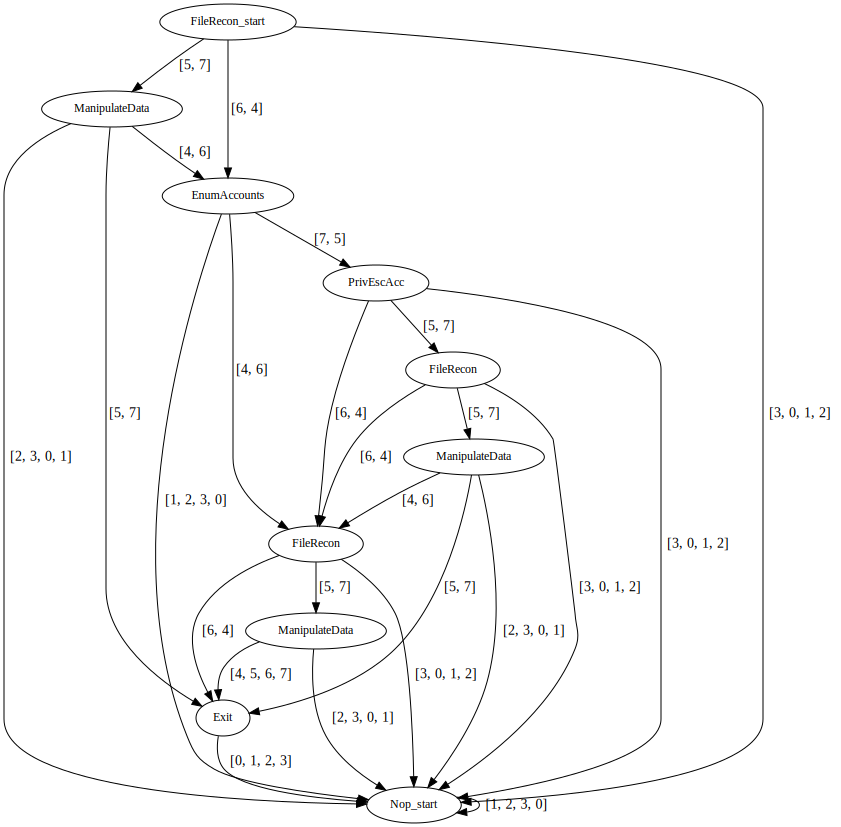

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/221861886_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]


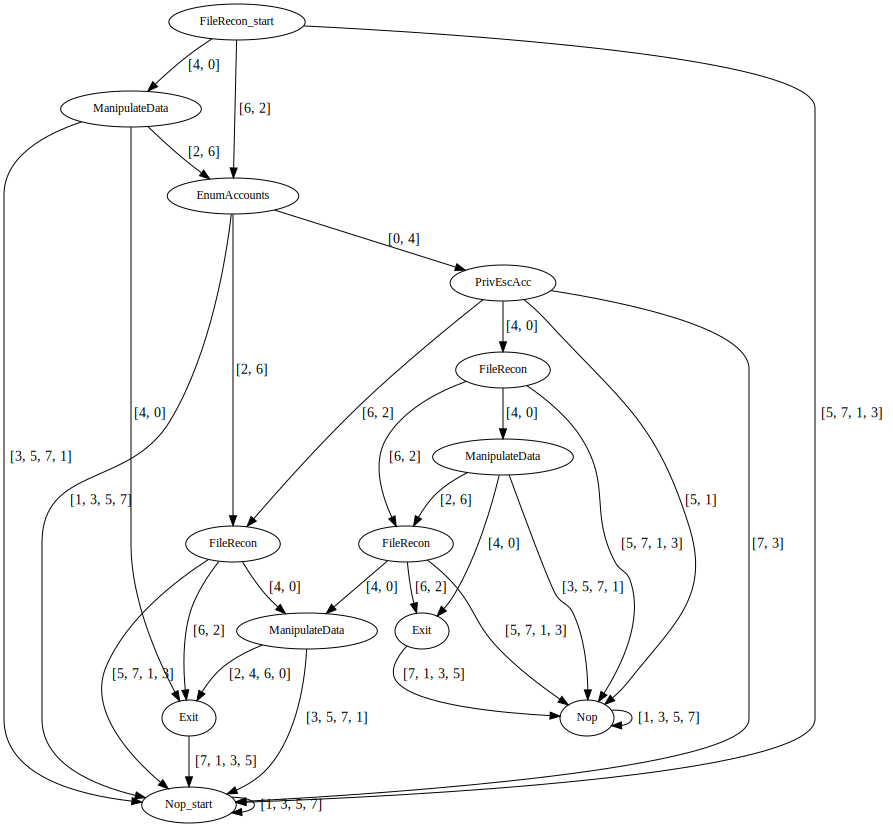

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1527152775_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, none), (AccObs, yes)]
1:[(EndPtAlerts, su_login), (AccObs, yes)]
2:[(EndPtAlerts, file_enum), (AccObs, yes)]
3:[(EndPtAlerts, file_write), (AccObs, yes)]
4:[(EndPtAlerts, none), (AccObs, no)]
5:[(EndPtAlerts, su_login), (AccObs, no)]
6:[(EndPtAlerts, file_enum), (AccObs, no)]
7:[(EndPtAlerts, file_write), (AccObs, no)]


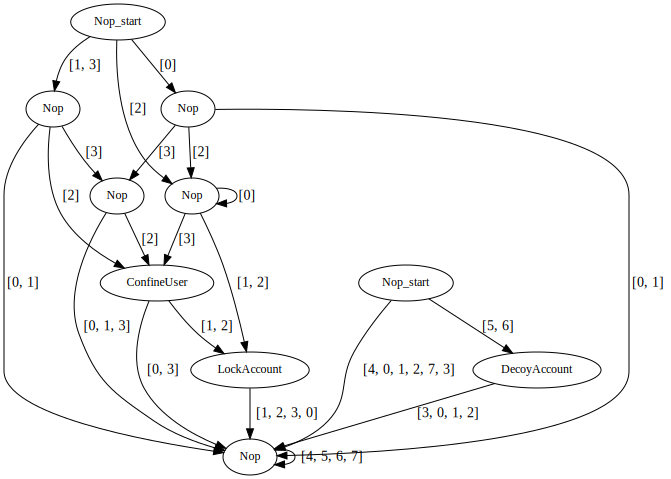

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1863655430_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, none), (AccObs, no)]
1:[(EndPtAlerts, none), (AccObs, yes)]
2:[(EndPtAlerts, su_login), (AccObs, no)]
3:[(EndPtAlerts, su_login), (AccObs, yes)]
4:[(EndPtAlerts, file_enum), (AccObs, no)]
5:[(EndPtAlerts, file_enum), (AccObs, yes)]
6:[(EndPtAlerts, file_write), (AccObs, no)]
7:[(EndPtAlerts, file_write), (AccObs, yes)]


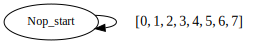

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/1446001495_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
4:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
7:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]


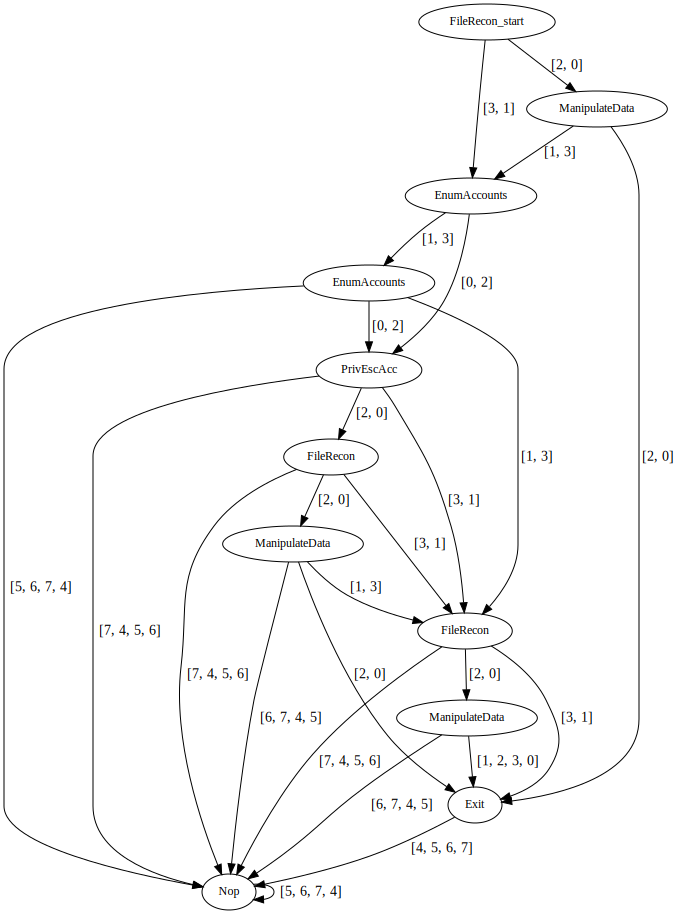

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l2_fae/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.421850                        0.578150   
3                         0.462605                        0.537395   
4                         0.497608                        0.502392   
5                         0.497568                        0.502432   
6                         0.497559                        0.502441   
7                         0.497559                        0.502441   
8                         0.497559                        0.502441   
9                         0.497559                        0.502441   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

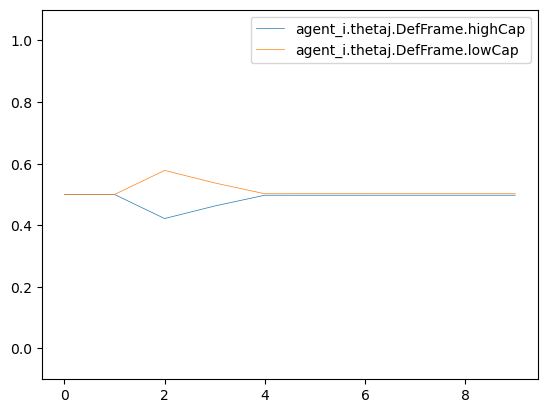

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                       file_write   
3                               1.0                         su_login   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                             none   
7                               1.0                       file_write   
8                               1.0                       file_write   
9                               1.0                         su_login   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

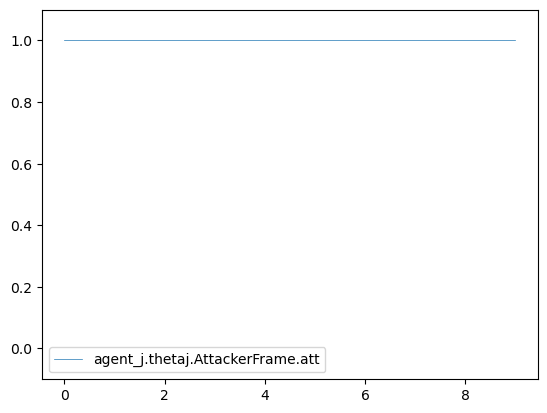

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

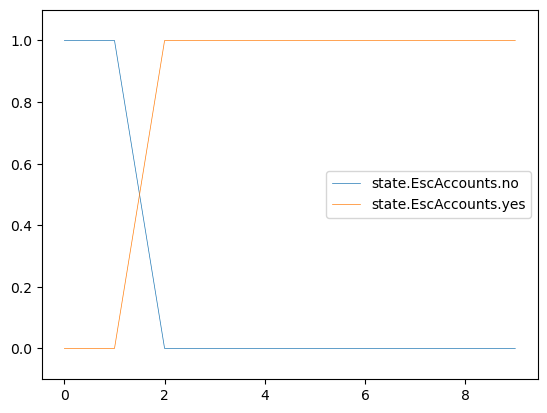

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.677333                 0.322667   EnumAccounts   
3                0.247398                 0.752602     PrivEscAcc   
4                0.000339                 0.999661      FileRecon   
5                0.000441                 0.999559      FileRecon   
6                0.000491                 0.999510           Exit   
7                0.000491                 0.999510            Nop   
8                0.000491                 0.999510            Nop   
9                0.000491                 0.999510            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

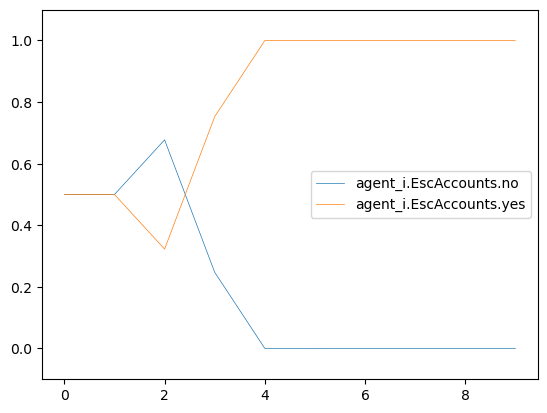

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                       file_write                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                       file_write                         yes  
9            Nop                         su_login                         yes

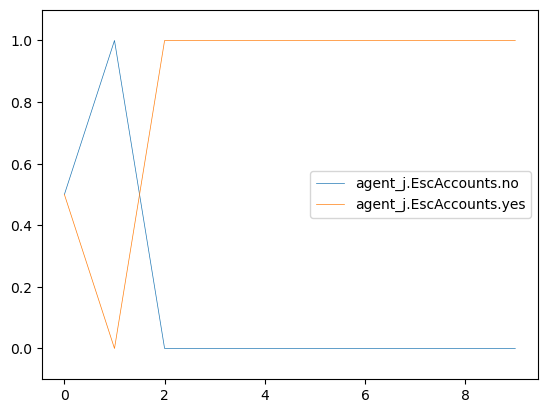

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0   EnumAccounts            Nop  
3                      1.0     PrivEscAcc            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0      FileRecon            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

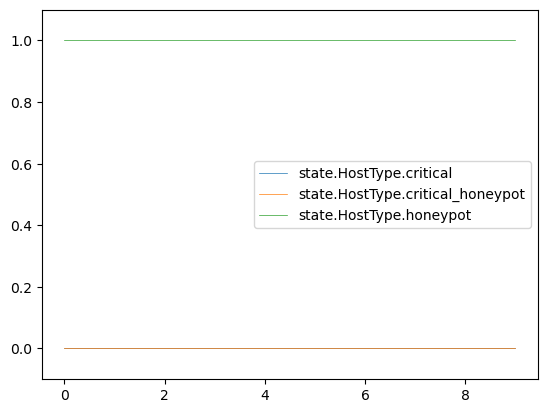

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts            Nop   
3                        0.0     PrivEscAcc            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0      FileRecon            Nop   
6                        0.0           Exit            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

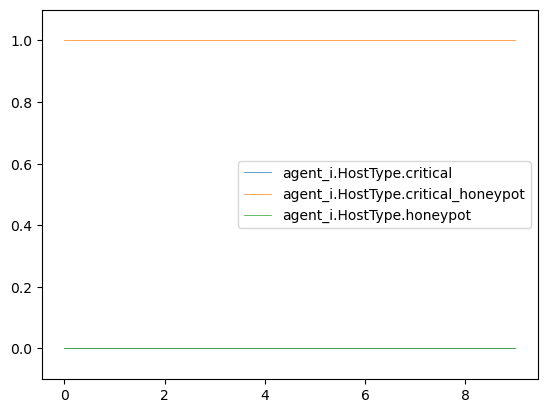

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop      FileRecon   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                       file_write                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                       file_write                         yes  
9                         su_login                         yes

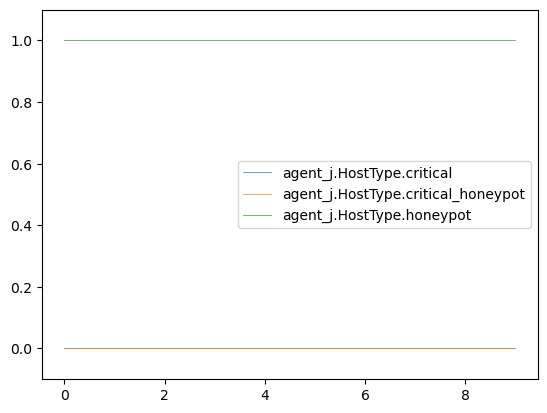

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0   EnumAccounts            Nop
3                 0.0                  1.0     PrivEscAcc            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0      FileRecon            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

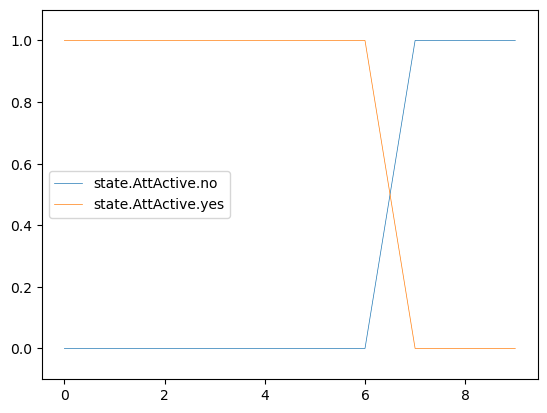

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0      FileRecon            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

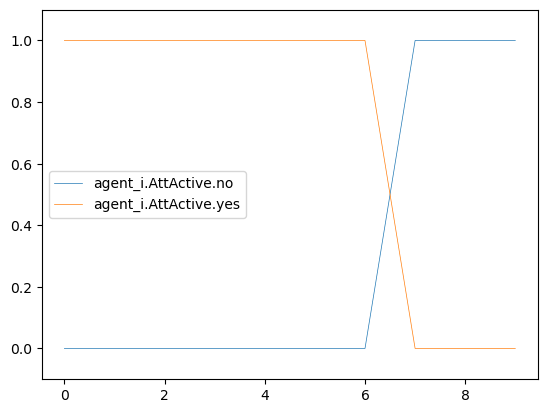

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000               0.500000            Nop      FileRecon   
1              0.010204               0.989796   DecoyAccount   EnumAccounts   
2              0.000118               0.999882            Nop   EnumAccounts   
3              0.002376               0.997624            Nop     PrivEscAcc   
4              0.217902               0.782098            Nop      FileRecon   
5              0.010430               0.989570            Nop      FileRecon   
6              0.021750               0.978251            Nop           Exit   
7              0.970823               0.029177            Nop            Nop   
8              0.999891               0.000109            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                       file_write                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                       file_write                         yes  
9                         su_login                         yes

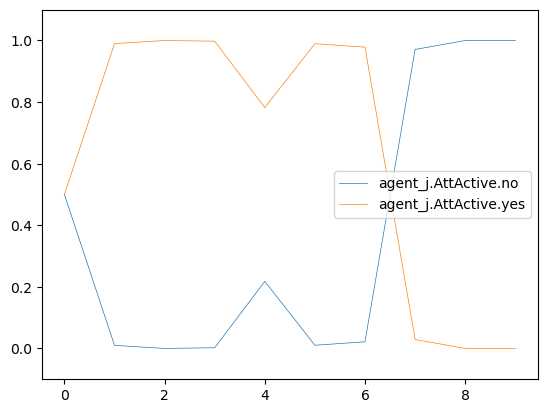

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0   EnumAccounts            Nop
3                    1.0                     0.0     PrivEscAcc            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0      FileRecon            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

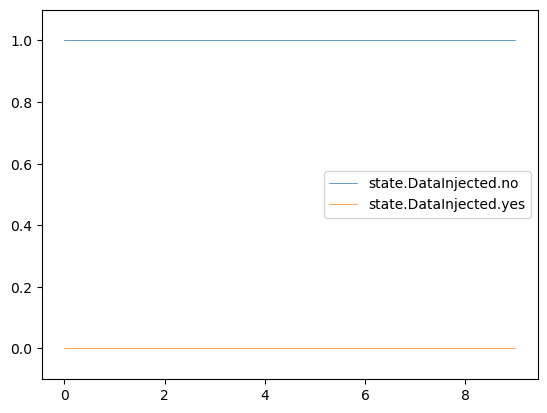

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

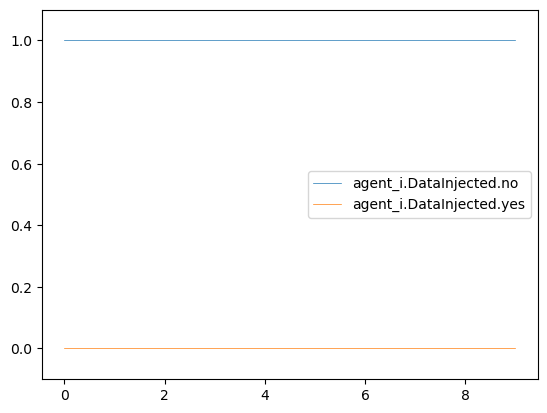

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.980747                  0.019253            Nop   
6                 0.908807                  0.091194            Nop   
7                 0.676042                  0.323958            Nop   
8                 0.675965                  0.324035            Nop   
9                 0.675965                  0.324035            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                       file_write                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                       file_write                         yes  
9            Nop                         su_login                         yes

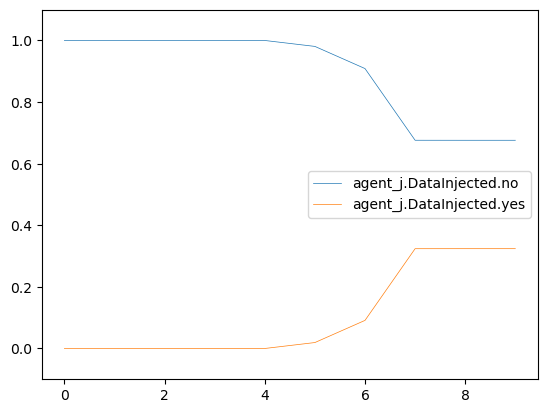

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0   EnumAccounts            Nop
3                   1.0                   0.0     PrivEscAcc            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0      FileRecon            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

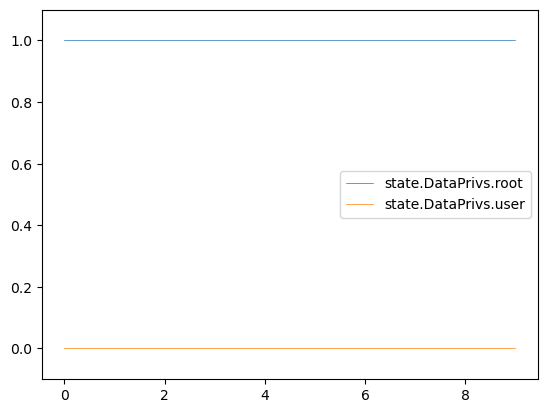

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892   EnumAccounts   
3                0.608108                0.391892     PrivEscAcc   
4                0.608108                0.391892      FileRecon   
5                0.546989                0.453011      FileRecon   
6                0.512811                0.487190           Exit   
7                0.512811                0.487190            Nop   
8                0.512811                0.487190            Nop   
9                0.512811                0.487190            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

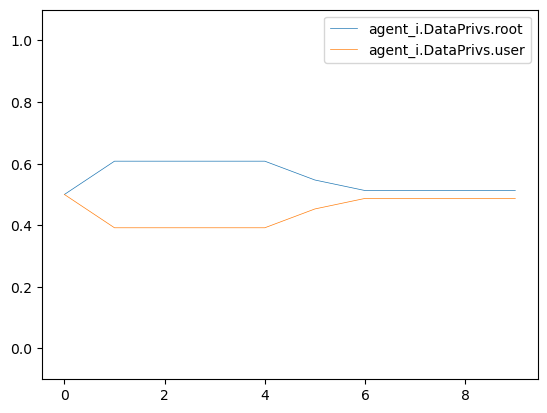

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                       file_write                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                       file_write                         yes  
9            Nop                         su_login                         yes

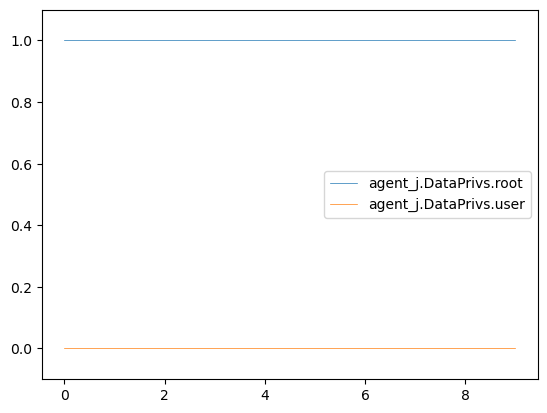

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0   EnumAccounts            Nop
3                   1.0                    0.0     PrivEscAcc            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0      FileRecon            Nop
6                   1.0                    0.0           Exit            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

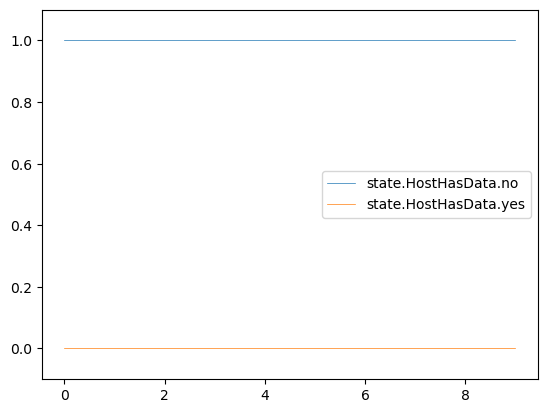

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892   EnumAccounts   
3                0.608108                 0.391892     PrivEscAcc   
4                0.608108                 0.391892      FileRecon   
5                0.848609                 0.151391      FileRecon   
6                0.960331                 0.039669           Exit   
7                0.960331                 0.039669            Nop   
8                0.960331                 0.039669            Nop   
9                0.960331                 0.039669            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

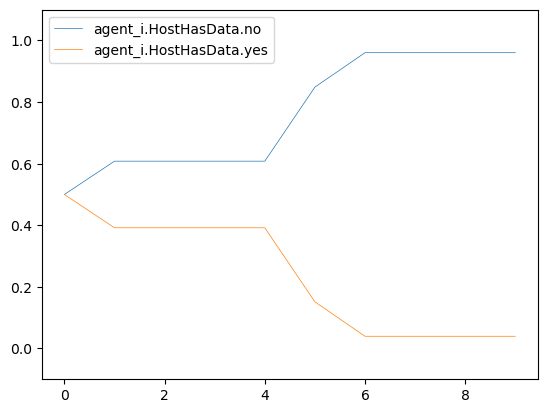

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                       file_write                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                       file_write                         yes  
9            Nop                         su_login                         yes

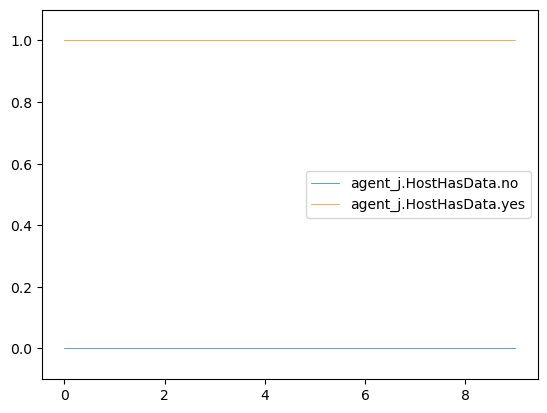

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0   EnumAccounts            Nop
3                 1.0                  0.0     PrivEscAcc            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0      FileRecon            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

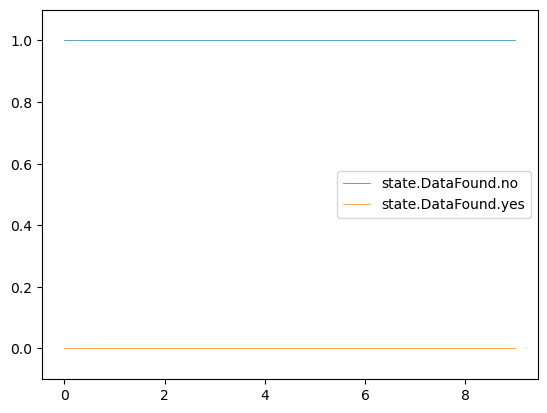

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027   EnumAccounts            Nop   
3              0.972973               0.027027     PrivEscAcc            Nop   
4              0.972973               0.027027      FileRecon            Nop   
5              0.950564               0.049436      FileRecon            Nop   
6              0.983544               0.016457           Exit            Nop   
7              0.983544               0.016457            Nop            Nop   
8              0.983544               0.016457            Nop            Nop   
9              0.983544               0.016457            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

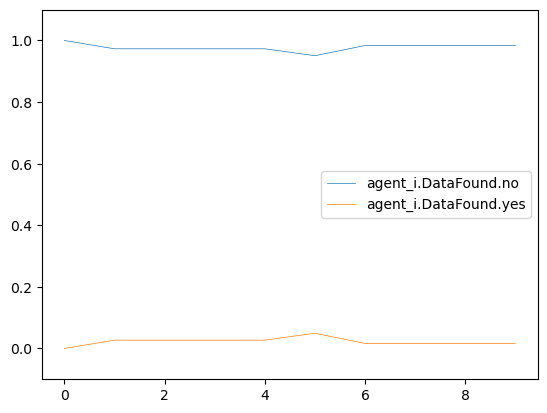

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop   EnumAccounts   
3              1.000000               0.000000            Nop     PrivEscAcc   
4              0.469037               0.530963            Nop      FileRecon   
5              0.169969               0.830031            Nop      FileRecon   
6              0.137631               0.862369            Nop           Exit   
7              0.405040               0.594960            Nop            Nop   
8              0.405007               0.594993            Nop            Nop   
9              0.405007               0.594993            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                       file_write                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                       file_write                         yes  
9                         su_login                         yes

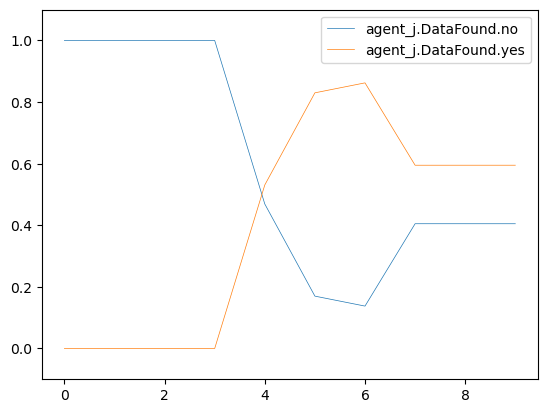

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0   EnumAccounts            Nop
3                0.0                 1.0     PrivEscAcc            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0      FileRecon            Nop
6                0.0                 1.0           Exit            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

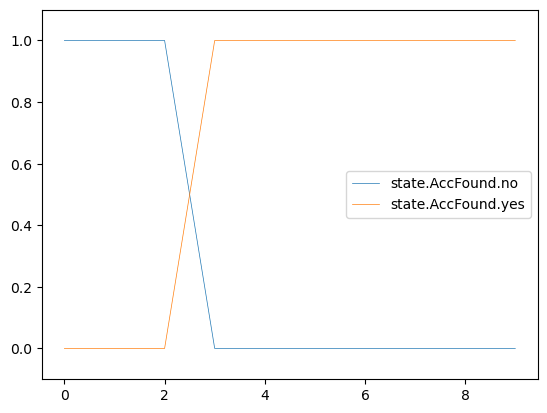

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.900718              0.099282   EnumAccounts            Nop   
3             0.260602              0.739398     PrivEscAcc            Nop   
4             0.000357              0.999643      FileRecon            Nop   
5             0.000464              0.999536      FileRecon            Nop   
6             0.000516              0.999484           Exit            Nop   
7             0.000516              0.999484            Nop            Nop   
8             0.000516              0.999484            Nop            Nop   
9             0.000516              0.999484            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

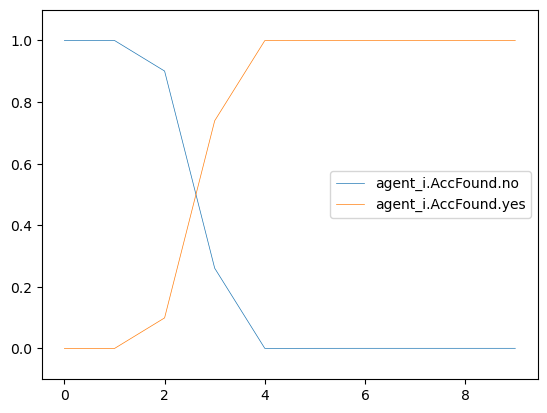

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop   EnumAccounts   
3             0.201901              0.798099            Nop     PrivEscAcc   
4             0.188797              0.811203            Nop      FileRecon   
5             0.015586              0.984414            Nop      FileRecon   
6             0.001978              0.998022            Nop           Exit   
7             0.006394              0.993606            Nop            Nop   
8             0.006393              0.993607            Nop            Nop   
9             0.006393              0.993607            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                       file_write                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                       file_write                         yes  
9                         su_login                         yes

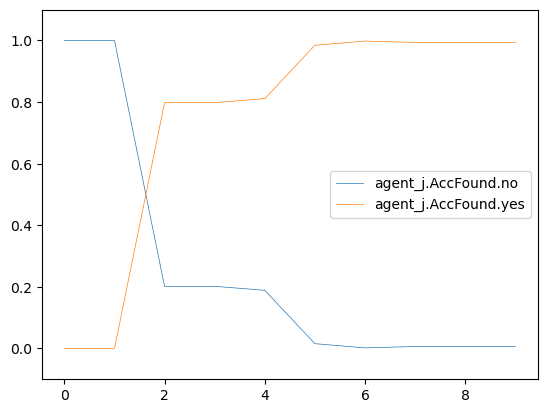

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0   EnumAccounts   
3                     0.0                     1.0     PrivEscAcc   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0      FileRecon   
6                     1.0                     0.0           Exit   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

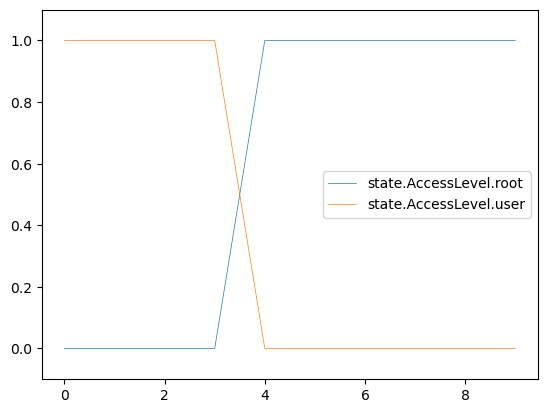

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000   EnumAccounts   
3                  0.000000                  1.000000     PrivEscAcc   
4                  0.999643                  0.000357      FileRecon   
5                  0.999536                  0.000464      FileRecon   
6                  0.999484                  0.000516           Exit   
7                  0.999484                  0.000516            Nop   
8                  0.999484                  0.000516            Nop   
9                  0.999484                  0.000516            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

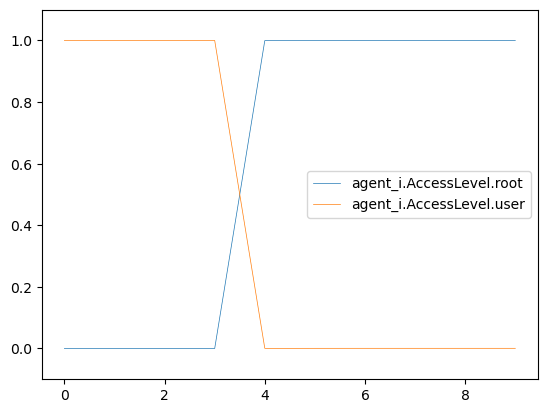

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.717468                  0.282532            Nop   
4                  0.737374                  0.262626            Nop   
5                  0.981439                  0.018561            Nop   
6                  0.997661                  0.002339            Nop   
7                  0.992433                  0.007567            Nop   
8                  0.992434                  0.007566            Nop   
9                  0.992434                  0.007566            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                       file_write                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                       file_write                         yes  
9            Nop                         su_login                         yes

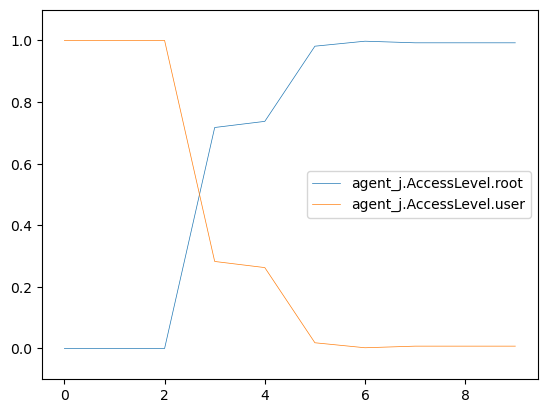

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.421850                        0.578150   
3                         0.351484                        0.648516   
4                         0.350850                        0.649150   
5                         0.350841                        0.649159   
6                         0.350841                        0.649159   
7                         0.350841                        0.649159   
8                         0.350841                        0.649159   
9                         0.350841                        0.649159   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

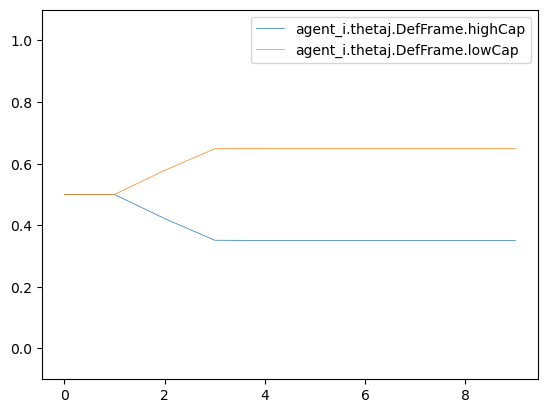

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                        file_enum   
3                               1.0                        file_enum   
4                               1.0                       file_write   
5                               1.0                             none   
6                               1.0                       file_write   
7                               1.0                             none   
8                               1.0                             none   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

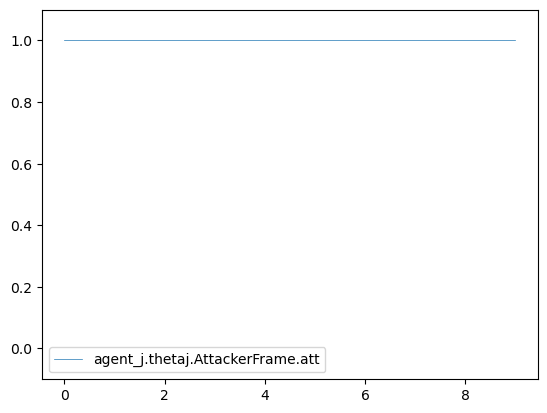

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0       FileRecon            Nop
4                   0.0                    1.0  ManipulateData            Nop
5                   0.0                    1.0            Exit            Nop
6                   0.0                    1.0             Nop            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

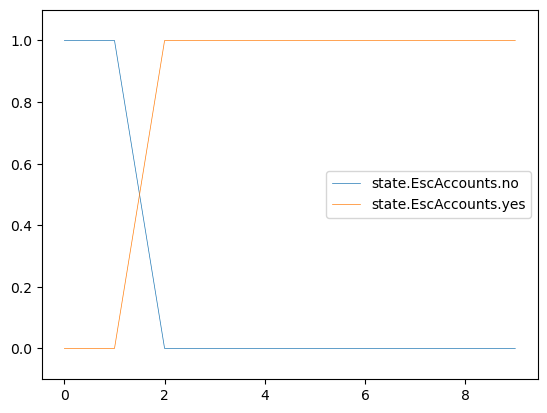

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.677333                 0.322667    EnumAccounts   
3                0.917207                 0.082793       FileRecon   
4                0.918103                 0.081897  ManipulateData   
5                0.918116                 0.081884            Exit   
6                0.918116                 0.081884             Nop   
7                0.918116                 0.081884             Nop   
8                0.918116                 0.081884             Nop   
9                0.918116                 0.081884             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           failure                       active  
3                           success                       active  
4                           failure                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

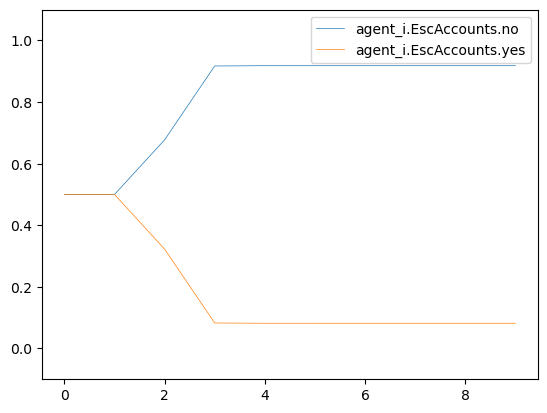

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1    EnumAccounts                        file_enum                         yes  
2    EnumAccounts                        file_enum                         yes  
3       FileRecon                        file_enum                         yes  
4  ManipulateData                       file_write                         yes  
5            Exit                             none                         yes  
6             Nop                       file_write                         yes  
7             Nop                             none                         yes  
8             Nop                             none                         yes  
9             Nop                             none                         yes

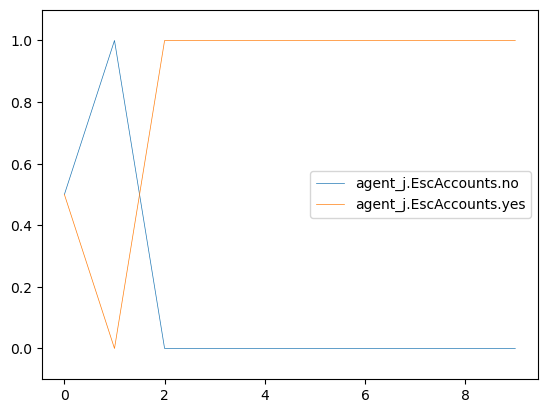

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0    EnumAccounts   DecoyAccount  
2                      1.0    EnumAccounts            Nop  
3                      1.0       FileRecon            Nop  
4                      1.0  ManipulateData            Nop  
5                      1.0            Exit            Nop  
6                      1.0             Nop            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

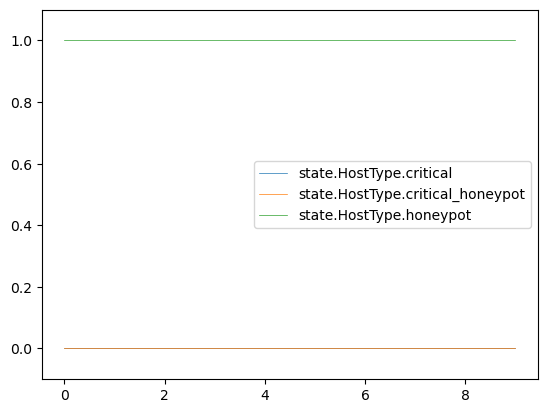

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts   DecoyAccount   
2                        0.0    EnumAccounts            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

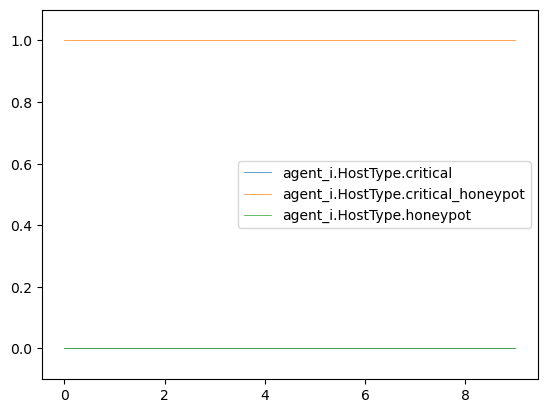

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount    EnumAccounts   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                        file_enum                         yes  
4                       file_write                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

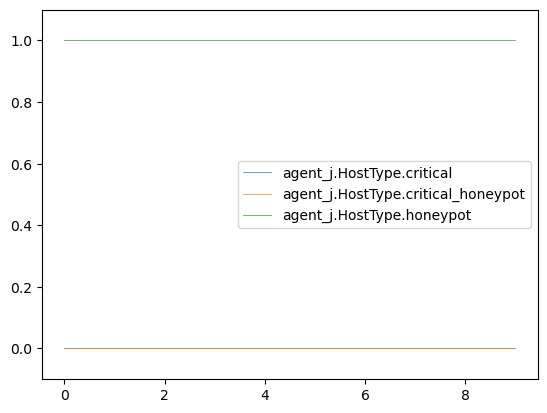

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0    EnumAccounts   DecoyAccount
2                 0.0                  1.0    EnumAccounts            Nop
3                 0.0                  1.0       FileRecon            Nop
4                 0.0                  1.0  ManipulateData            Nop
5                 0.0                  1.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

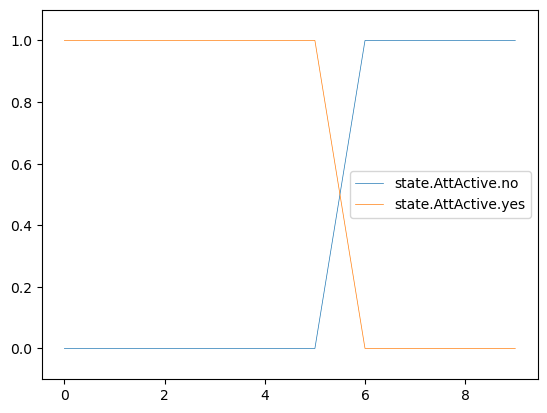

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

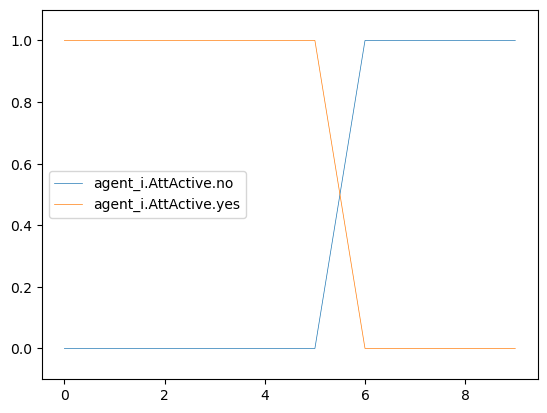

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.500000           5.000000e-01            Nop       FileRecon   
1              0.010204           9.897959e-01   DecoyAccount    EnumAccounts   
2              0.000118           9.998821e-01            Nop    EnumAccounts   
3              0.000005           9.999955e-01            Nop       FileRecon   
4              0.227250           7.727499e-01            Nop  ManipulateData   
5              0.104112           8.958879e-01            Nop            Exit   
6              0.999641           3.591890e-04            Nop             Nop   
7              0.998823           1.176747e-03            Nop             Nop   
8              1.000000           1.834543e-12            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                        file_enum                         yes  
4                       file_write                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

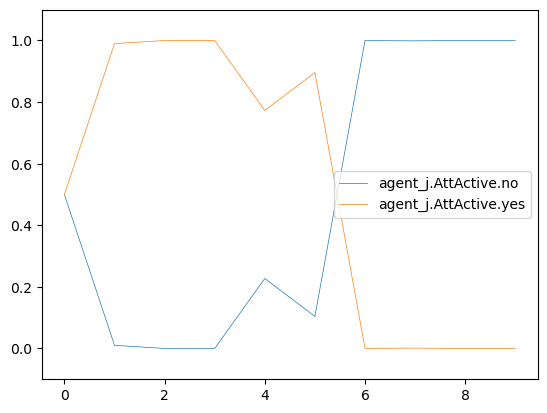

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0    EnumAccounts   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0       FileRecon   
4                    1.0                     0.0  ManipulateData   
5                    1.0                     0.0            Exit   
6                    1.0                     0.0             Nop   
7                    1.0                     0.0             Nop   
8                    1.0                     0.0             Nop   
9                    1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

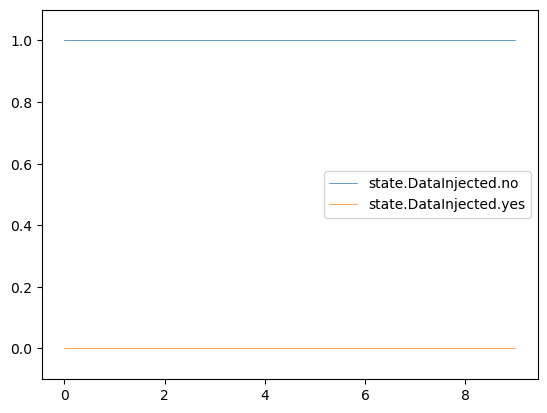

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.999263                  0.000737            Exit   
6                 0.999263                  0.000737             Nop   
7                 0.999263                  0.000737             Nop   
8                 0.999263                  0.000737             Nop   
9                 0.999263                  0.000737             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           failure                       active  
3                           success                       active  
4                           failure                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

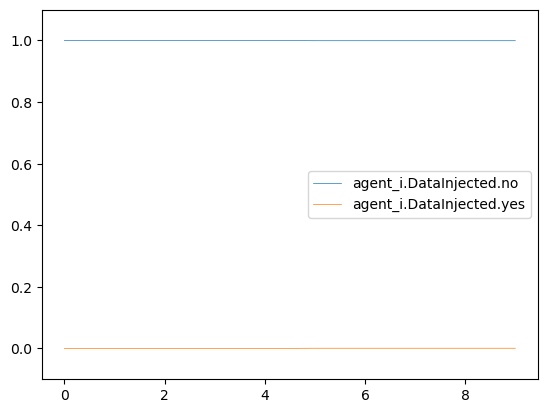

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.139347                  0.860653            Nop   
6                 0.116382                  0.883617            Nop   
7                 0.116072                  0.883928            Nop   
8                 0.116072                  0.883928            Nop   
9                 0.116072                  0.883928            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1    EnumAccounts                        file_enum                         yes  
2    EnumAccounts                        file_enum                         yes  
3       FileRecon                        file_enum                         yes  
4  ManipulateData                       file_write                         yes  
5            Exit                             none                         yes  
6             Nop                       file_write                         yes  
7             Nop                             none                         yes  
8             Nop                             none                         yes  
9             Nop                             none                         yes

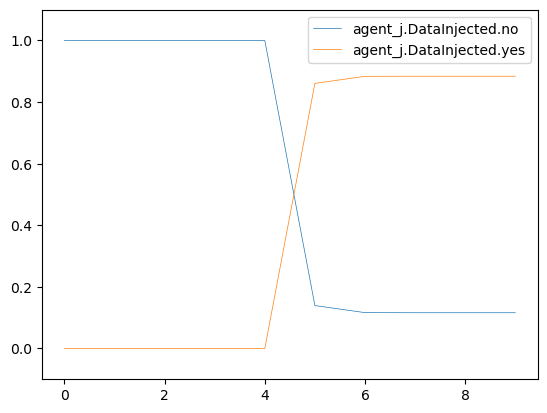

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0    EnumAccounts   DecoyAccount
2                   1.0                   0.0    EnumAccounts            Nop
3                   1.0                   0.0       FileRecon            Nop
4                   1.0                   0.0  ManipulateData            Nop
5                   1.0                   0.0            Exit            Nop
6                   1.0                   0.0             Nop            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

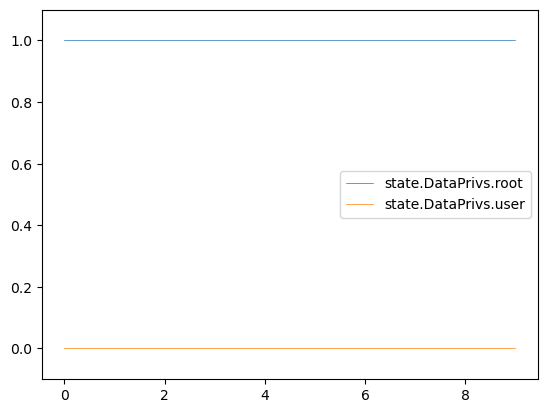

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892    EnumAccounts   
3                0.608108                0.391892       FileRecon   
4                0.378788                0.621212  ManipulateData   
5                0.657410                0.342590            Exit   
6                0.657410                0.342590             Nop   
7                0.657410                0.342590             Nop   
8                0.657410                0.342590             Nop   
9                0.657410                0.342590             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           failure                       active  
3                           success                       active  
4                           failure                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

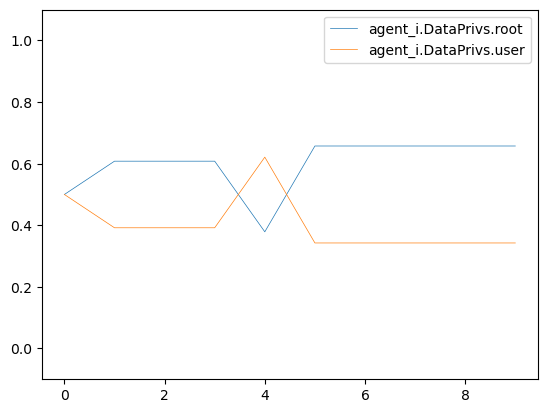

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1    EnumAccounts                        file_enum                         yes  
2    EnumAccounts                        file_enum                         yes  
3       FileRecon                        file_enum                         yes  
4  ManipulateData                       file_write                         yes  
5            Exit                             none                         yes  
6             Nop                       file_write                         yes  
7             Nop                             none                         yes  
8             Nop                             none                         yes  
9             Nop                             none                         yes

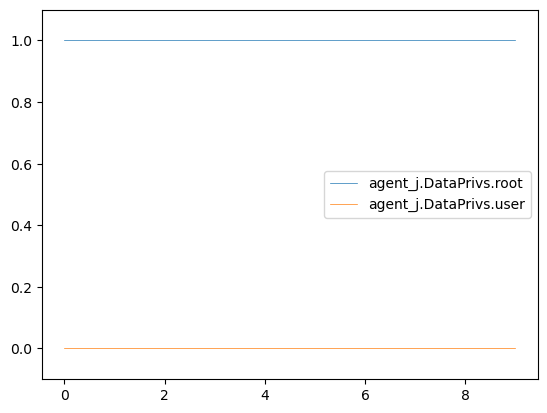

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0    EnumAccounts   DecoyAccount
2                   1.0                    0.0    EnumAccounts            Nop
3                   1.0                    0.0       FileRecon            Nop
4                   1.0                    0.0  ManipulateData            Nop
5                   1.0                    0.0            Exit            Nop
6                   1.0                    0.0             Nop            Nop
7                   1.0                    0.0             Nop            Nop
8                   1.0                    0.0             Nop            Nop
9                   1.0                    0.0             Nop            Nop

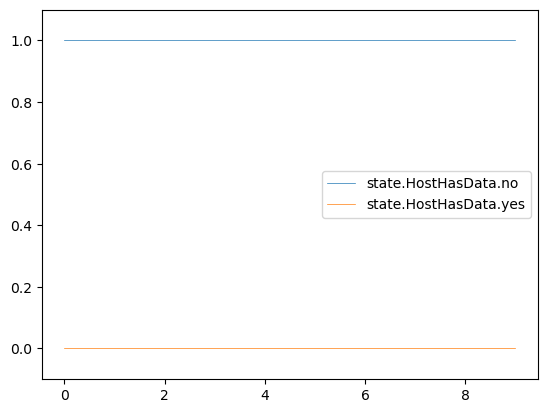

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892    EnumAccounts   
3                0.608108                 0.391892       FileRecon   
4                0.378788                 0.621212  ManipulateData   
5                0.657410                 0.342590            Exit   
6                0.657410                 0.342590             Nop   
7                0.657410                 0.342590             Nop   
8                0.657410                 0.342590             Nop   
9                0.657410                 0.342590             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           failure                       active  
3                           success                       active  
4                           failure                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

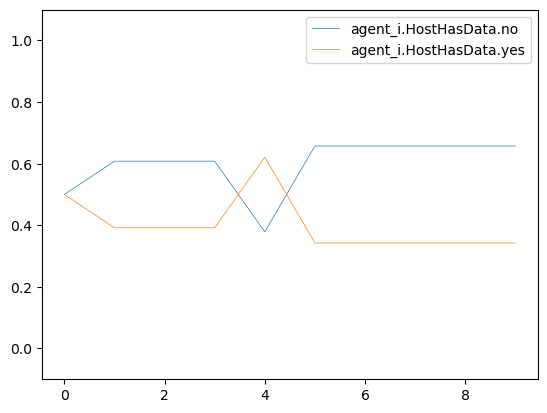

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1    EnumAccounts                        file_enum                         yes  
2    EnumAccounts                        file_enum                         yes  
3       FileRecon                        file_enum                         yes  
4  ManipulateData                       file_write                         yes  
5            Exit                             none                         yes  
6             Nop                       file_write                         yes  
7             Nop                             none                         yes  
8             Nop                             none                         yes  
9             Nop                             none                         yes

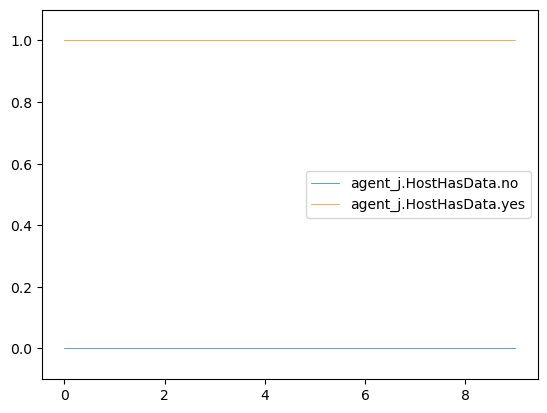

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0    EnumAccounts   DecoyAccount
2                 1.0                  0.0    EnumAccounts            Nop
3                 1.0                  0.0       FileRecon            Nop
4                 1.0                  0.0  ManipulateData            Nop
5                 1.0                  0.0            Exit            Nop
6                 1.0                  0.0             Nop            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

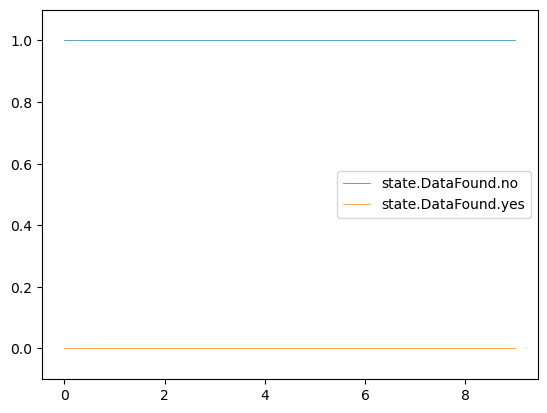

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts   DecoyAccount   
2              0.972973               0.027027    EnumAccounts            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.575758               0.424242  ManipulateData            Nop   
5              0.999263               0.000737            Exit            Nop   
6              0.999263               0.000737             Nop            Nop   
7              0.999263               0.000737             Nop            Nop   
8              0.999263               0.000737             Nop            Nop   
9              0.999263               0.000737             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

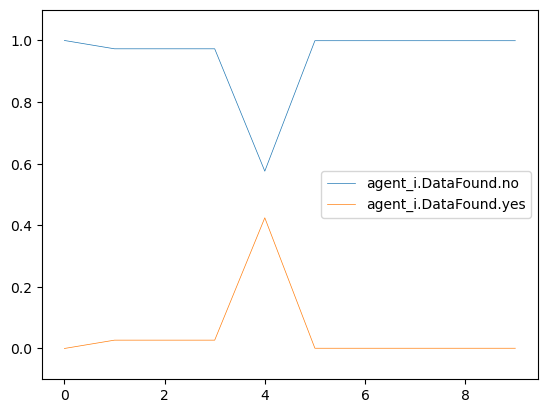

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount    EnumAccounts   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop       FileRecon   
4              0.440618               0.559382            Nop  ManipulateData   
5              0.136558               0.863442            Nop            Exit   
6              0.115827               0.884173            Nop             Nop   
7              0.115743               0.884257            Nop             Nop   
8              0.115743               0.884257            Nop             Nop   
9              0.115743               0.884257            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                        file_enum                         yes  
4                       file_write                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

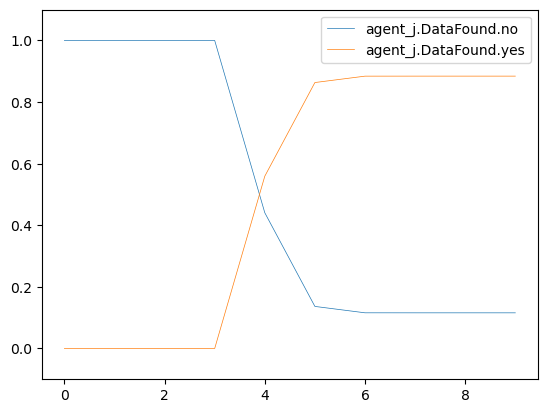

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0    EnumAccounts   DecoyAccount
2                1.0                 0.0    EnumAccounts            Nop
3                0.0                 1.0       FileRecon            Nop
4                0.0                 1.0  ManipulateData            Nop
5                0.0                 1.0            Exit            Nop
6                0.0                 1.0             Nop            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

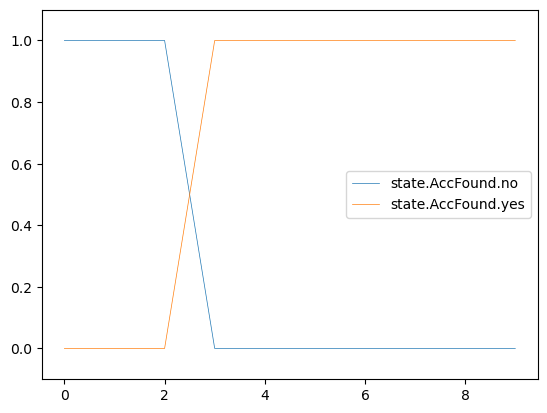

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts   DecoyAccount   
2             0.900718              0.099282    EnumAccounts            Nop   
3             0.966157              0.033843       FileRecon            Nop   
4             0.966524              0.033476  ManipulateData            Nop   
5             0.966529              0.033471            Exit            Nop   
6             0.966529              0.033471             Nop            Nop   
7             0.966529              0.033471             Nop            Nop   
8             0.966529              0.033471             Nop            Nop   
9             0.966529              0.033471             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           success   
6                   user_files                           success   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

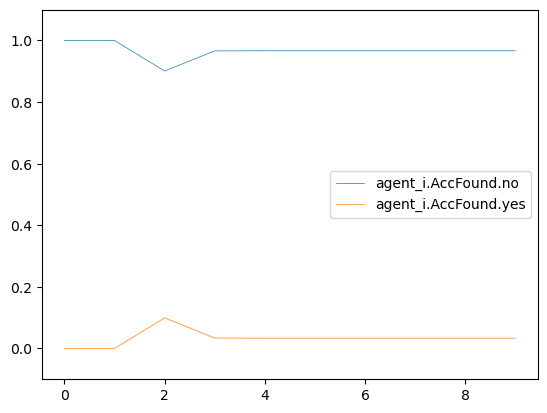

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount    EnumAccounts   
2             0.201010              0.798991            Nop    EnumAccounts   
3             0.671330              0.328670            Nop       FileRecon   
4             0.213657              0.786343            Nop  ManipulateData   
5             0.080566              0.919434            Nop            Exit   
6             0.082790              0.917210            Nop             Nop   
7             0.082713              0.917287            Nop             Nop   
8             0.082713              0.917287            Nop             Nop   
9             0.082713              0.917287            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                        file_enum                         yes  
4                       file_write                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

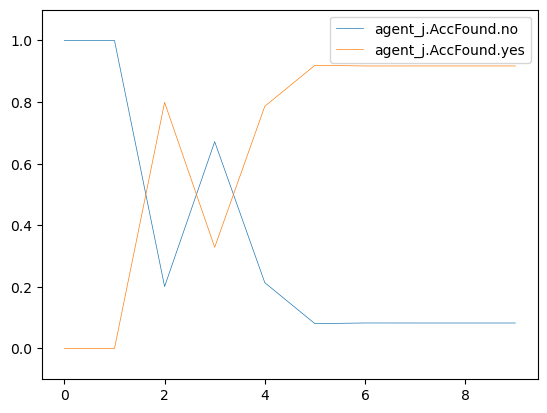

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0    EnumAccounts   
2                     0.0                     1.0    EnumAccounts   
3                     0.0                     1.0       FileRecon   
4                     0.0                     1.0  ManipulateData   
5                     0.0                     1.0            Exit   
6                     0.0                     1.0             Nop   
7                     0.0                     1.0             Nop   
8                     0.0                     1.0             Nop   
9                     0.0                     1.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

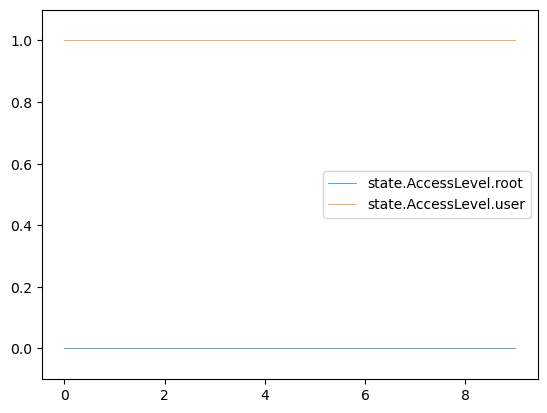

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0       FileRecon   
1                       0.0                       1.0    EnumAccounts   
2                       0.0                       1.0    EnumAccounts   
3                       0.0                       1.0       FileRecon   
4                       0.0                       1.0  ManipulateData   
5                       0.0                       1.0            Exit   
6                       0.0                       1.0             Nop   
7                       0.0                       1.0             Nop   
8                       0.0                       1.0             Nop   
9                       0.0                       1.0             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           failure                       active  
3                           success                       active  
4                           failure                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

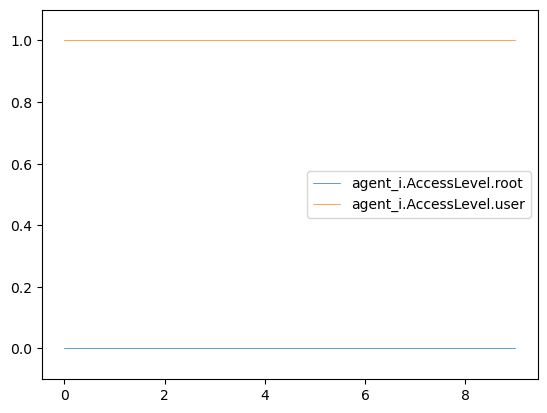

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.027617                  0.972383            Nop   
4                  0.700027                  0.299973            Nop   
5                  0.887839                  0.112161            Nop   
6                  0.884741                  0.115259            Nop   
7                  0.884848                  0.115152            Nop   
8                  0.884848                  0.115152            Nop   
9                  0.884848                  0.115152            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1    EnumAccounts                        file_enum                         yes  
2    EnumAccounts                        file_enum                         yes  
3       FileRecon                        file_enum                         yes  
4  ManipulateData                       file_write                         yes  
5            Exit                             none                         yes  
6             Nop                       file_write                         yes  
7             Nop                             none                         yes  
8             Nop                             none                         yes  
9             Nop                             none                         yes

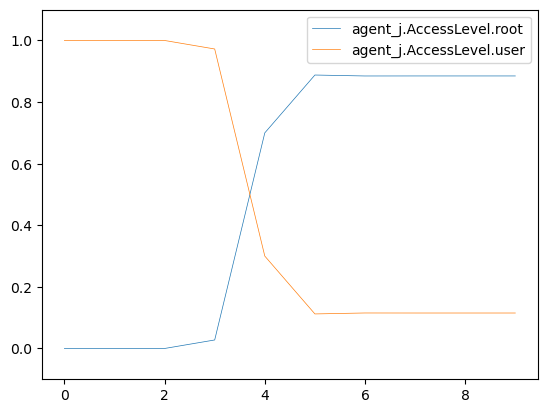

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.421850                        0.578150   
3                         0.462605                        0.537395   
4                         0.497608                        0.502392   
5                         0.497568                        0.502432   
6                         0.497559                        0.502441   
7                         0.497559                        0.502441   
8                         0.497559                        0.502441   
9                         0.497559                        0.502441   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

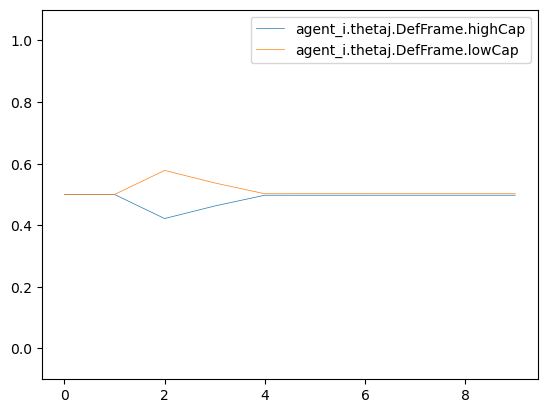

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                        file_enum   
3                               1.0                         su_login   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                             none   
7                               1.0                             none   
8                               1.0                             none   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

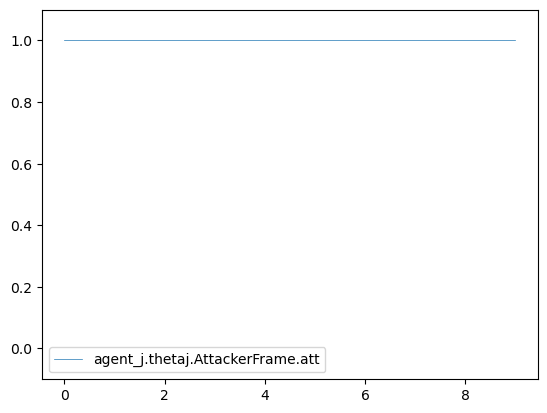

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

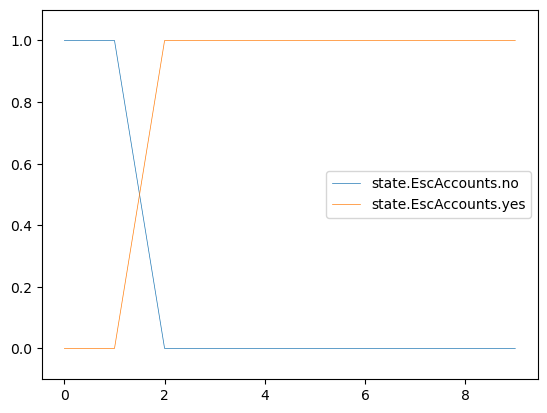

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.677333                 0.322667   EnumAccounts   
3                0.247398                 0.752602     PrivEscAcc   
4                0.000339                 0.999661      FileRecon   
5                0.000441                 0.999559      FileRecon   
6                0.000491                 0.999510           Exit   
7                0.000491                 0.999510            Nop   
8                0.000491                 0.999510            Nop   
9                0.000491                 0.999510            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

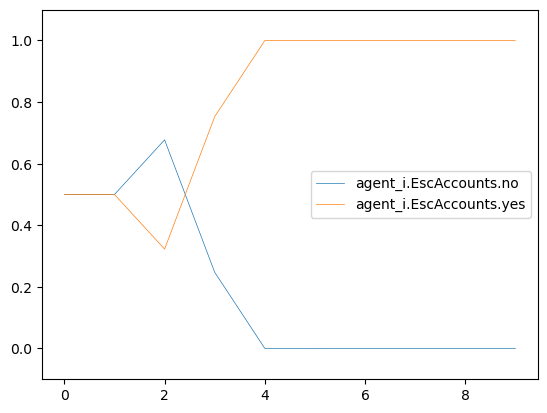

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

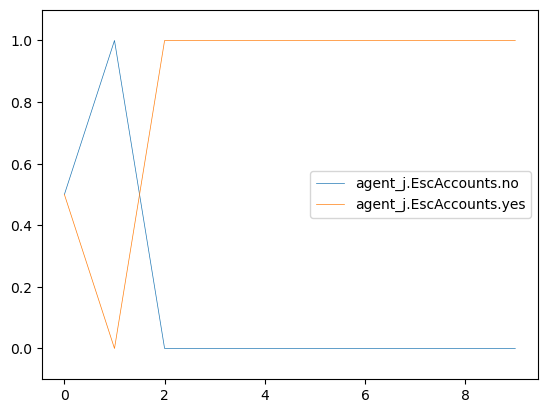

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0   EnumAccounts            Nop  
3                      1.0     PrivEscAcc            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0      FileRecon            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

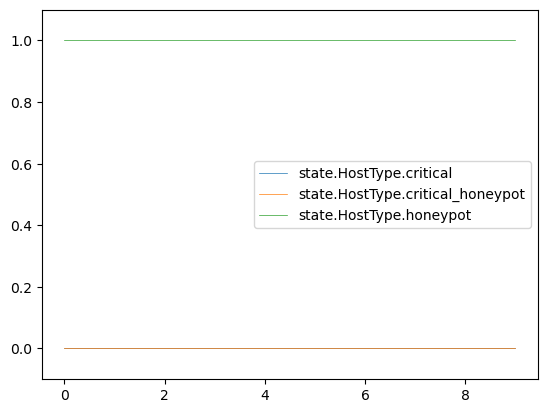

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts            Nop   
3                        0.0     PrivEscAcc            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0      FileRecon            Nop   
6                        0.0           Exit            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

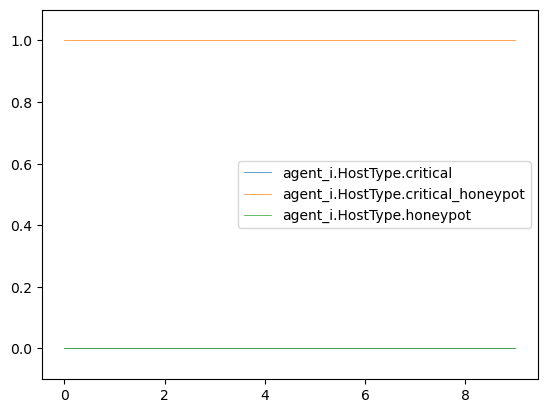

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop      FileRecon   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

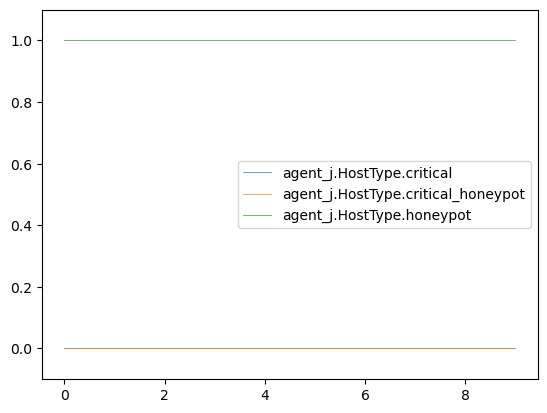

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0   EnumAccounts            Nop
3                 0.0                  1.0     PrivEscAcc            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0      FileRecon            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

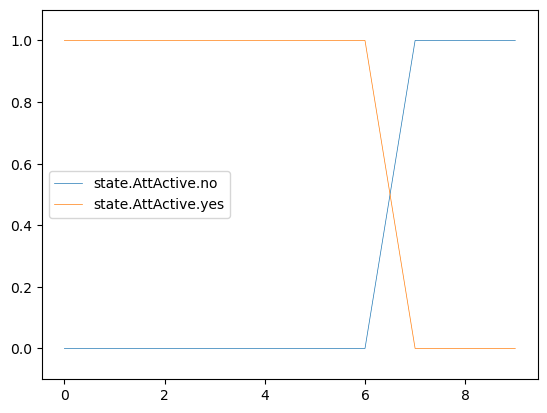

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0      FileRecon            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

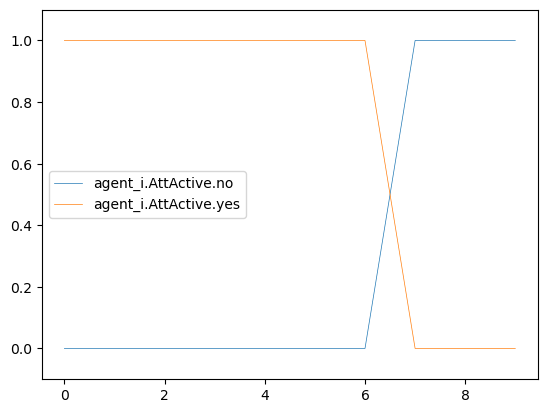

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop   EnumAccounts   
3              0.000005           9.999955e-01            Nop     PrivEscAcc   
4              0.668446           3.315542e-01            Nop      FileRecon   
5              0.030931           9.690692e-01            Nop      FileRecon   
6              0.002483           9.975172e-01            Nop           Exit   
7              0.959959           4.004066e-02            Nop            Nop   
8              1.000000           3.976003e-07            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

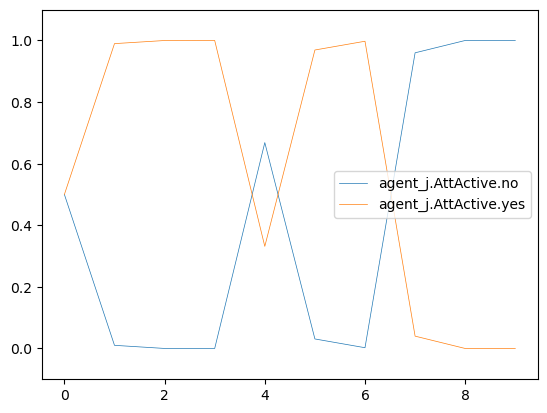

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0   EnumAccounts            Nop
3                    1.0                     0.0     PrivEscAcc            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0      FileRecon            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

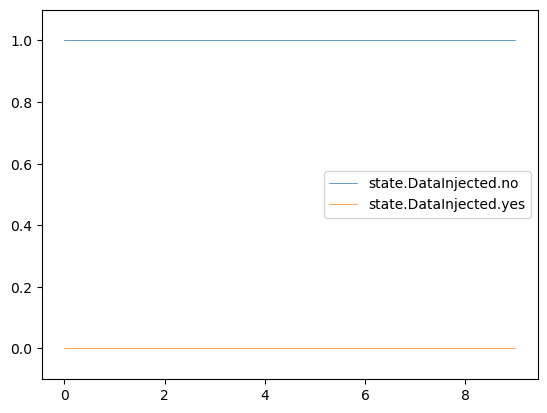

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

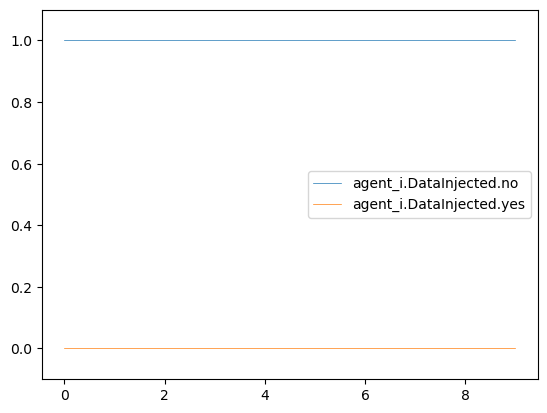

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.999365                  0.000635            Nop   
6                 0.971587                  0.028413            Nop   
7                 0.844811                  0.155189            Nop   
8                 0.844807                  0.155193            Nop   
9                 0.844807                  0.155193            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

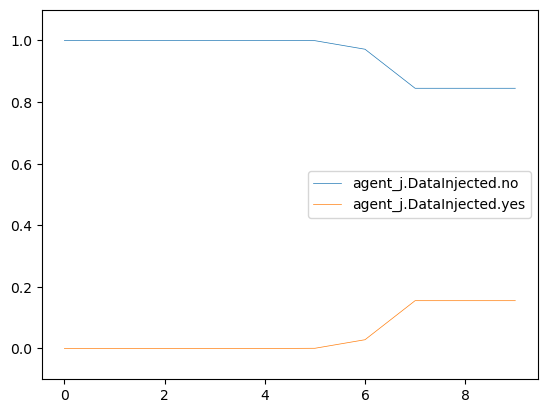

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0   EnumAccounts            Nop
3                   1.0                   0.0     PrivEscAcc            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0      FileRecon            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

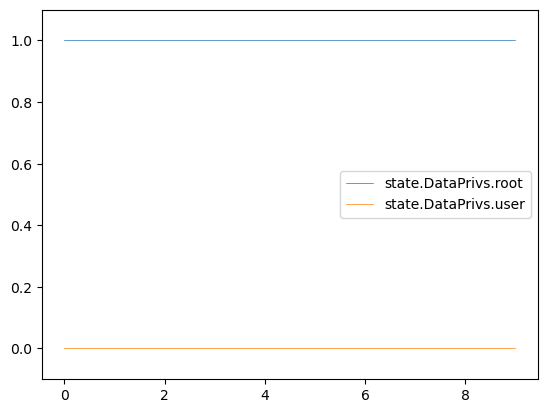

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892   EnumAccounts   
3                0.608108                0.391892     PrivEscAcc   
4                0.608108                0.391892      FileRecon   
5                0.546989                0.453011      FileRecon   
6                0.512811                0.487190           Exit   
7                0.512811                0.487190            Nop   
8                0.512811                0.487190            Nop   
9                0.512811                0.487190            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

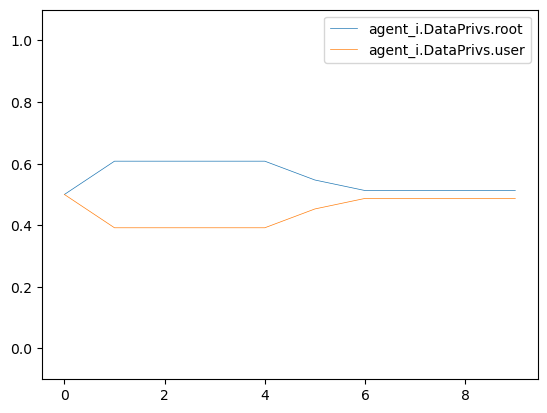

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

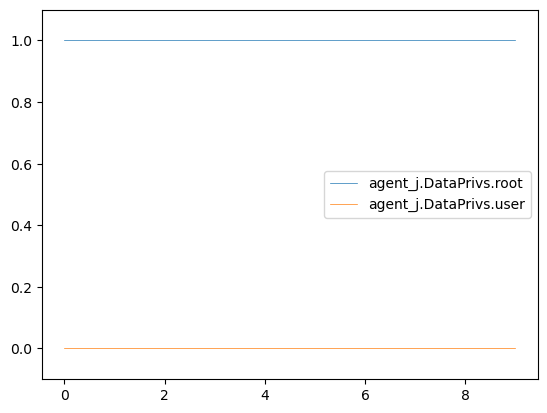

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0   EnumAccounts            Nop
3                   1.0                    0.0     PrivEscAcc            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0      FileRecon            Nop
6                   1.0                    0.0           Exit            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

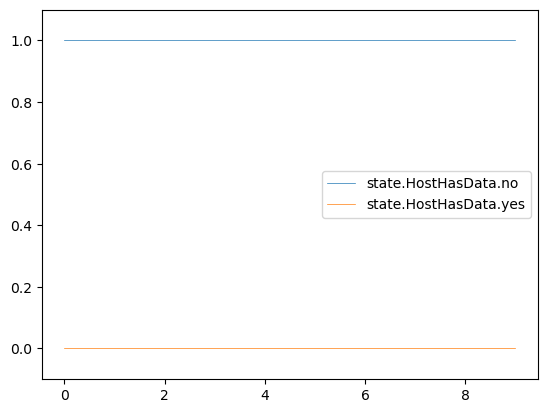

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892   EnumAccounts   
3                0.608108                 0.391892     PrivEscAcc   
4                0.608108                 0.391892      FileRecon   
5                0.848609                 0.151391      FileRecon   
6                0.960331                 0.039669           Exit   
7                0.960331                 0.039669            Nop   
8                0.960331                 0.039669            Nop   
9                0.960331                 0.039669            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

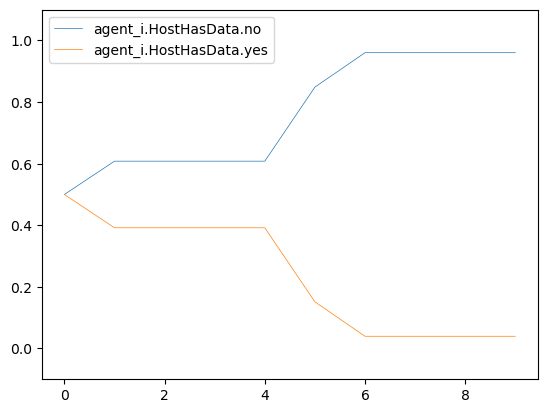

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

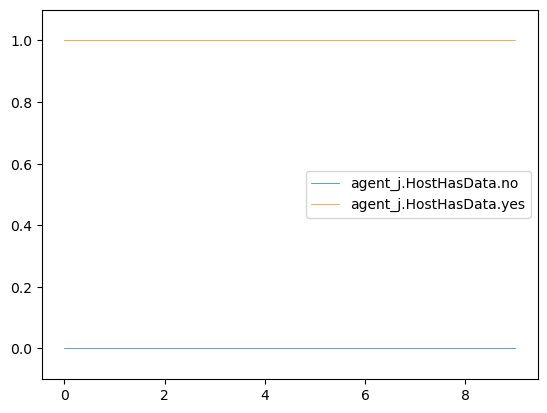

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0   EnumAccounts            Nop
3                 1.0                  0.0     PrivEscAcc            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0      FileRecon            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

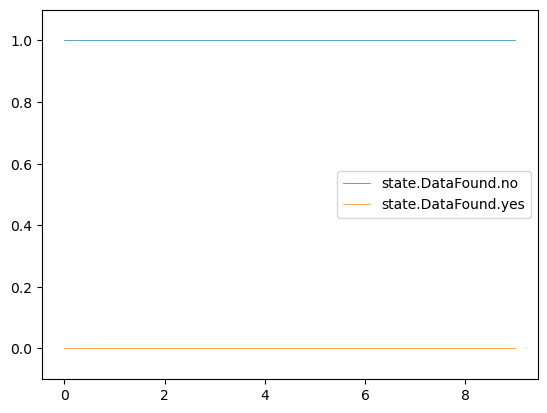

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027   EnumAccounts            Nop   
3              0.972973               0.027027     PrivEscAcc            Nop   
4              0.972973               0.027027      FileRecon            Nop   
5              0.950564               0.049436      FileRecon            Nop   
6              0.983544               0.016457           Exit            Nop   
7              0.983544               0.016457            Nop            Nop   
8              0.983544               0.016457            Nop            Nop   
9              0.983544               0.016457            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

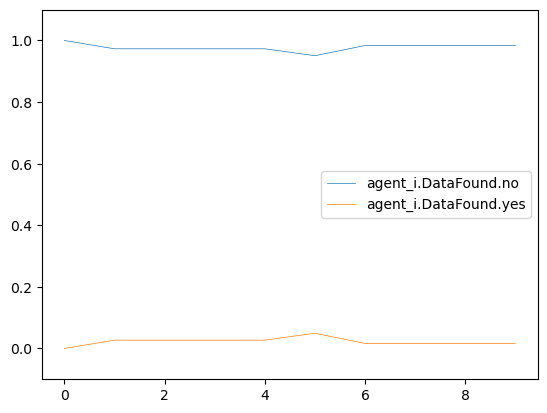

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop   EnumAccounts   
3              1.000000               0.000000            Nop     PrivEscAcc   
4              0.983037               0.016963            Nop      FileRecon   
5              0.243730               0.756270            Nop      FileRecon   
6              0.137410               0.862590            Nop           Exit   
7              0.503868               0.496132            Nop            Nop   
8              0.503883               0.496117            Nop            Nop   
9              0.503883               0.496117            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

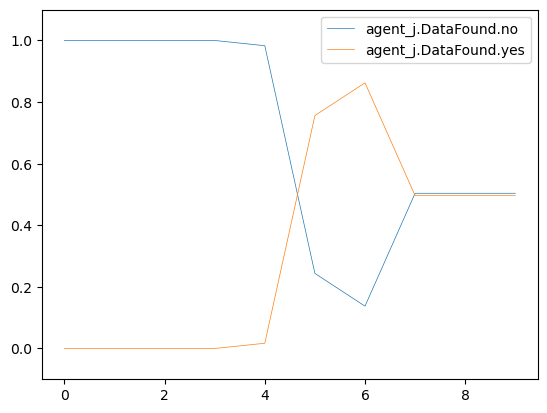

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0   EnumAccounts            Nop
3                0.0                 1.0     PrivEscAcc            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0      FileRecon            Nop
6                0.0                 1.0           Exit            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

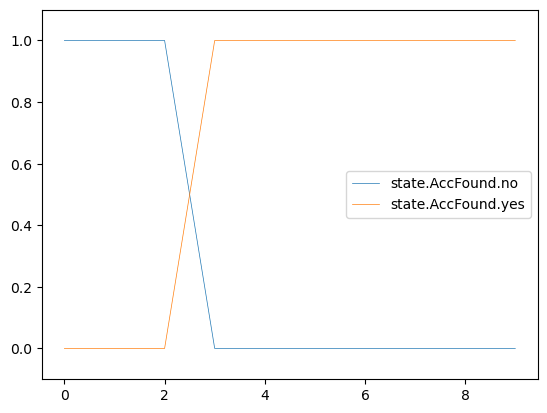

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.900718              0.099282   EnumAccounts            Nop   
3             0.260602              0.739398     PrivEscAcc            Nop   
4             0.000357              0.999643      FileRecon            Nop   
5             0.000464              0.999536      FileRecon            Nop   
6             0.000516              0.999484           Exit            Nop   
7             0.000516              0.999484            Nop            Nop   
8             0.000516              0.999484            Nop            Nop   
9             0.000516              0.999484            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           failure   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

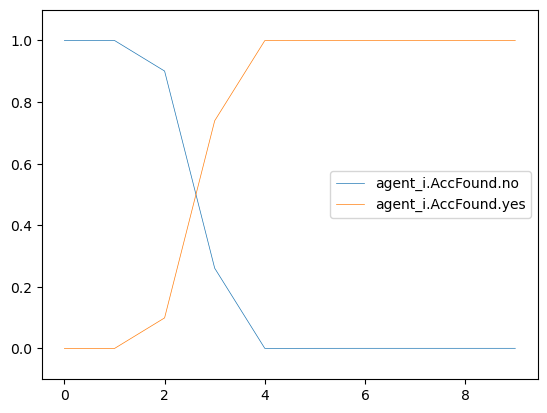

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop   EnumAccounts   
3             0.671330              0.328670            Nop     PrivEscAcc   
4             0.521709              0.478291            Nop      FileRecon   
5             0.047000              0.953000            Nop      FileRecon   
6             0.002054              0.997946            Nop           Exit   
7             0.008348              0.991652            Nop            Nop   
8             0.008348              0.991652            Nop            Nop   
9             0.008348              0.991652            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

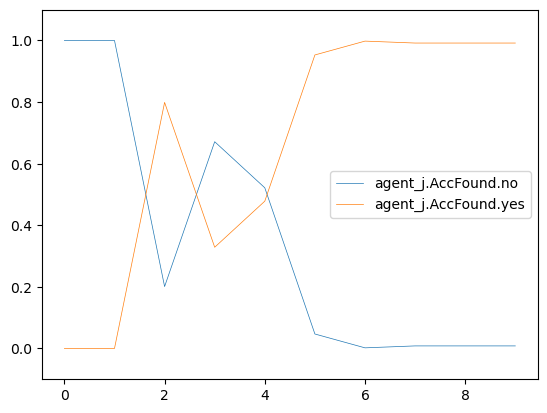

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0   EnumAccounts   
3                     0.0                     1.0     PrivEscAcc   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0      FileRecon   
6                     1.0                     0.0           Exit   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

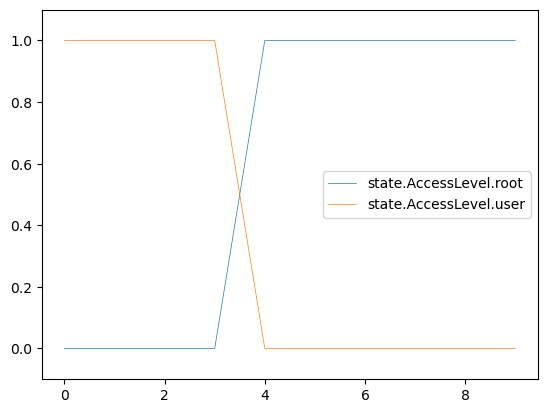

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000   EnumAccounts   
3                  0.000000                  1.000000     PrivEscAcc   
4                  0.999643                  0.000357      FileRecon   
5                  0.999536                  0.000464      FileRecon   
6                  0.999484                  0.000516           Exit   
7                  0.999484                  0.000516            Nop   
8                  0.999484                  0.000516            Nop   
9                  0.999484                  0.000516            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

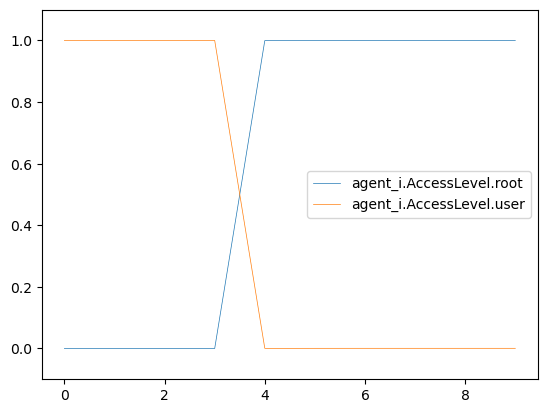

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.027617                  0.972383            Nop   
4                  0.249502                  0.750498            Nop   
5                  0.943488                  0.056512            Nop   
6                  0.997549                  0.002451            Nop   
7                  0.990031                  0.009969            Nop   
8                  0.990031                  0.009969            Nop   
9                  0.990031                  0.009969            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

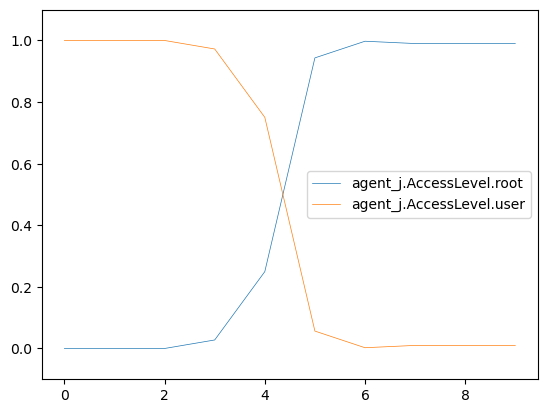

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.577129                        0.422871   
4                         0.500036                        0.499964   
5                         0.500015                        0.499985   
6                         0.500012                        0.499988   
7                         0.500012                        0.499988   
8                         0.500012                        0.499988   
9                         0.500012                        0.499988   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

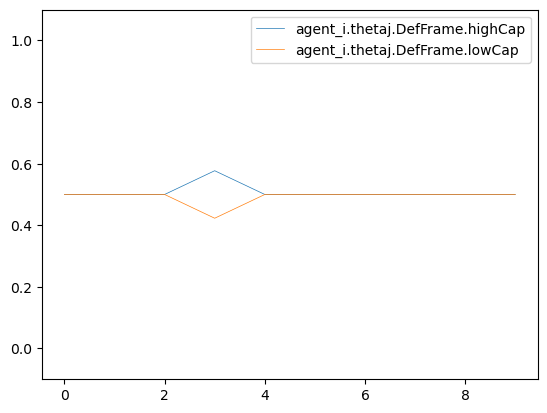

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                       file_write   
2                               1.0                        file_enum   
3                               1.0                         su_login   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                             none   
7                               1.0                             none   
8                               1.0                       file_write   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

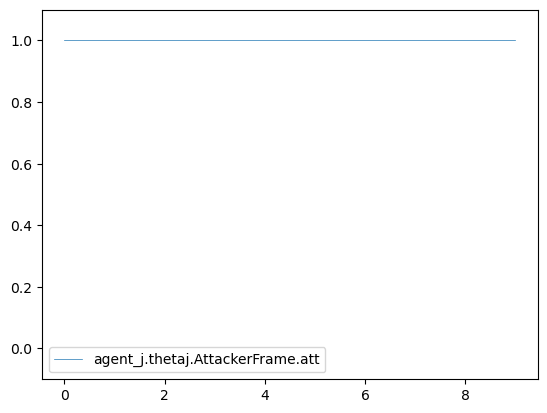

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0  ManipulateData   DecoyAccount
2                   0.0                    1.0    EnumAccounts            Nop
3                   0.0                    1.0      PrivEscAcc            Nop
4                   0.0                    1.0       FileRecon            Nop
5                   0.0                    1.0       FileRecon            Nop
6                   0.0                    1.0            Exit            Nop
7                   0.0                    1.0             Nop            Nop
8                   0.0                    1.0             Nop            Nop
9                   0.0                    1.0             Nop            Nop

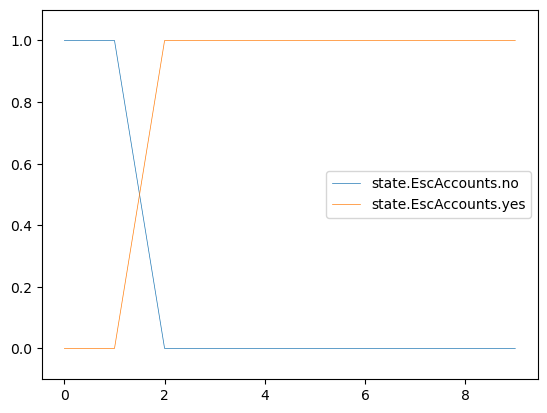

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.377500                 0.622500    EnumAccounts   
3                0.076016                 0.923984      PrivEscAcc   
4                0.000105                 0.999895       FileRecon   
5                0.000137                 0.999863       FileRecon   
6                0.000152                 0.999848            Exit   
7                0.000152                 0.999848             Nop   
8                0.000152                 0.999848             Nop   
9                0.000152                 0.999848             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

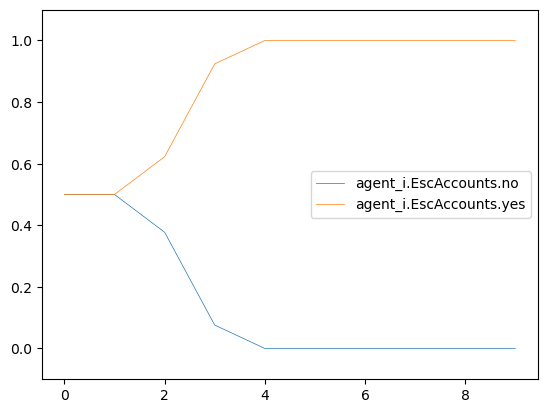

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1  ManipulateData                       file_write                         yes  
2    EnumAccounts                        file_enum                         yes  
3      PrivEscAcc                         su_login                         yes  
4       FileRecon                        file_enum                         yes  
5       FileRecon                        file_enum                         yes  
6            Exit                             none                         yes  
7             Nop                             none                         yes  
8             Nop                       file_write                         yes  
9             Nop                             none                         yes

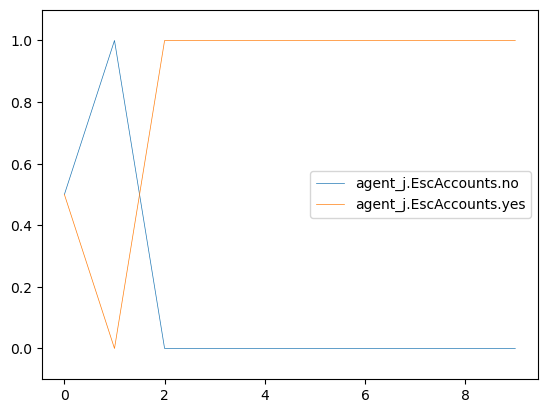

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action agent_j.action  
0                      1.0       FileRecon            Nop  
1                      1.0  ManipulateData   DecoyAccount  
2                      1.0    EnumAccounts            Nop  
3                      1.0      PrivEscAcc            Nop  
4                      1.0       FileRecon            Nop  
5                      1.0       FileRecon            Nop  
6                      1.0            Exit            Nop  
7                      1.0             Nop            Nop  
8                      1.0             Nop            Nop  
9                      1.0             Nop            Nop

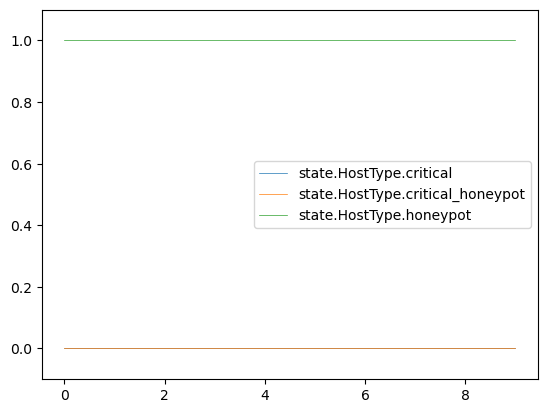

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action agent_j.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData   DecoyAccount   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0       FileRecon            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

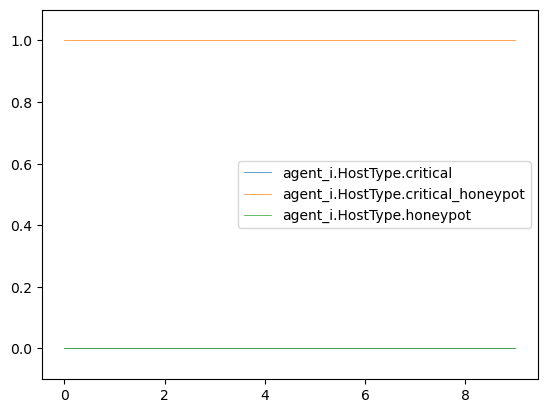

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action  agent_i.action  \
0                        1.0            Nop       FileRecon   
1                        1.0   DecoyAccount  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                       file_write                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

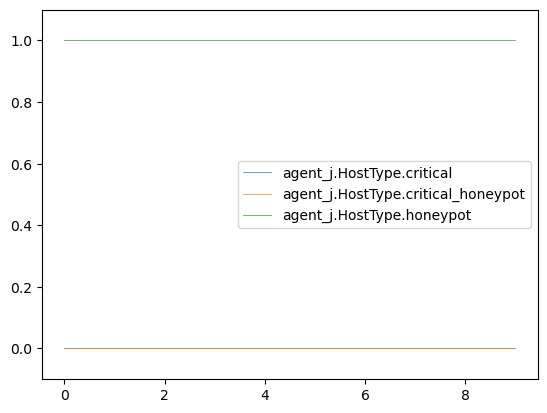

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action agent_j.action
0                 0.0                  1.0       FileRecon            Nop
1                 0.0                  1.0  ManipulateData   DecoyAccount
2                 0.0                  1.0    EnumAccounts            Nop
3                 0.0                  1.0      PrivEscAcc            Nop
4                 0.0                  1.0       FileRecon            Nop
5                 0.0                  1.0       FileRecon            Nop
6                 0.0                  1.0            Exit            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

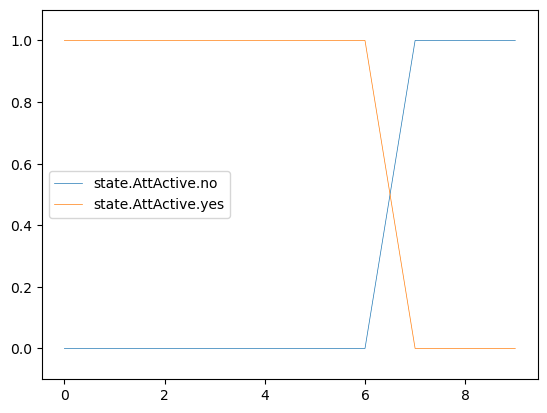

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action agent_j.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData   DecoyAccount   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

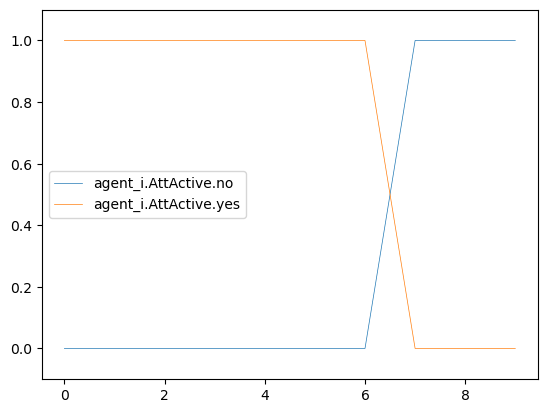

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  agent_i.action  \
0              0.500000           5.000000e-01            Nop       FileRecon   
1              0.010204           9.897959e-01   DecoyAccount  ManipulateData   
2              0.019080           9.809197e-01            Nop    EnumAccounts   
3              0.000224           9.997760e-01            Nop      PrivEscAcc   
4              0.000305           9.996953e-01            Nop       FileRecon   
5              0.000037           9.999629e-01            Nop       FileRecon   
6              0.000974           9.990265e-01            Nop            Exit   
7              0.959589           4.041109e-02            Nop             Nop   
8              1.000000           4.013077e-07            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                       file_write                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

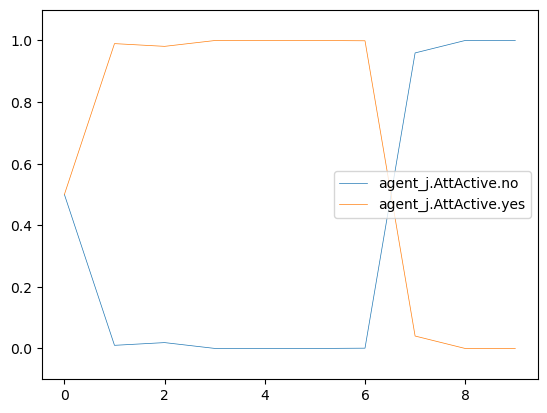

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0       FileRecon   
1                    1.0                     0.0  ManipulateData   
2                    1.0                     0.0    EnumAccounts   
3                    1.0                     0.0      PrivEscAcc   
4                    1.0                     0.0       FileRecon   
5                    1.0                     0.0       FileRecon   
6                    1.0                     0.0            Exit   
7                    1.0                     0.0             Nop   
8                    1.0                     0.0             Nop   
9                    1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

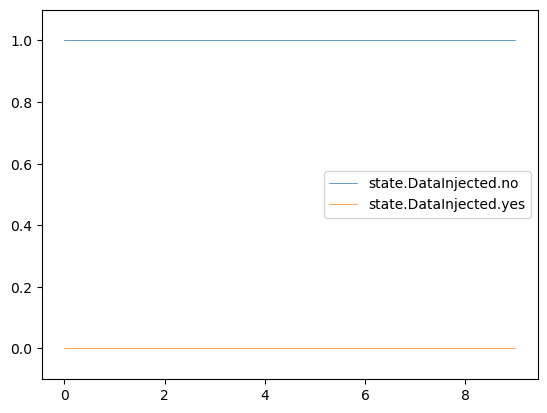

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.999659                  0.000341       FileRecon   
6                 0.999957                  0.000043            Exit   
7                 0.999957                  0.000043             Nop   
8                 0.999957                  0.000043             Nop   
9                 0.999957                  0.000043             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

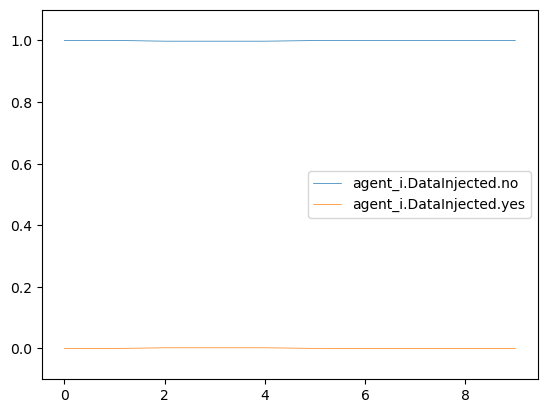

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000              0.000000e+00            Nop   
1                 1.000000              0.000000e+00   DecoyAccount   
2                 1.000000              0.000000e+00            Nop   
3                 1.000000              0.000000e+00            Nop   
4                 1.000000              0.000000e+00            Nop   
5                 1.000000              7.128604e-08            Nop   
6                 0.972271              2.772944e-02            Nop   
7                 0.846438              1.535618e-01            Nop   
8                 0.846434              1.535656e-01            Nop   
9                 0.846434              1.535656e-01            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1  ManipulateData                       file_write                         yes  
2    EnumAccounts                        file_enum                         yes  
3      PrivEscAcc                         su_login                         yes  
4       FileRecon                        file_enum                         yes  
5       FileRecon                        file_enum                         yes  
6            Exit                             none                         yes  
7             Nop                             none                         yes  
8             Nop                       file_write                         yes  
9             Nop                             none                         yes

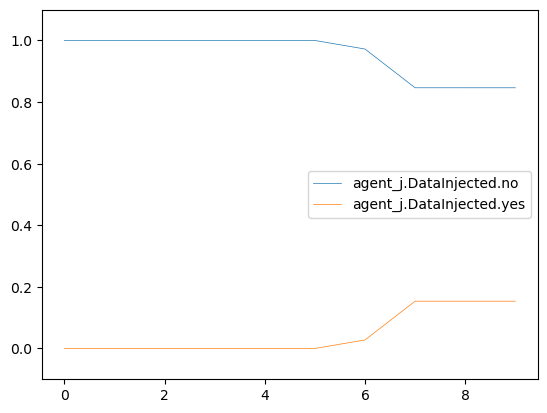

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action agent_j.action
0                   1.0                   0.0       FileRecon            Nop
1                   1.0                   0.0  ManipulateData   DecoyAccount
2                   1.0                   0.0    EnumAccounts            Nop
3                   1.0                   0.0      PrivEscAcc            Nop
4                   1.0                   0.0       FileRecon            Nop
5                   1.0                   0.0       FileRecon            Nop
6                   1.0                   0.0            Exit            Nop
7                   1.0                   0.0             Nop            Nop
8                   1.0                   0.0             Nop            Nop
9                   1.0                   0.0             Nop            Nop

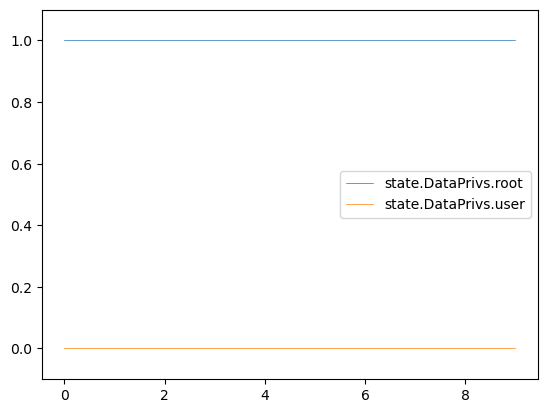

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376405    EnumAccounts   
3                0.623596                0.376404      PrivEscAcc   
4                0.623596                0.376404       FileRecon   
5                0.549073                0.450927       FileRecon   
6                0.513010                0.486990            Exit   
7                0.513010                0.486990             Nop   
8                0.513010                0.486990             Nop   
9                0.513010                0.486990             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

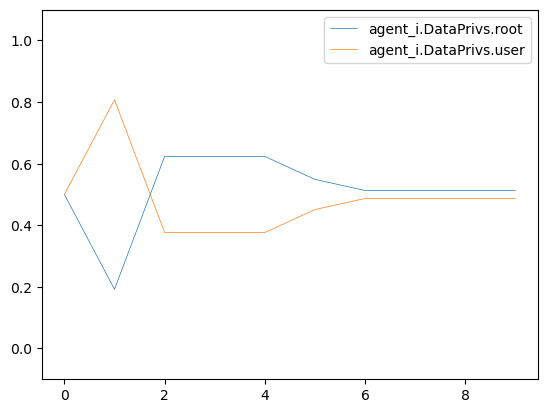

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1  ManipulateData                       file_write                         yes  
2    EnumAccounts                        file_enum                         yes  
3      PrivEscAcc                         su_login                         yes  
4       FileRecon                        file_enum                         yes  
5       FileRecon                        file_enum                         yes  
6            Exit                             none                         yes  
7             Nop                             none                         yes  
8             Nop                       file_write                         yes  
9             Nop                             none                         yes

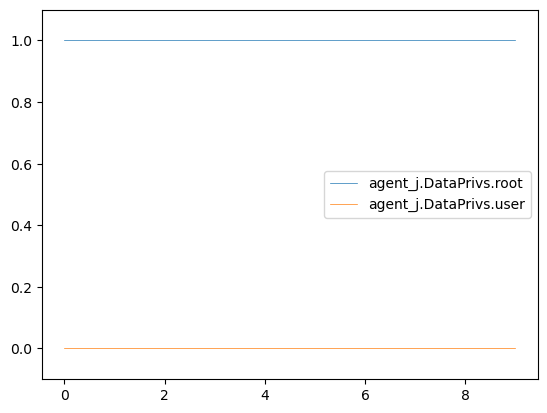

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action agent_j.action
0                   1.0                    0.0       FileRecon            Nop
1                   1.0                    0.0  ManipulateData   DecoyAccount
2                   1.0                    0.0    EnumAccounts            Nop
3                   1.0                    0.0      PrivEscAcc            Nop
4                   1.0                    0.0       FileRecon            Nop
5                   1.0                    0.0       FileRecon            Nop
6                   1.0                    0.0            Exit            Nop
7                   1.0                    0.0             Nop            Nop
8                   1.0                    0.0             Nop            Nop
9                   1.0                    0.0             Nop            Nop

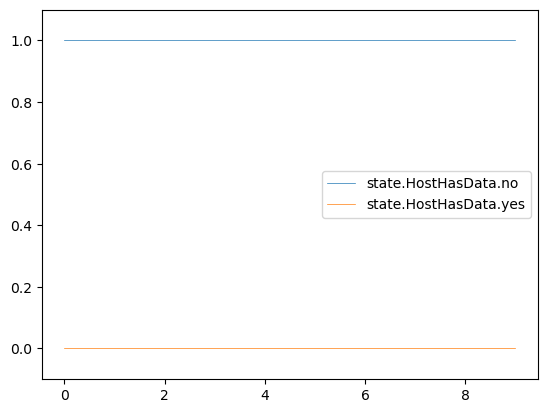

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376405    EnumAccounts   
3                0.623596                 0.376404      PrivEscAcc   
4                0.623596                 0.376404       FileRecon   
5                0.851948                 0.148052       FileRecon   
6                0.960893                 0.039107            Exit   
7                0.960893                 0.039107             Nop   
8                0.960893                 0.039107             Nop   
9                0.960893                 0.039107             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

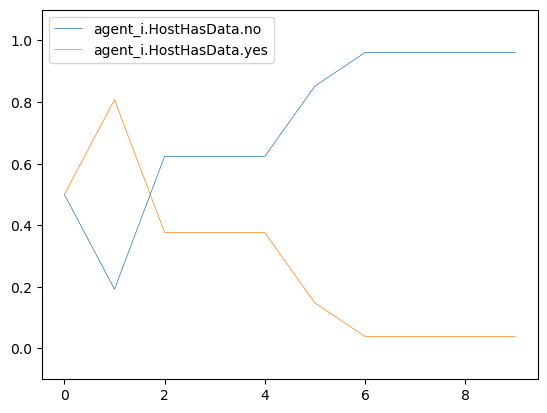

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1  ManipulateData                       file_write                         yes  
2    EnumAccounts                        file_enum                         yes  
3      PrivEscAcc                         su_login                         yes  
4       FileRecon                        file_enum                         yes  
5       FileRecon                        file_enum                         yes  
6            Exit                             none                         yes  
7             Nop                             none                         yes  
8             Nop                       file_write                         yes  
9             Nop                             none                         yes

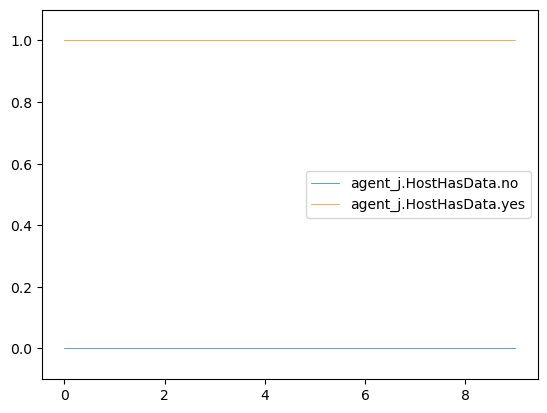

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action agent_j.action
0                 1.0                  0.0       FileRecon            Nop
1                 1.0                  0.0  ManipulateData   DecoyAccount
2                 1.0                  0.0    EnumAccounts            Nop
3                 1.0                  0.0      PrivEscAcc            Nop
4                 1.0                  0.0       FileRecon            Nop
5                 1.0                  0.0       FileRecon            Nop
6                 1.0                  0.0            Exit            Nop
7                 1.0                  0.0             Nop            Nop
8                 1.0                  0.0             Nop            Nop
9                 1.0                  0.0             Nop            Nop

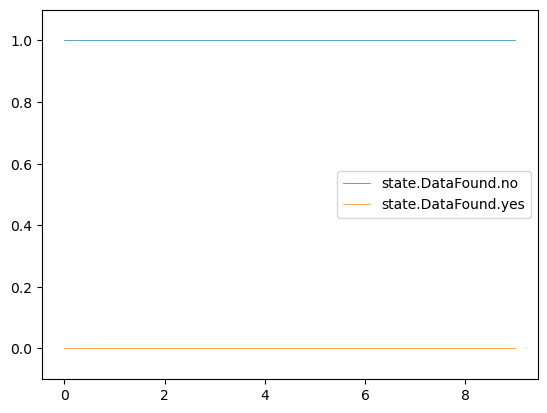

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action agent_j.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.307692               0.692308  ManipulateData   DecoyAccount   
2              0.997753               0.002247    EnumAccounts            Nop   
3              0.997753               0.002247      PrivEscAcc            Nop   
4              0.997753               0.002247       FileRecon            Nop   
5              0.954227               0.045773       FileRecon            Nop   
6              0.984015               0.015985            Exit            Nop   
7              0.984015               0.015985             Nop            Nop   
8              0.984015               0.015985             Nop            Nop   
9              0.984015               0.015985             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

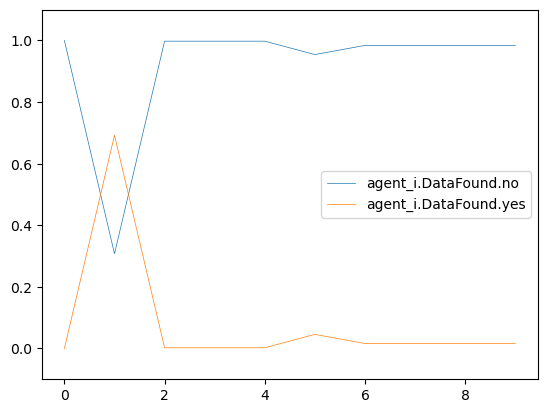

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  agent_i.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000   DecoyAccount  ManipulateData   
2              1.000000               0.000000            Nop    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              0.999992               0.000008            Nop       FileRecon   
5              0.221653               0.778347            Nop       FileRecon   
6              0.136294               0.863706            Nop            Exit   
7              0.502670               0.497330            Nop             Nop   
8              0.502684               0.497316            Nop             Nop   
9              0.502684               0.497316            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                       file_write                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

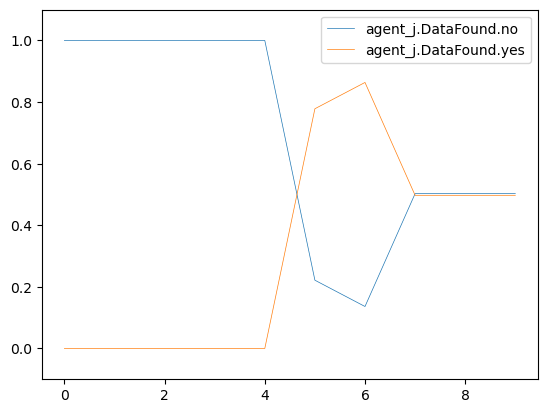

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action agent_j.action
0                1.0                 0.0       FileRecon            Nop
1                1.0                 0.0  ManipulateData   DecoyAccount
2                1.0                 0.0    EnumAccounts            Nop
3                0.0                 1.0      PrivEscAcc            Nop
4                0.0                 1.0       FileRecon            Nop
5                0.0                 1.0       FileRecon            Nop
6                0.0                 1.0            Exit            Nop
7                0.0                 1.0             Nop            Nop
8                0.0                 1.0             Nop            Nop
9                0.0                 1.0             Nop            Nop

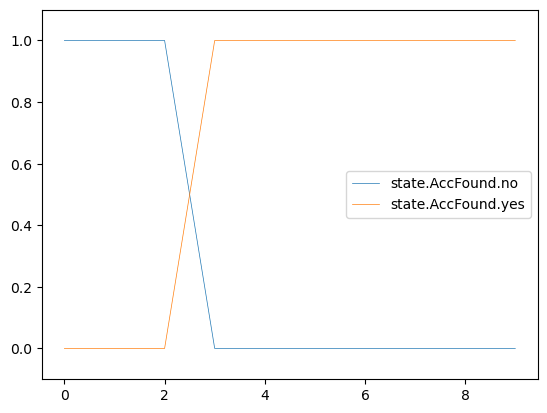

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action agent_j.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData   DecoyAccount   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.100989              0.899011      PrivEscAcc            Nop   
4             0.000133              0.999867       FileRecon            Nop   
5             0.000173              0.999827       FileRecon            Nop   
6             0.000192              0.999808            Exit            Nop   
7             0.000192              0.999808             Nop            Nop   
8             0.000192              0.999808             Nop            Nop   
9             0.000192              0.999808             Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                         none                           failure   
2                   user_files                           success   
3                   user_files                           success   
4                   user_files                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

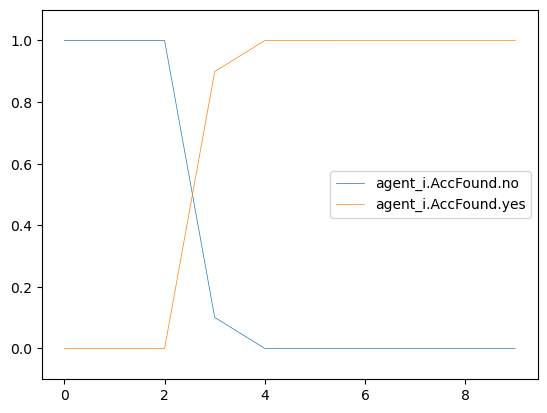

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action  agent_i.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000   DecoyAccount  ManipulateData   
2             0.933372              0.066629            Nop    EnumAccounts   
3             0.211657              0.788343            Nop      PrivEscAcc   
4             0.029653              0.970347            Nop       FileRecon   
5             0.027054              0.972946            Nop       FileRecon   
6             0.001163              0.998837            Nop            Exit   
7             0.004745              0.995255            Nop             Nop   
8             0.004745              0.995255            Nop             Nop   
9             0.004745              0.995255            Nop             Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                       file_write                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

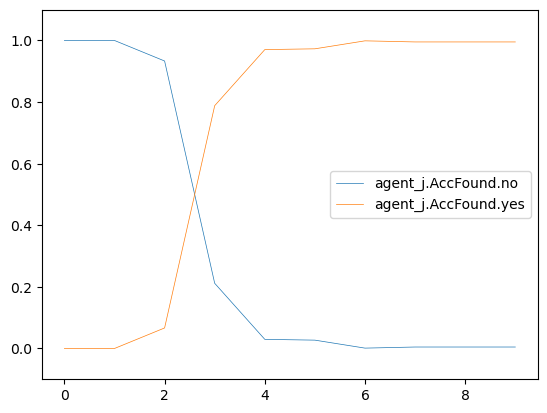

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0       FileRecon   
1                     0.0                     1.0  ManipulateData   
2                     0.0                     1.0    EnumAccounts   
3                     0.0                     1.0      PrivEscAcc   
4                     1.0                     0.0       FileRecon   
5                     1.0                     0.0       FileRecon   
6                     1.0                     0.0            Exit   
7                     1.0                     0.0             Nop   
8                     1.0                     0.0             Nop   
9                     1.0                     0.0             Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

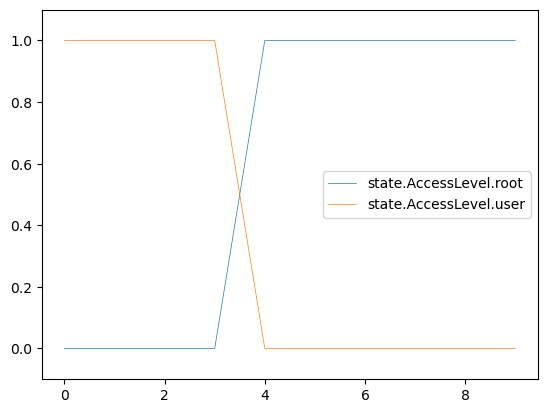

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999860                  0.000140       FileRecon   
5                  0.999827                  0.000173       FileRecon   
6                  0.999808                  0.000192            Exit   
7                  0.999808                  0.000192             Nop   
8                  0.999808                  0.000192             Nop   
9                  0.999808                  0.000192             Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           success                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           failure                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

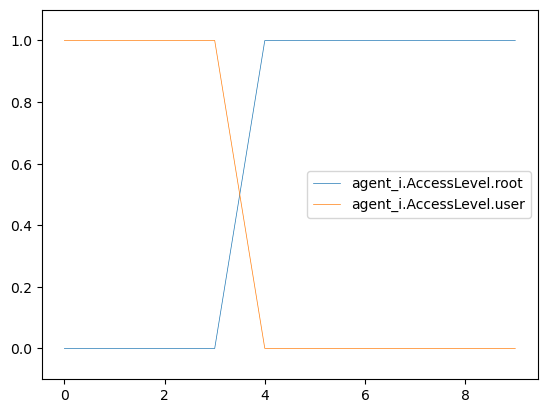

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.000673                  0.999328            Nop   
4                  0.969133                  0.030866            Nop   
5                  0.972933                  0.027067            Nop   
6                  0.998836                  0.001164            Nop   
7                  0.995253                  0.004747            Nop   
8                  0.995253                  0.004747            Nop   
9                  0.995253                  0.004747            Nop   

   agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0       FileRecon                        file_enum                          no  
1  ManipulateData                       file_write                         yes  
2    EnumAccounts                        file_enum                         yes  
3      PrivEscAcc                         su_login                         yes  
4       FileRecon                        file_enum                         yes  
5       FileRecon                        file_enum                         yes  
6            Exit                             none                         yes  
7             Nop                             none                         yes  
8             Nop                       file_write                         yes  
9             Nop                             none                         yes

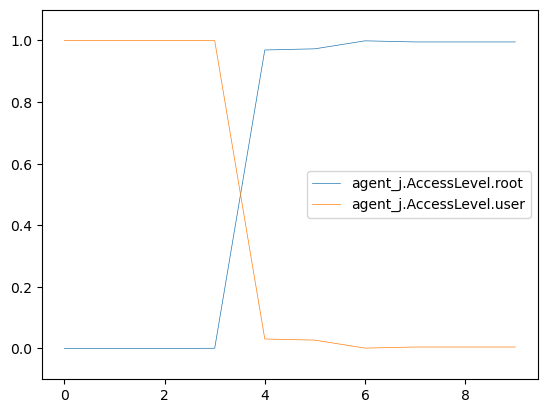

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.578652                        0.421348   
3                         0.500024                        0.499976   
4                         0.497628                        0.502372   
5                         0.497577                        0.502423   
6                         0.497577                        0.502423   
7                         0.497577                        0.502423   
8                         0.497577                        0.502423   
9                         0.497577                        0.502423   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

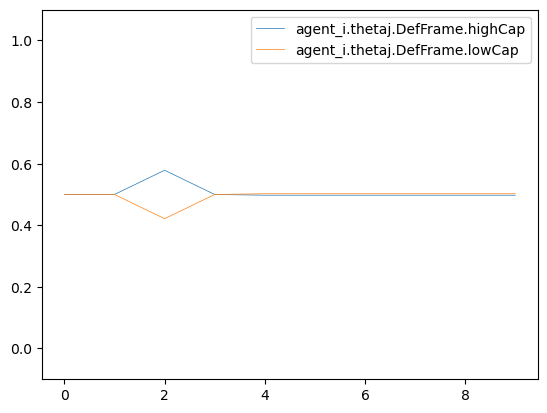

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                         su_login   
3                               1.0                        file_enum   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                       file_write   
7                               1.0                             none   
8                               1.0                             none   
9                               1.0                       file_write   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

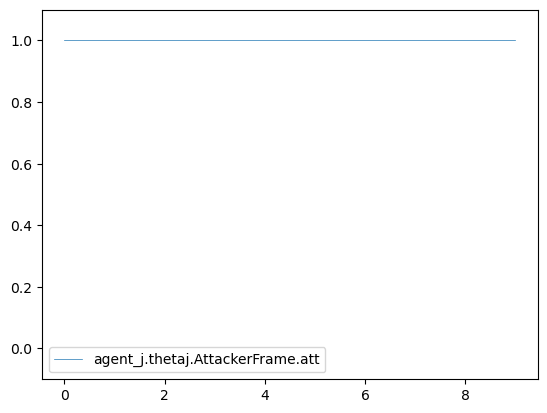

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0           Exit            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

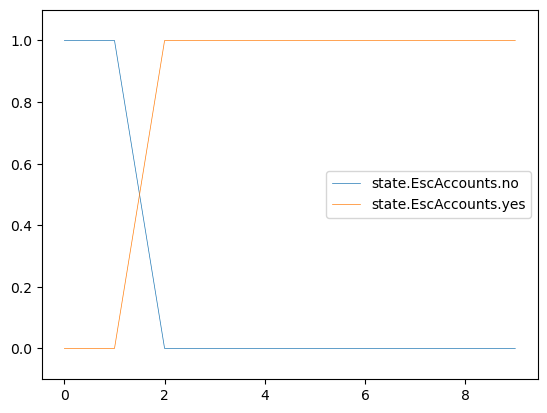

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.075742                 0.924258     PrivEscAcc   
3                0.000105                 0.999895      FileRecon   
4                0.000137                 0.999863      FileRecon   
5                0.000153                 0.999847           Exit   
6                0.000153                 0.999847            Nop   
7                0.000153                 0.999847            Nop   
8                0.000153                 0.999847            Nop   
9                0.000153                 0.999847            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

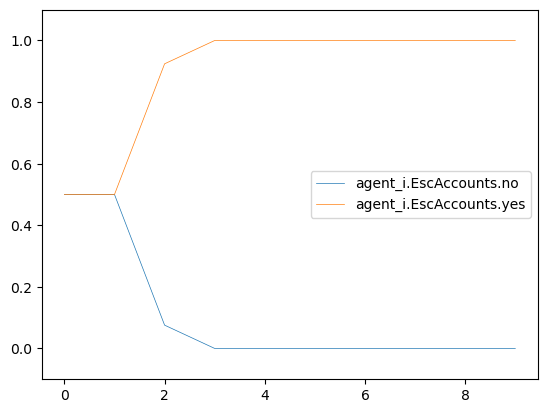

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                        file_enum                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                       file_write                         yes

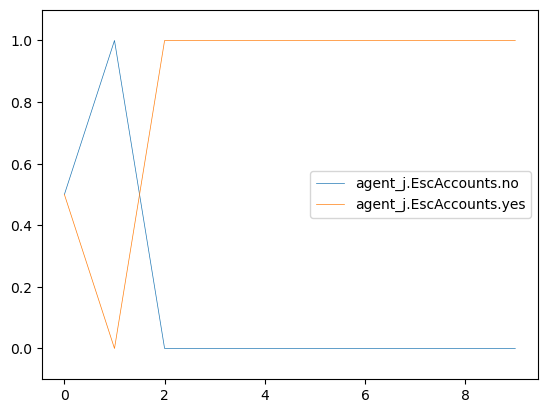

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0           Exit            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

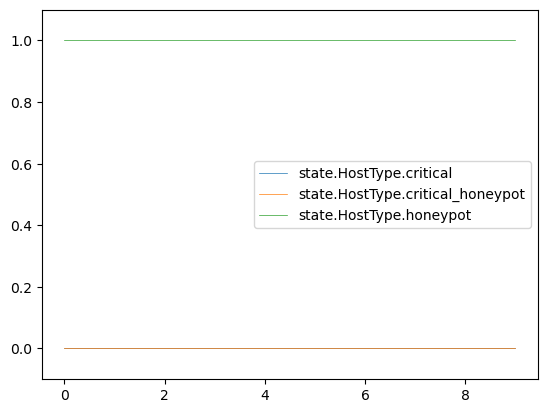

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0           Exit            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

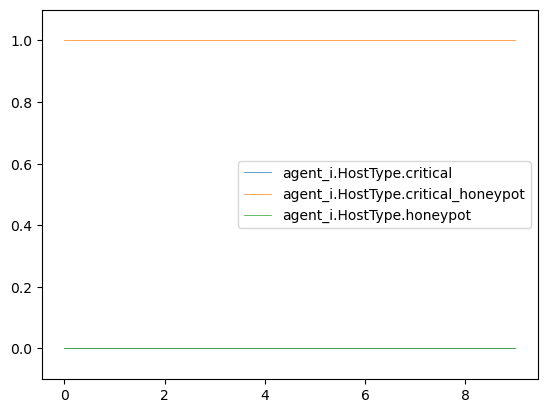

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop           Exit   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                       file_write                         yes

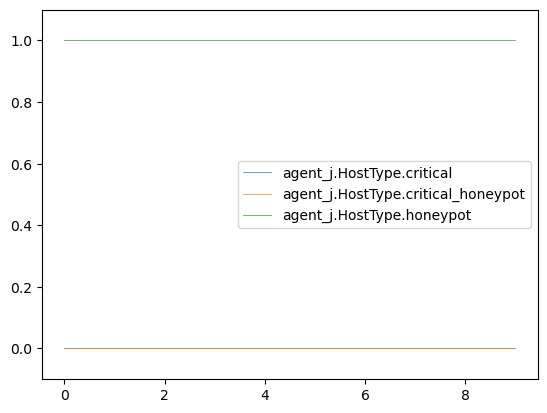

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

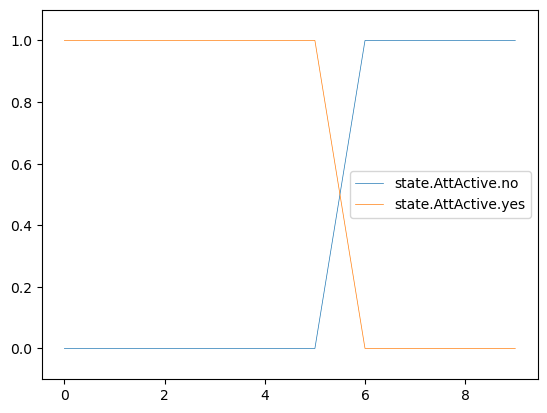

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0           Exit            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

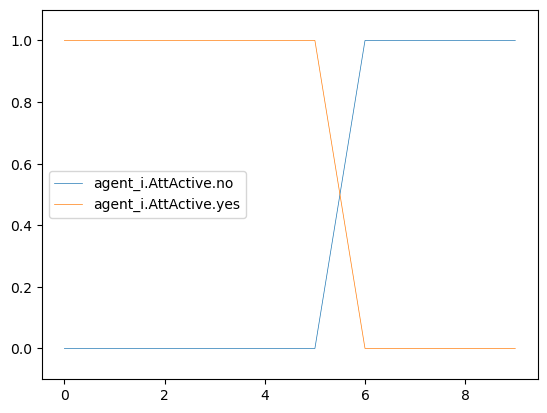

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop     PrivEscAcc   
3              0.000002           9.999984e-01            Nop      FileRecon   
4              0.000034           9.999664e-01            Nop      FileRecon   
5              0.000974           9.990267e-01            Nop           Exit   
6              0.216802           7.831981e-01            Nop            Nop   
7              0.784794           2.152061e-01            Nop            Nop   
8              1.000000           3.458818e-12            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                       file_write                         yes

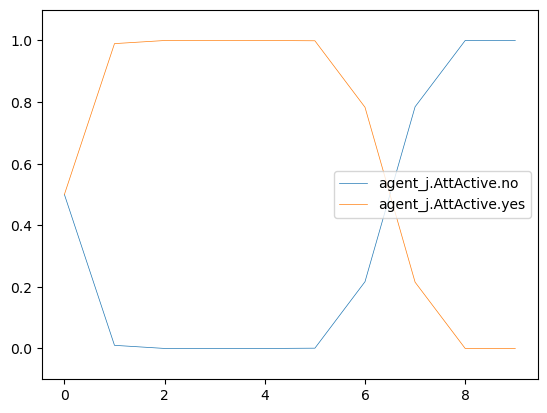

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0           Exit            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

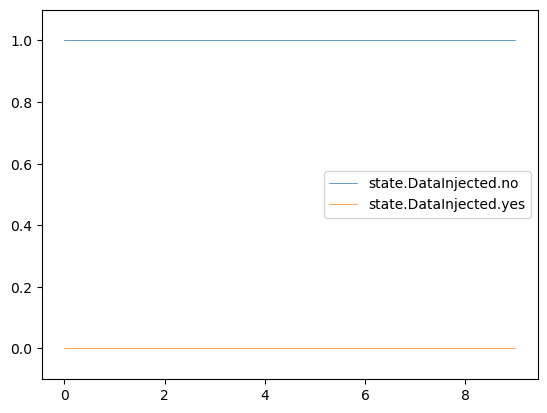

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0           Exit   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

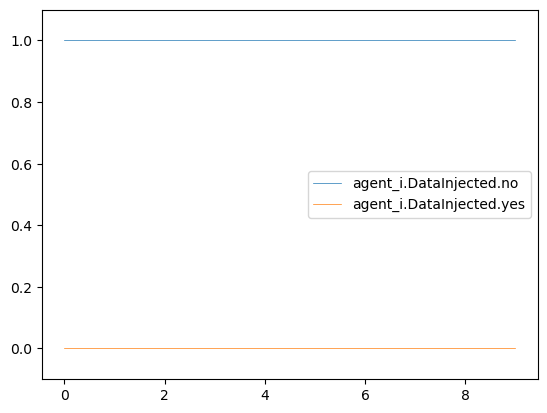

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.972271                  0.027729            Nop   
6                 0.272846                  0.727154            Nop   
7                 0.189301                  0.810699            Nop   
8                 0.189301                  0.810699            Nop   
9                 0.189301                  0.810699            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                        file_enum                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                       file_write                         yes

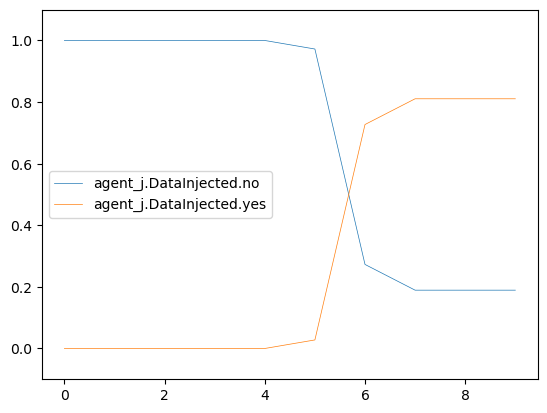

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0           Exit            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

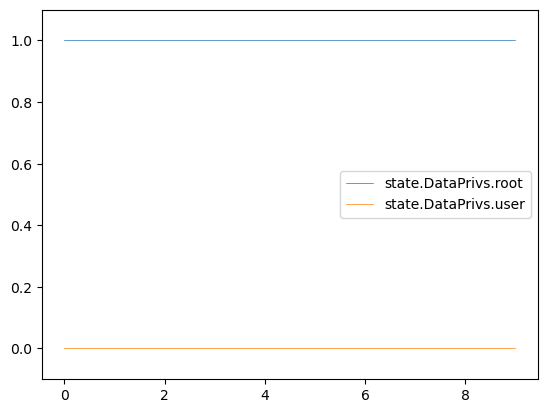

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892     PrivEscAcc   
3                0.608108                0.391892      FileRecon   
4                0.546959                0.453041      FileRecon   
5                0.512762                0.487238           Exit   
6                0.512762                0.487238            Nop   
7                0.512762                0.487238            Nop   
8                0.512762                0.487238            Nop   
9                0.512762                0.487238            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

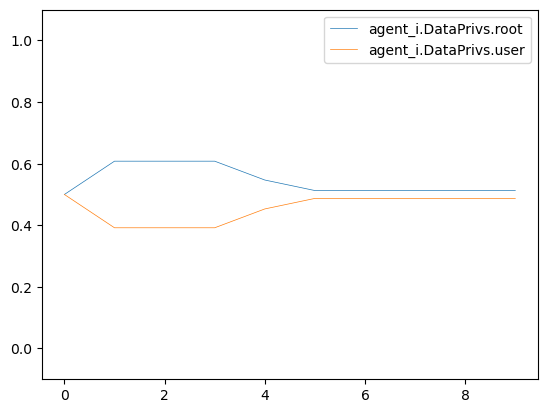

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                        file_enum                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                       file_write                         yes

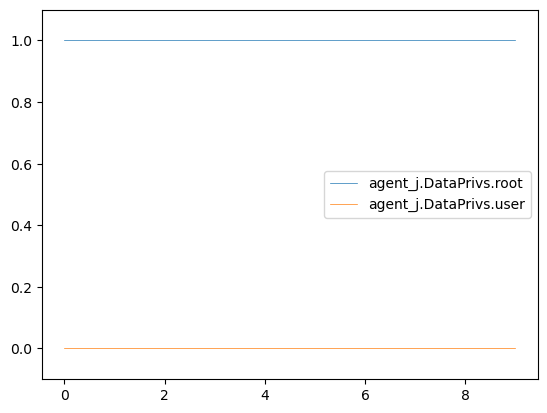

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0     PrivEscAcc            Nop
3                   1.0                    0.0      FileRecon            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0           Exit            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

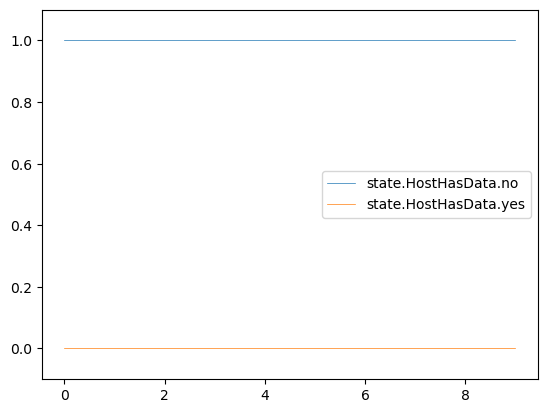

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892     PrivEscAcc   
3                0.608108                 0.391892      FileRecon   
4                0.848667                 0.151333      FileRecon   
5                0.960427                 0.039573           Exit   
6                0.960427                 0.039573            Nop   
7                0.960427                 0.039573            Nop   
8                0.960427                 0.039573            Nop   
9                0.960427                 0.039573            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

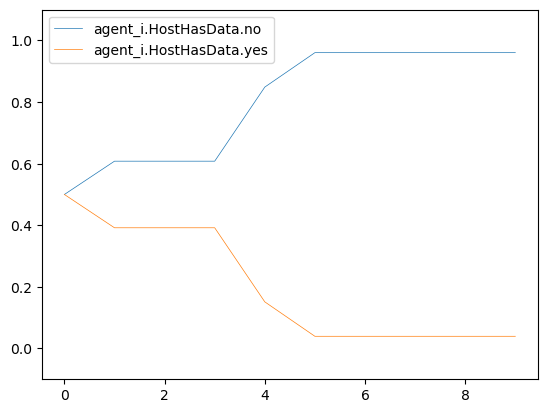

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                        file_enum                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                       file_write                         yes

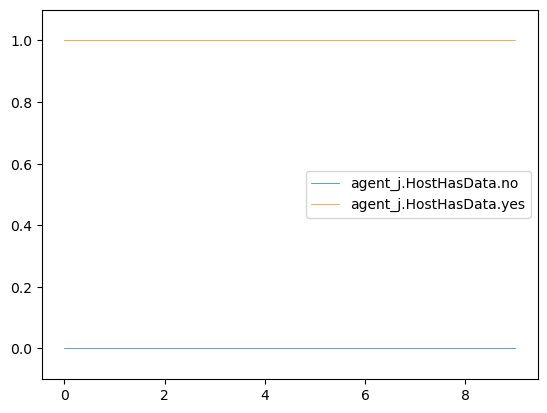

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

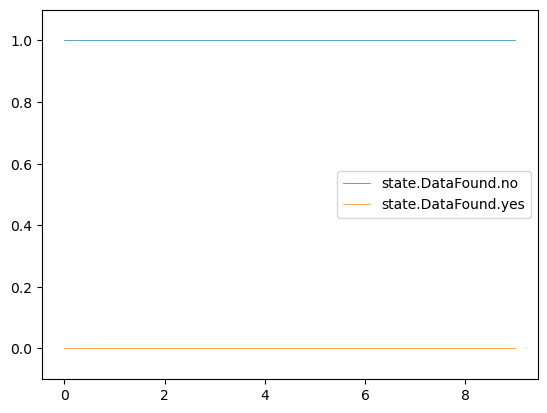

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027     PrivEscAcc            Nop   
3              0.972973               0.027027      FileRecon            Nop   
4              0.950552               0.049448      FileRecon            Nop   
5              0.983539               0.016461           Exit            Nop   
6              0.983539               0.016461            Nop            Nop   
7              0.983539               0.016461            Nop            Nop   
8              0.983539               0.016461            Nop            Nop   
9              0.983539               0.016461            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

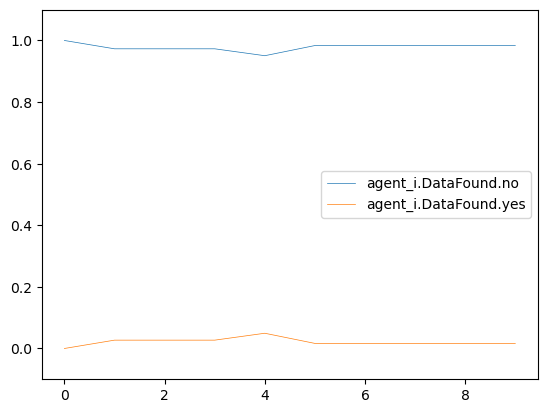

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop      FileRecon   
4              0.221654               0.778346            Nop      FileRecon   
5              0.136294               0.863706            Nop           Exit   
6              0.139762               0.860238            Nop            Nop   
7              0.120312               0.879688            Nop            Nop   
8              0.120312               0.879688            Nop            Nop   
9              0.120312               0.879688            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                       file_write                         yes

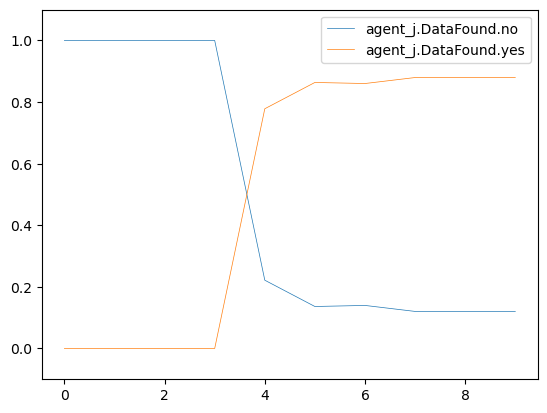

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                0.0                 1.0     PrivEscAcc            Nop
3                0.0                 1.0      FileRecon            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0           Exit            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

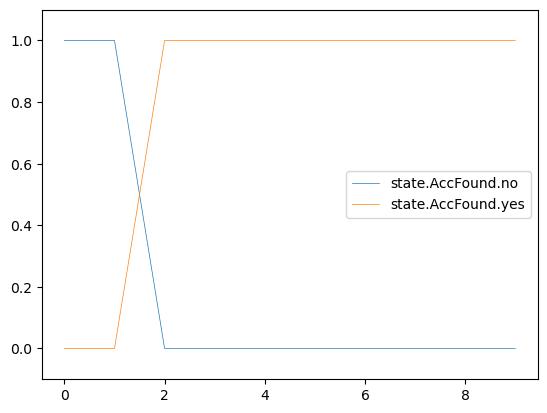

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.100722              0.899278     PrivEscAcc            Nop   
3             0.000133              0.999867      FileRecon            Nop   
4             0.000173              0.999826      FileRecon            Nop   
5             0.000193              0.999807           Exit            Nop   
6             0.000193              0.999807            Nop            Nop   
7             0.000193              0.999807            Nop            Nop   
8             0.000193              0.999807            Nop            Nop   
9             0.000193              0.999807            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                   user_files                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

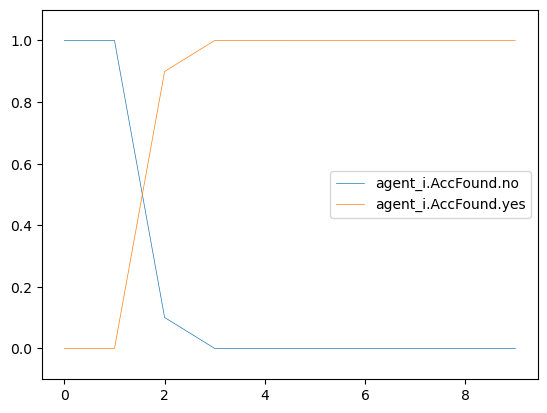

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop     PrivEscAcc   
3             0.029432              0.970568            Nop      FileRecon   
4             0.027055              0.972945            Nop      FileRecon   
5             0.001163              0.998837            Nop           Exit   
6             0.001090              0.998910            Nop            Nop   
7             0.000907              0.999093            Nop            Nop   
8             0.000907              0.999093            Nop            Nop   
9             0.000907              0.999093            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                             none                         yes  
9                       file_write                         yes

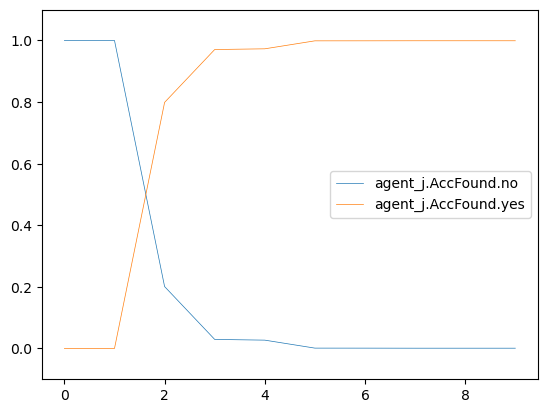

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     1.0                     0.0      FileRecon   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0           Exit   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

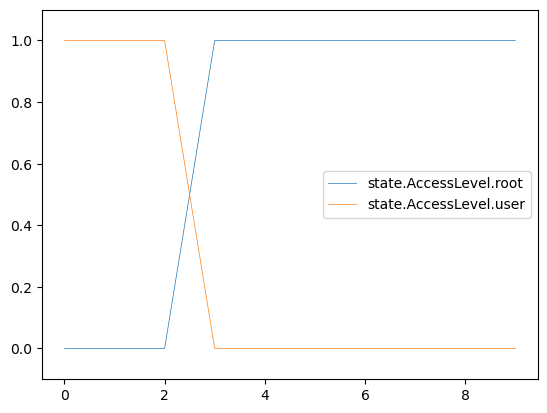

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.999860                  0.000140      FileRecon   
4                  0.999826                  0.000174      FileRecon   
5                  0.999807                  0.000193           Exit   
6                  0.999807                  0.000193            Nop   
7                  0.999807                  0.000193            Nop   
8                  0.999807                  0.000193            Nop   
9                  0.999807                  0.000193            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

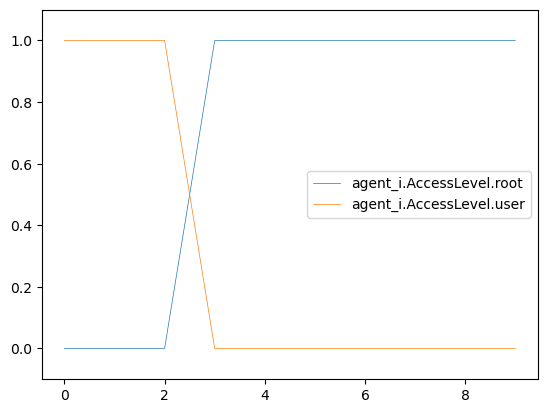

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.969444                  0.030556            Nop   
4                  0.972933                  0.027067            Nop   
5                  0.998836                  0.001164            Nop   
6                  0.998909                  0.001091            Nop   
7                  0.999093                  0.000907            Nop   
8                  0.999092                  0.000907            Nop   
9                  0.999092                  0.000907            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                        file_enum                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                       file_write                         yes

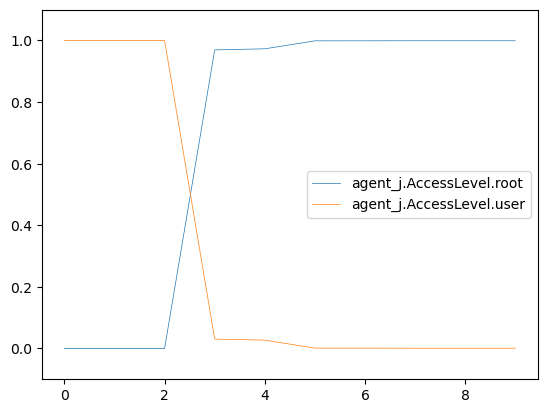

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.421850                        0.578150   
3                         0.462605                        0.537395   
4                         0.497608                        0.502392   
5                         0.497568                        0.502432   
6                         0.497559                        0.502441   
7                         0.497559                        0.502441   
8                         0.497559                        0.502441   
9                         0.497559                        0.502441   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

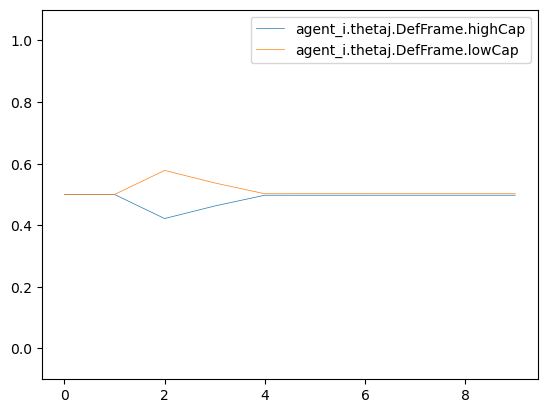

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                        file_enum   
3                               1.0                         su_login   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                             none   
7                               1.0                       file_write   
8                               1.0                             none   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

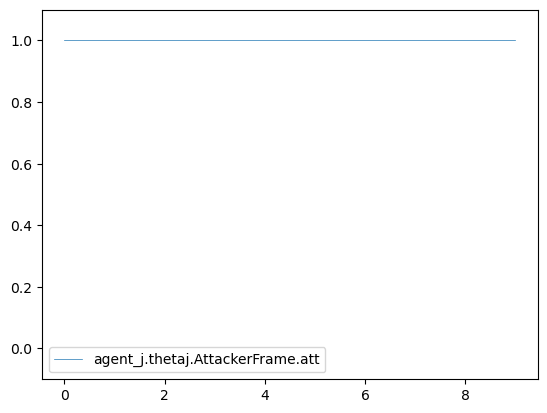

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

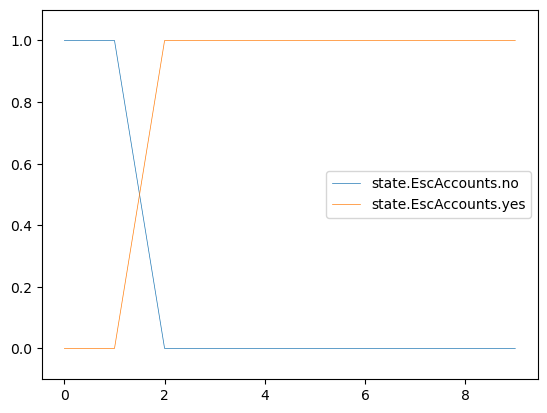

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.677333                 0.322667   EnumAccounts   
3                0.247398                 0.752602     PrivEscAcc   
4                0.000339                 0.999661      FileRecon   
5                0.000441                 0.999559      FileRecon   
6                0.000491                 0.999510           Exit   
7                0.000491                 0.999510            Nop   
8                0.000491                 0.999510            Nop   
9                0.000491                 0.999510            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

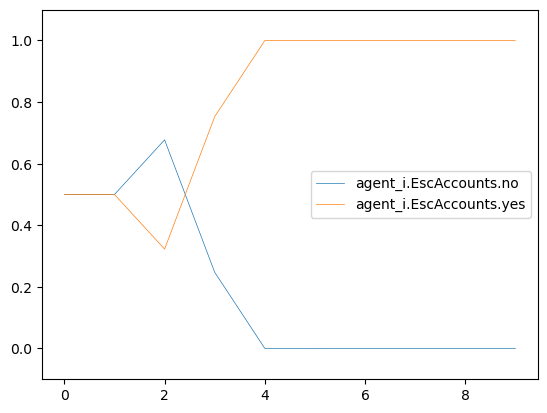

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

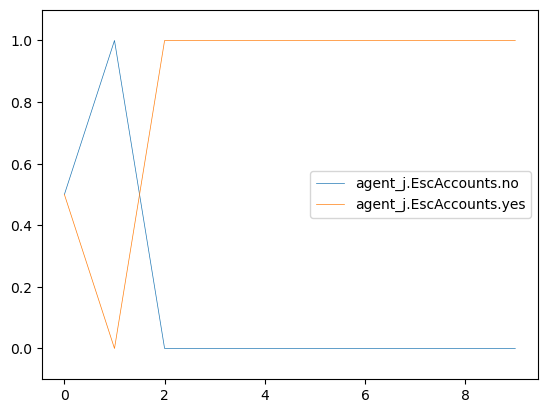

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0   EnumAccounts            Nop  
3                      1.0     PrivEscAcc            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0      FileRecon            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

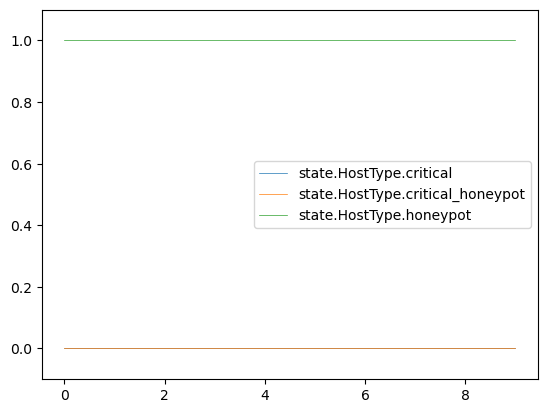

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts            Nop   
3                        0.0     PrivEscAcc            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0      FileRecon            Nop   
6                        0.0           Exit            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

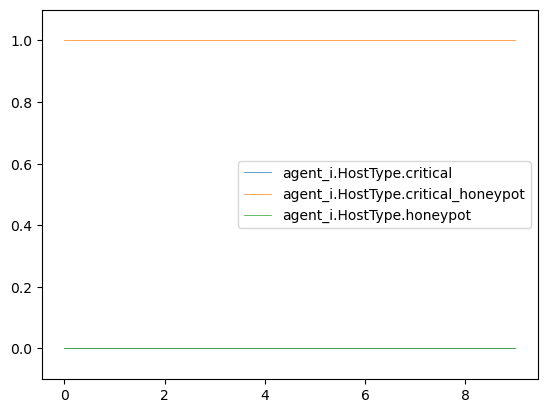

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop      FileRecon   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                             none                         yes  
9                             none                         yes

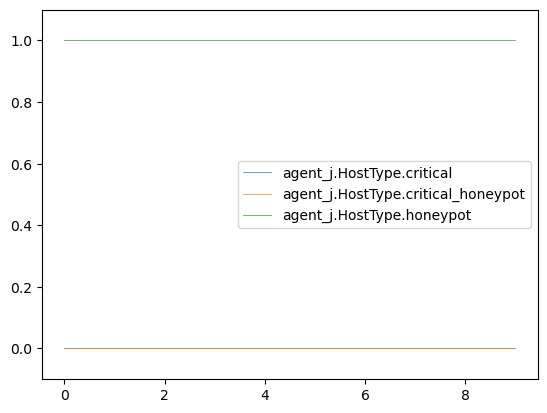

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0   EnumAccounts            Nop
3                 0.0                  1.0     PrivEscAcc            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0      FileRecon            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

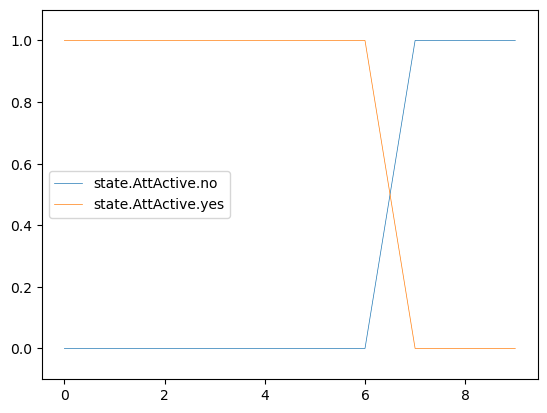

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0      FileRecon            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

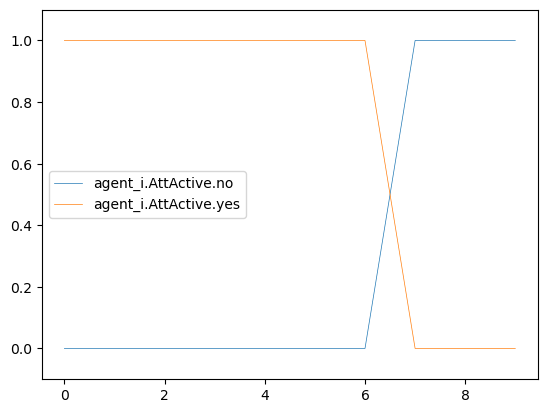

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000               0.500000            Nop      FileRecon   
1              0.010204               0.989796   DecoyAccount   EnumAccounts   
2              0.000118               0.999882            Nop   EnumAccounts   
3              0.000005               0.999996            Nop     PrivEscAcc   
4              0.668446               0.331554            Nop      FileRecon   
5              0.030931               0.969069            Nop      FileRecon   
6              0.002483               0.997517            Nop           Exit   
7              0.959959               0.040041            Nop            Nop   
8              0.999850               0.000150            Nop            Nop   
9              1.000000               0.000000            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                             none                         yes  
9                             none                         yes

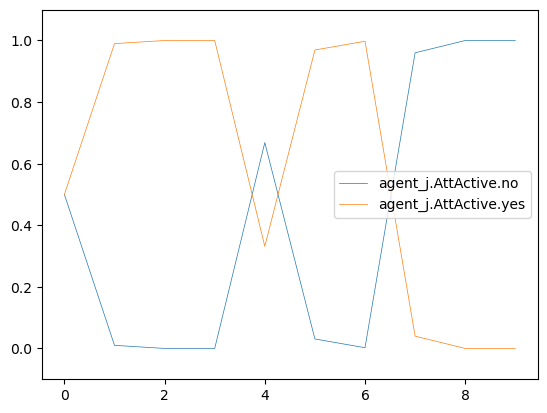

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0   EnumAccounts            Nop
3                    1.0                     0.0     PrivEscAcc            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0      FileRecon            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

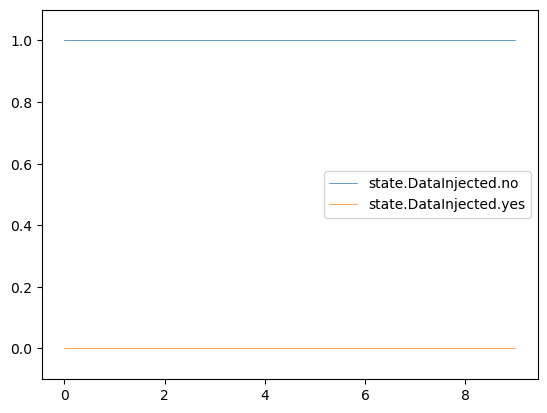

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

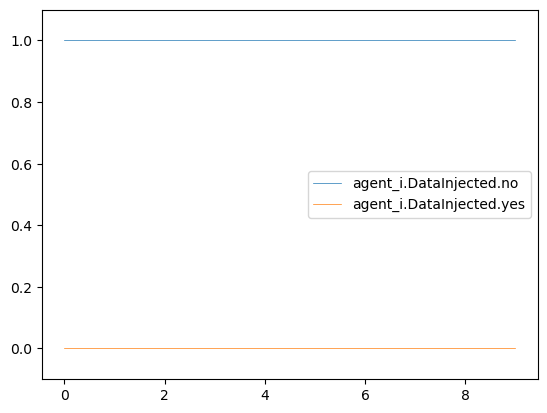

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.999365                  0.000635            Nop   
6                 0.971587                  0.028413            Nop   
7                 0.844811                  0.155189            Nop   
8                 0.844684                  0.155316            Nop   
9                 0.844684                  0.155316            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

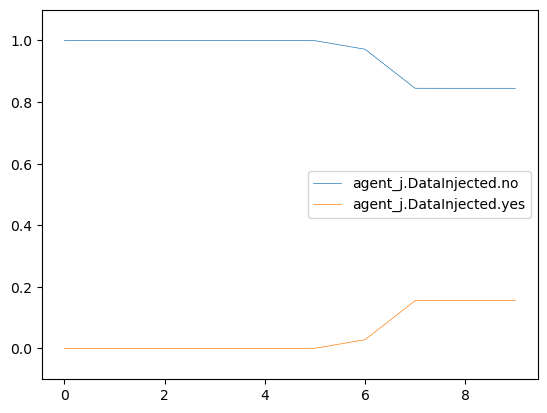

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0   EnumAccounts            Nop
3                   1.0                   0.0     PrivEscAcc            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0      FileRecon            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

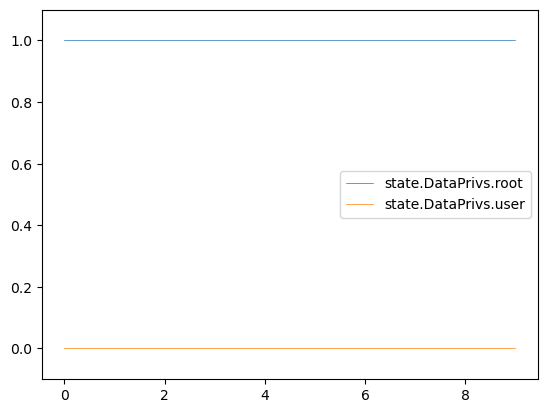

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892   EnumAccounts   
3                0.608108                0.391892     PrivEscAcc   
4                0.608108                0.391892      FileRecon   
5                0.546989                0.453011      FileRecon   
6                0.512811                0.487190           Exit   
7                0.512811                0.487190            Nop   
8                0.512811                0.487190            Nop   
9                0.512811                0.487190            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

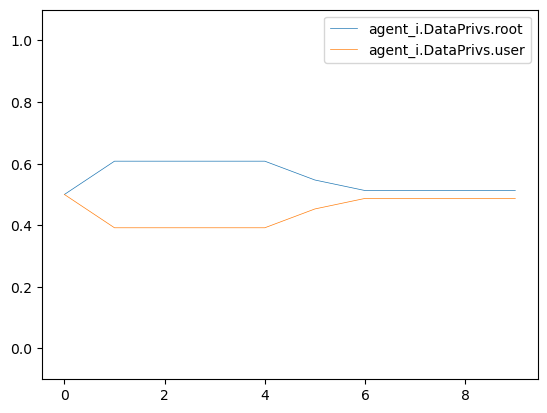

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

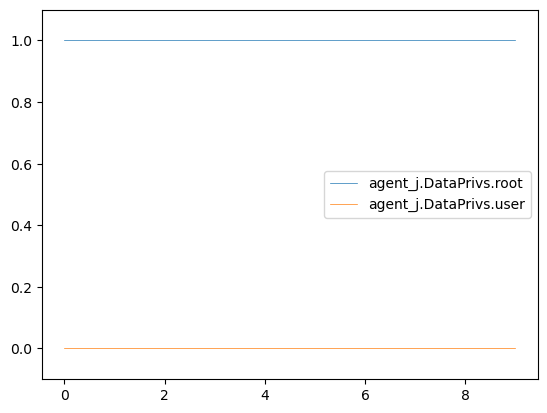

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0   EnumAccounts            Nop
3                   1.0                    0.0     PrivEscAcc            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0      FileRecon            Nop
6                   1.0                    0.0           Exit            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

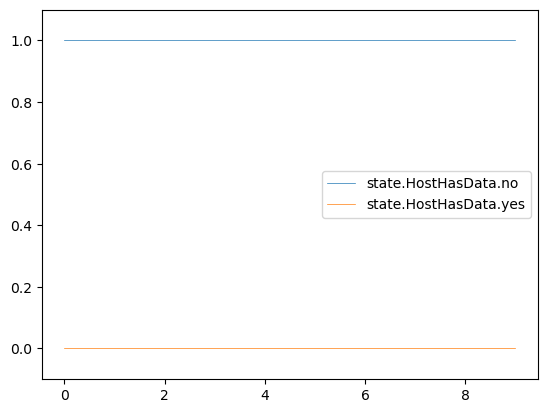

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892   EnumAccounts   
3                0.608108                 0.391892     PrivEscAcc   
4                0.608108                 0.391892      FileRecon   
5                0.848609                 0.151391      FileRecon   
6                0.960331                 0.039669           Exit   
7                0.960331                 0.039669            Nop   
8                0.960331                 0.039669            Nop   
9                0.960331                 0.039669            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

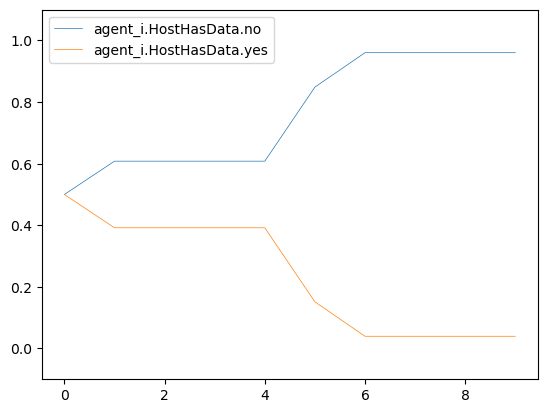

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

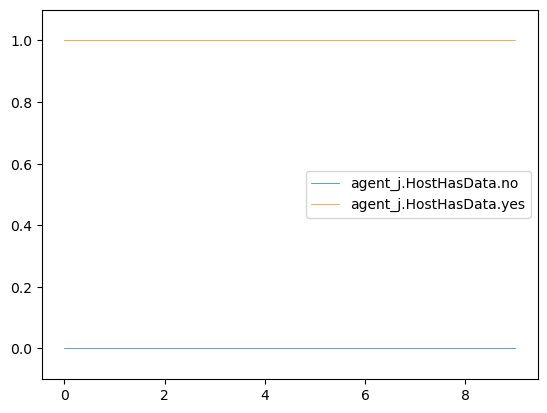

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0   EnumAccounts            Nop
3                 1.0                  0.0     PrivEscAcc            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0      FileRecon            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

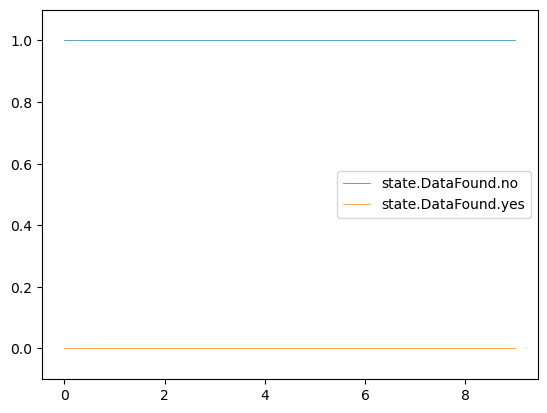

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027   EnumAccounts            Nop   
3              0.972973               0.027027     PrivEscAcc            Nop   
4              0.972973               0.027027      FileRecon            Nop   
5              0.950564               0.049436      FileRecon            Nop   
6              0.983544               0.016457           Exit            Nop   
7              0.983544               0.016457            Nop            Nop   
8              0.983544               0.016457            Nop            Nop   
9              0.983544               0.016457            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

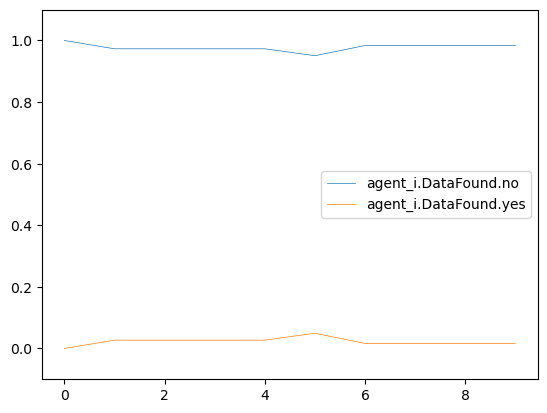

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop   EnumAccounts   
3              1.000000               0.000000            Nop     PrivEscAcc   
4              0.983037               0.016963            Nop      FileRecon   
5              0.243730               0.756270            Nop      FileRecon   
6              0.137410               0.862590            Nop           Exit   
7              0.503868               0.496132            Nop            Nop   
8              0.503811               0.496189            Nop            Nop   
9              0.503811               0.496189            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                             none                         yes  
9                             none                         yes

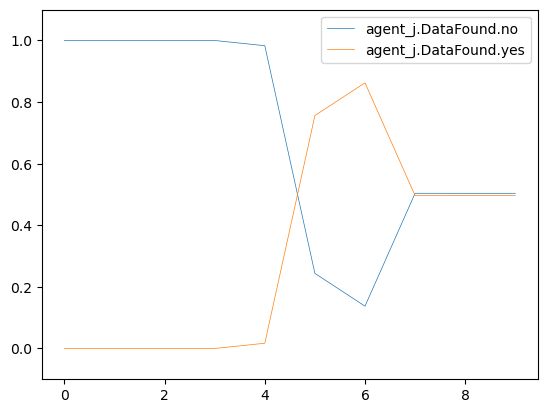

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                1.0                 0.0   EnumAccounts            Nop
3                0.0                 1.0     PrivEscAcc            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0      FileRecon            Nop
6                0.0                 1.0           Exit            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

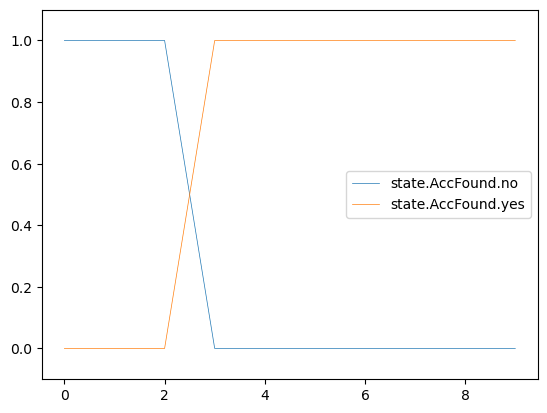

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.900718              0.099282   EnumAccounts            Nop   
3             0.260602              0.739398     PrivEscAcc            Nop   
4             0.000357              0.999643      FileRecon            Nop   
5             0.000464              0.999536      FileRecon            Nop   
6             0.000516              0.999484           Exit            Nop   
7             0.000516              0.999484            Nop            Nop   
8             0.000516              0.999484            Nop            Nop   
9             0.000516              0.999484            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

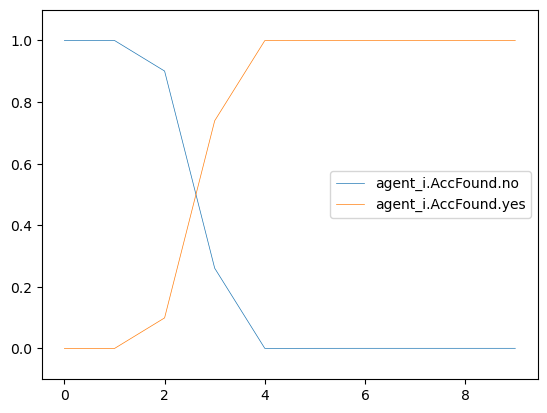

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop   EnumAccounts   
3             0.671330              0.328670            Nop     PrivEscAcc   
4             0.521709              0.478291            Nop      FileRecon   
5             0.047000              0.953000            Nop      FileRecon   
6             0.002054              0.997946            Nop           Exit   
7             0.008348              0.991652            Nop            Nop   
8             0.008347              0.991653            Nop            Nop   
9             0.008347              0.991653            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                       file_write                         yes  
8                             none                         yes  
9                             none                         yes

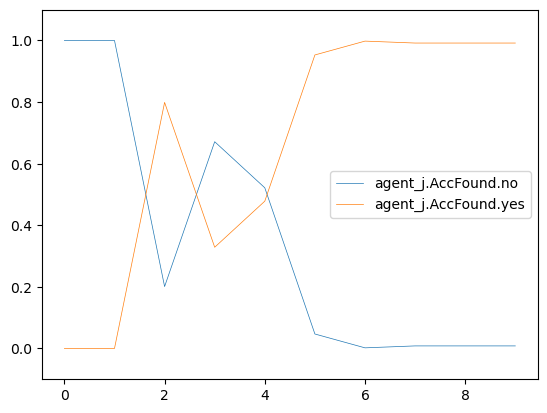

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0   EnumAccounts   
3                     0.0                     1.0     PrivEscAcc   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0      FileRecon   
6                     1.0                     0.0           Exit   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

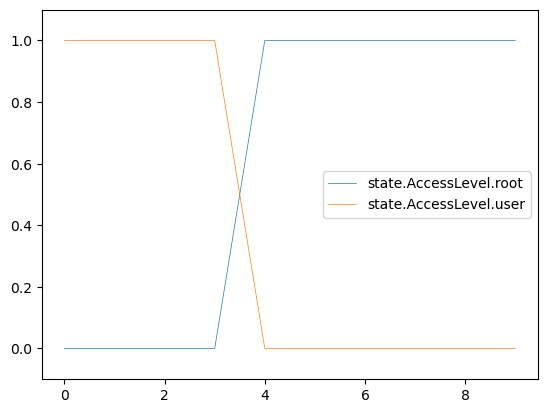

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000   EnumAccounts   
3                  0.000000                  1.000000     PrivEscAcc   
4                  0.999643                  0.000357      FileRecon   
5                  0.999536                  0.000464      FileRecon   
6                  0.999484                  0.000516           Exit   
7                  0.999484                  0.000516            Nop   
8                  0.999484                  0.000516            Nop   
9                  0.999484                  0.000516            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

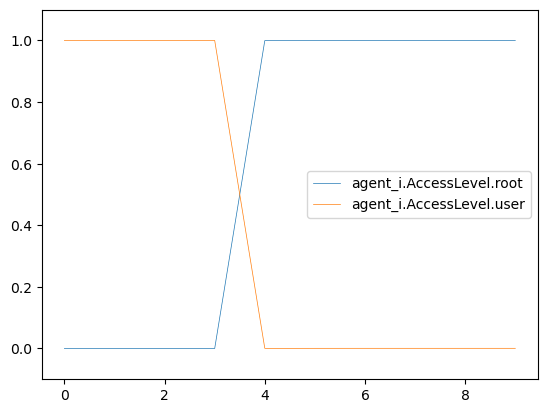

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.027617                  0.972383            Nop   
4                  0.249502                  0.750498            Nop   
5                  0.943488                  0.056512            Nop   
6                  0.997549                  0.002451            Nop   
7                  0.990031                  0.009969            Nop   
8                  0.990032                  0.009968            Nop   
9                  0.990032                  0.009968            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                       file_write                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

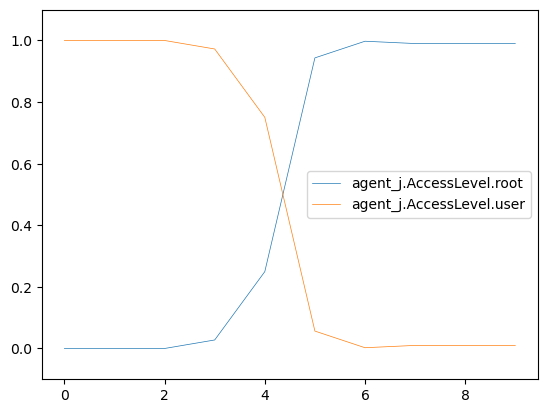

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.578652                        0.421348   
3                         0.500024                        0.499976   
4                         0.497628                        0.502372   
5                         0.497577                        0.502423   
6                         0.497577                        0.502423   
7                         0.497577                        0.502423   
8                         0.497577                        0.502423   
9                         0.497577                        0.502423   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

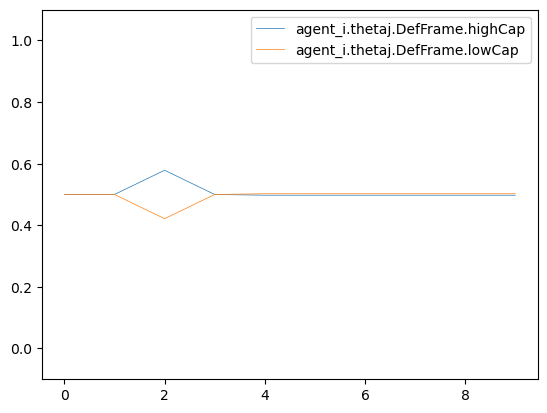

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                         su_login   
3                               1.0                        file_enum   
4                               1.0                        file_enum   
5                               1.0                             none   
6                               1.0                             none   
7                               1.0                             none   
8                               1.0                             none   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

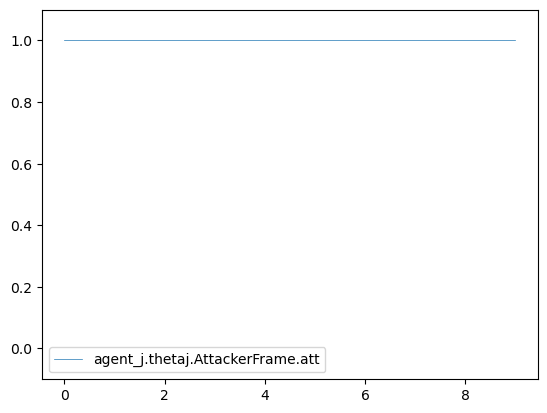

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0           Exit            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

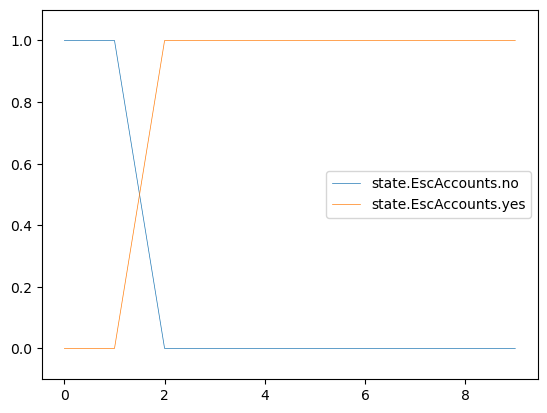

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.075742                 0.924258     PrivEscAcc   
3                0.000105                 0.999895      FileRecon   
4                0.000137                 0.999863      FileRecon   
5                0.000153                 0.999847           Exit   
6                0.000153                 0.999847            Nop   
7                0.000153                 0.999847            Nop   
8                0.000153                 0.999847            Nop   
9                0.000153                 0.999847            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

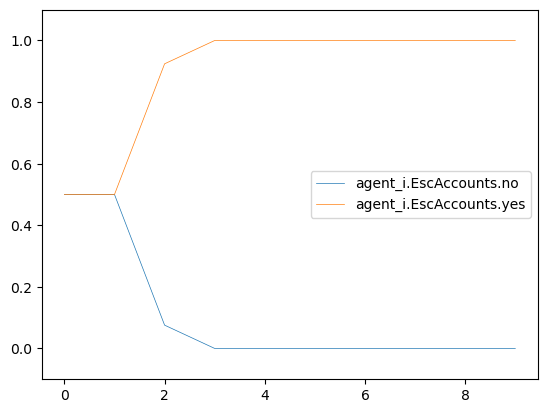

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

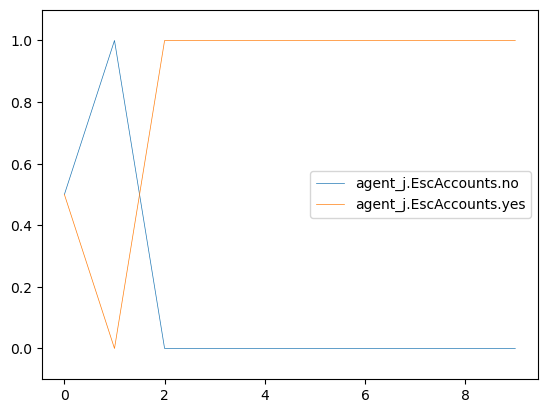

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0           Exit            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

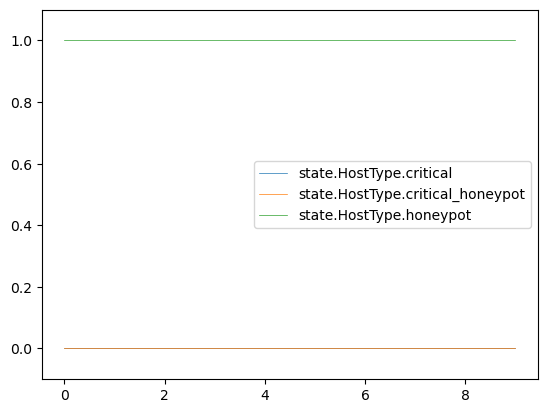

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0           Exit            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

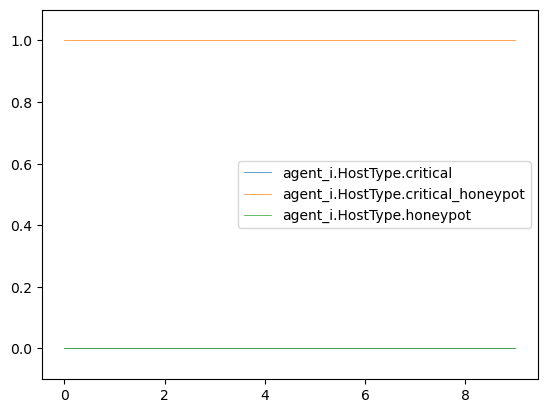

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop           Exit   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

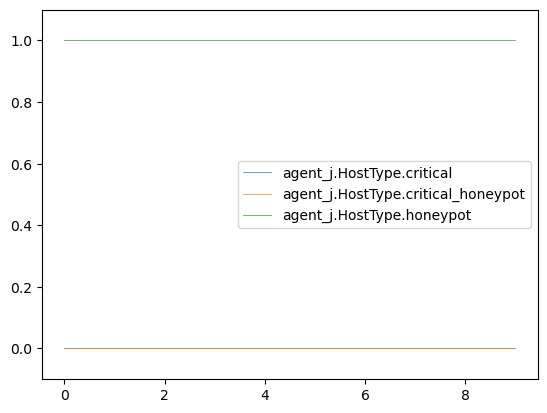

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

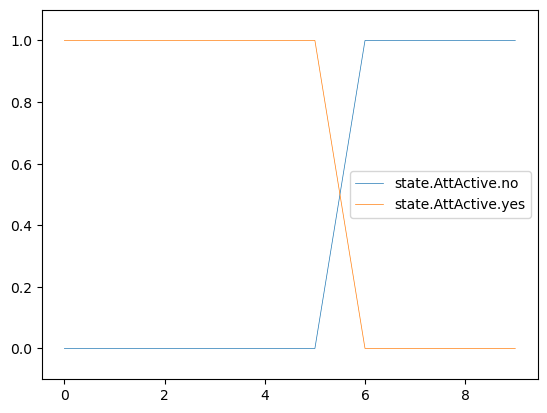

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0           Exit            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

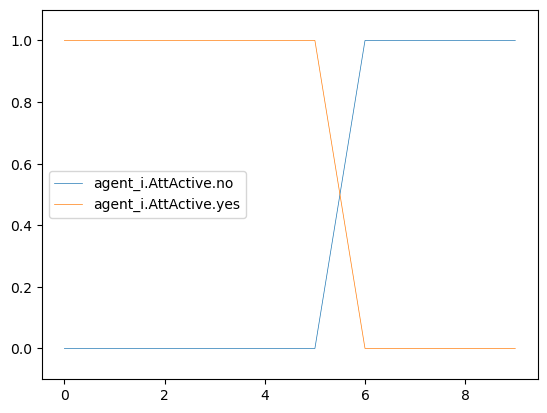

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop     PrivEscAcc   
3              0.000002           9.999984e-01            Nop      FileRecon   
4              0.000034           9.999664e-01            Nop      FileRecon   
5              0.000974           9.990267e-01            Nop           Exit   
6              0.959589           4.041113e-02            Nop            Nop   
7              1.000000           4.013770e-07            Nop            Nop   
8              1.000000           6.069631e-14            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

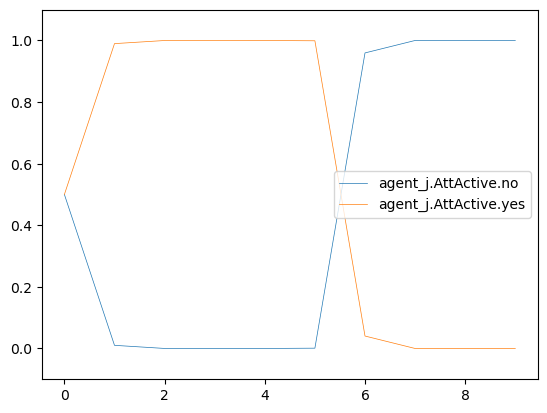

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0           Exit            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

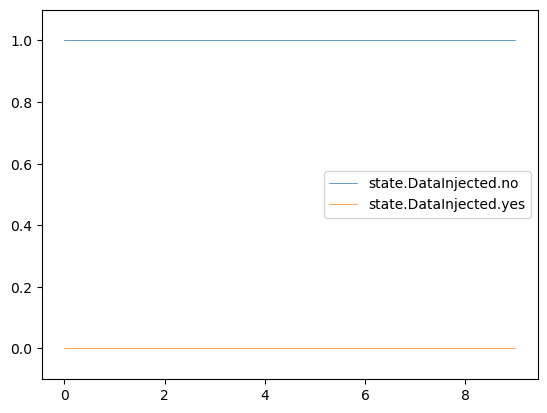

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0           Exit   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

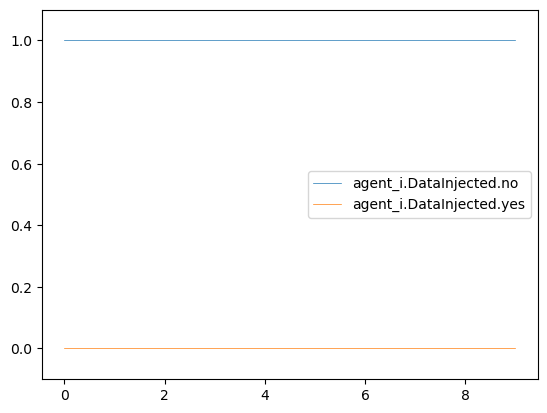

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.972271                  0.027729            Nop   
6                 0.846438                  0.153562            Nop   
7                 0.846435                  0.153565            Nop   
8                 0.846435                  0.153565            Nop   
9                 0.846435                  0.153565            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

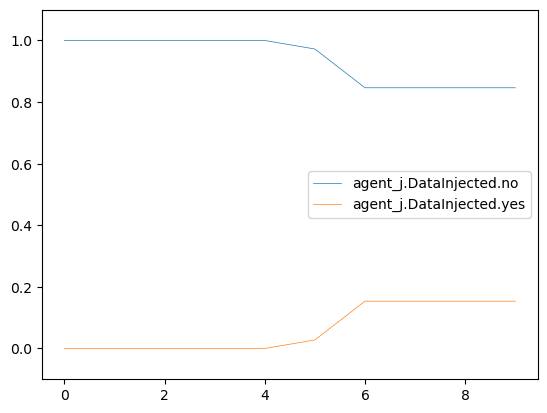

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0           Exit            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

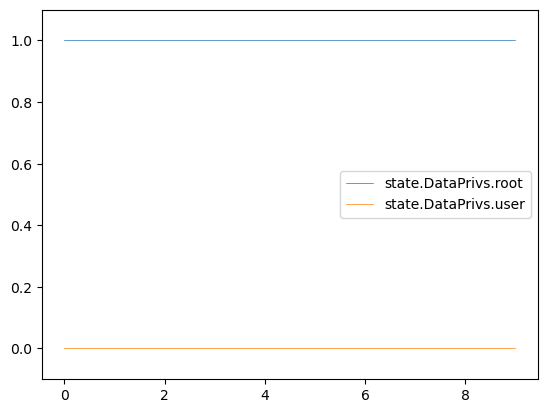

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892     PrivEscAcc   
3                0.608108                0.391892      FileRecon   
4                0.546959                0.453041      FileRecon   
5                0.512762                0.487238           Exit   
6                0.512762                0.487238            Nop   
7                0.512762                0.487238            Nop   
8                0.512762                0.487238            Nop   
9                0.512762                0.487238            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

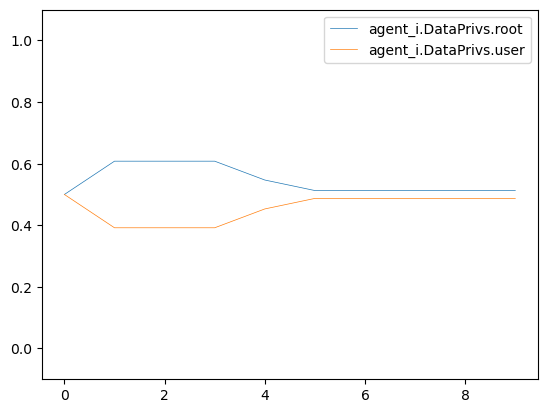

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

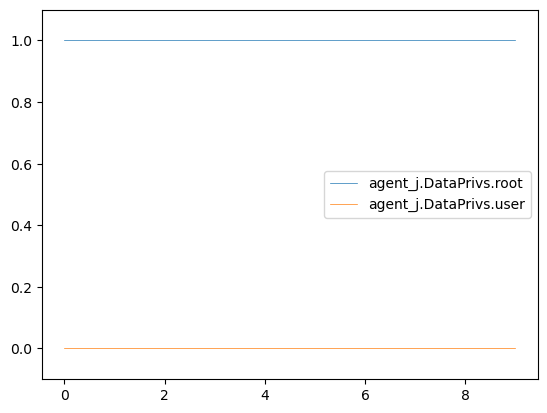

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0     PrivEscAcc            Nop
3                   1.0                    0.0      FileRecon            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0           Exit            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

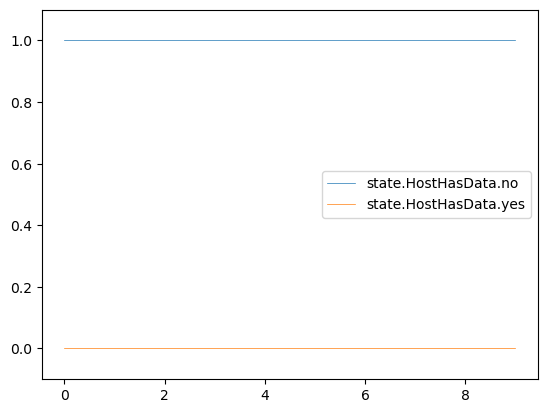

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892     PrivEscAcc   
3                0.608108                 0.391892      FileRecon   
4                0.848667                 0.151333      FileRecon   
5                0.960427                 0.039573           Exit   
6                0.960427                 0.039573            Nop   
7                0.960427                 0.039573            Nop   
8                0.960427                 0.039573            Nop   
9                0.960427                 0.039573            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

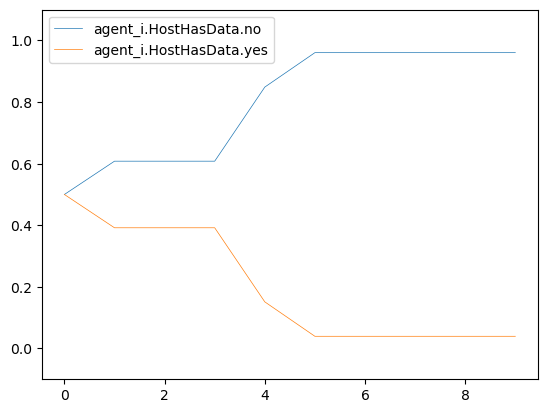

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

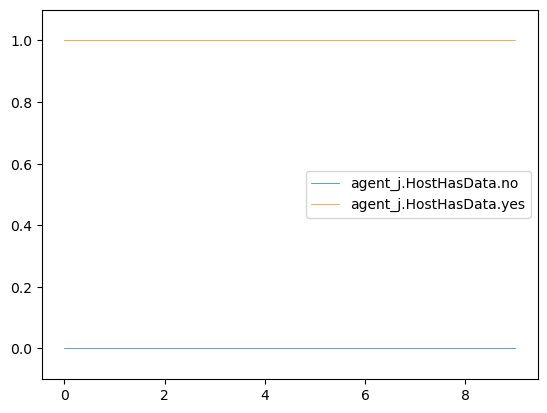

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

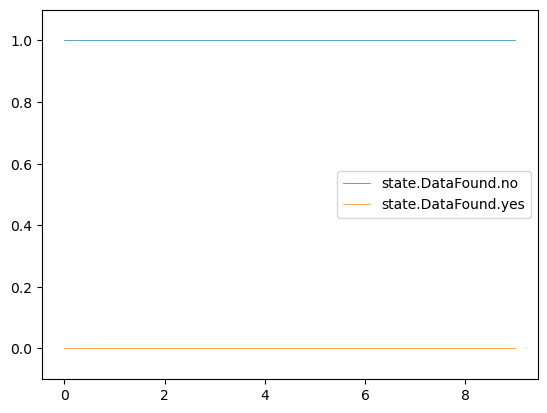

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027     PrivEscAcc            Nop   
3              0.972973               0.027027      FileRecon            Nop   
4              0.950552               0.049448      FileRecon            Nop   
5              0.983539               0.016461           Exit            Nop   
6              0.983539               0.016461            Nop            Nop   
7              0.983539               0.016461            Nop            Nop   
8              0.983539               0.016461            Nop            Nop   
9              0.983539               0.016461            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

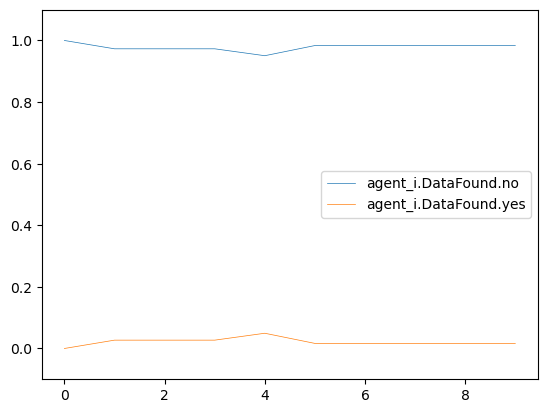

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop      FileRecon   
4              0.221654               0.778346            Nop      FileRecon   
5              0.136294               0.863706            Nop           Exit   
6              0.502670               0.497330            Nop            Nop   
7              0.502685               0.497315            Nop            Nop   
8              0.502685               0.497315            Nop            Nop   
9              0.502685               0.497315            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

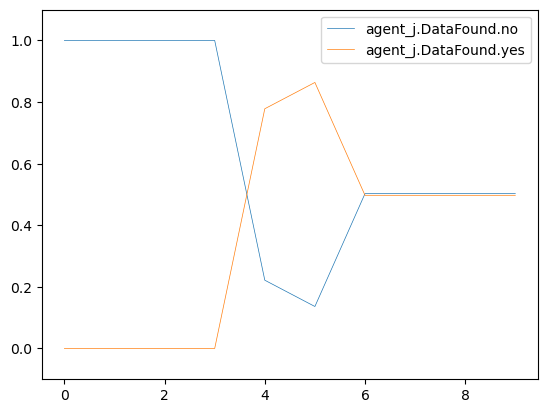

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                0.0                 1.0     PrivEscAcc            Nop
3                0.0                 1.0      FileRecon            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0           Exit            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

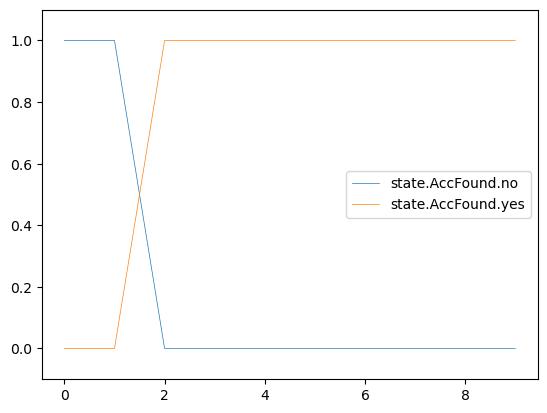

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.100722              0.899278     PrivEscAcc            Nop   
3             0.000133              0.999867      FileRecon            Nop   
4             0.000173              0.999826      FileRecon            Nop   
5             0.000193              0.999807           Exit            Nop   
6             0.000193              0.999807            Nop            Nop   
7             0.000193              0.999807            Nop            Nop   
8             0.000193              0.999807            Nop            Nop   
9             0.000193              0.999807            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           failure   
7                         none                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

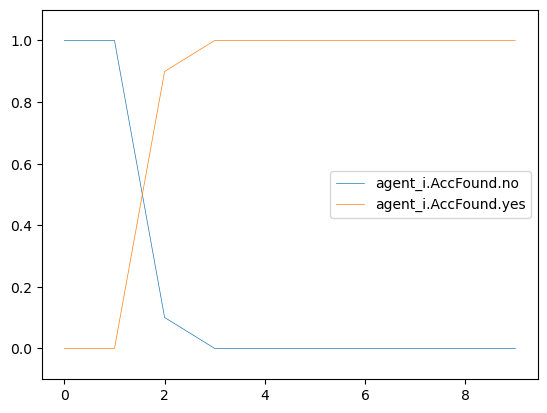

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop     PrivEscAcc   
3             0.029432              0.970568            Nop      FileRecon   
4             0.027055              0.972945            Nop      FileRecon   
5             0.001163              0.998837            Nop           Exit   
6             0.004745              0.995255            Nop            Nop   
7             0.004745              0.995255            Nop            Nop   
8             0.004745              0.995255            Nop            Nop   
9             0.004745              0.995255            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

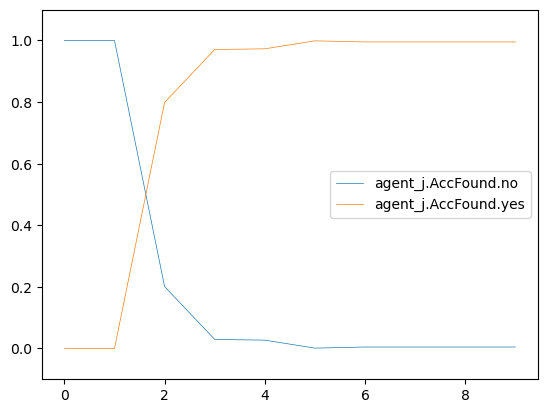

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     1.0                     0.0      FileRecon   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0           Exit   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

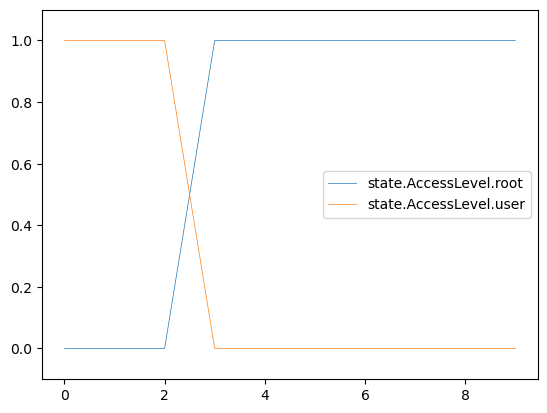

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.999860                  0.000140      FileRecon   
4                  0.999826                  0.000174      FileRecon   
5                  0.999807                  0.000193           Exit   
6                  0.999807                  0.000193            Nop   
7                  0.999807                  0.000193            Nop   
8                  0.999807                  0.000193            Nop   
9                  0.999807                  0.000193            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                   user_files   
1   DecoyAccount                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

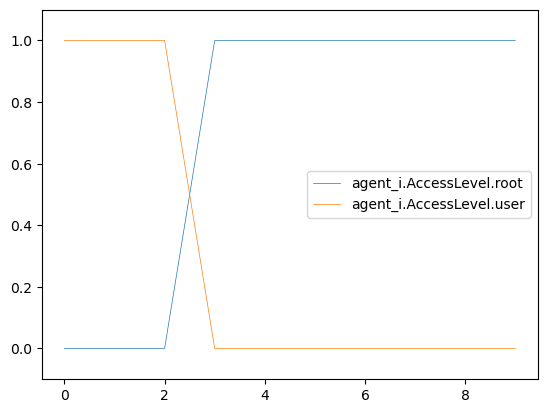

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.969444                  0.030556            Nop   
4                  0.972933                  0.027067            Nop   
5                  0.998836                  0.001164            Nop   
6                  0.995253                  0.004747            Nop   
7                  0.995253                  0.004747            Nop   
8                  0.995253                  0.004747            Nop   
9                  0.995253                  0.004747            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

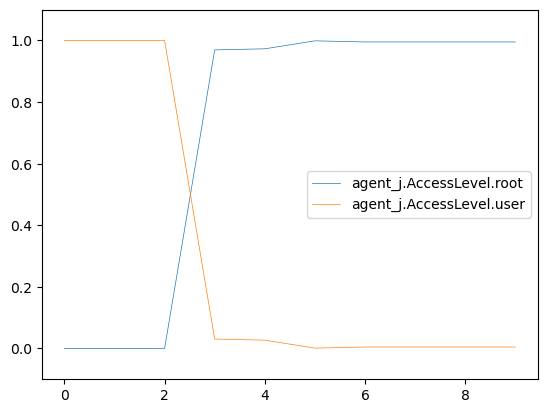

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.421850                        0.578150   
3                         0.462605                        0.537395   
4                         0.497608                        0.502392   
5                         0.497568                        0.502432   
6                         0.497559                        0.502441   
7                         0.497559                        0.502441   
8                         0.497559                        0.502441   
9                         0.497559                        0.502441   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

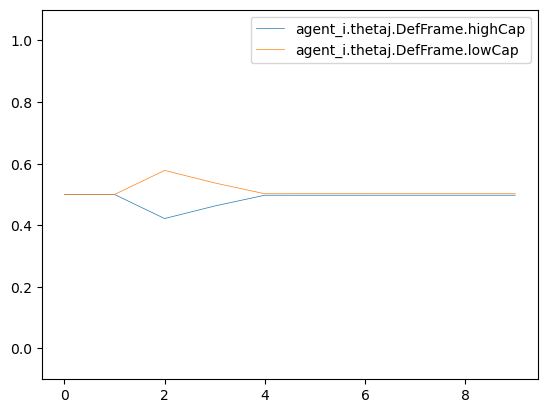

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                        file_enum   
3                               1.0                         su_login   
4                               1.0                        file_enum   
5                               1.0                        file_enum   
6                               1.0                             none   
7                               1.0                             none   
8                               1.0                       file_write   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

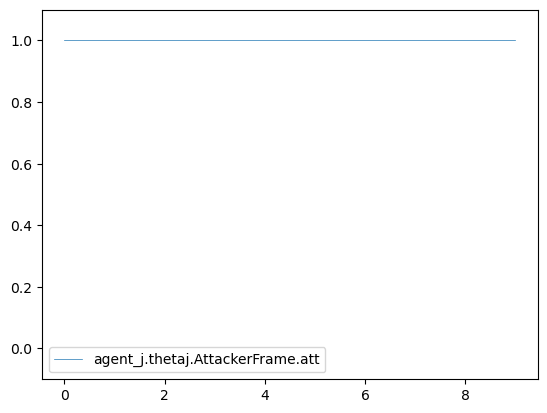

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0   EnumAccounts            Nop
3                   0.0                    1.0     PrivEscAcc            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0      FileRecon            Nop
6                   0.0                    1.0           Exit            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

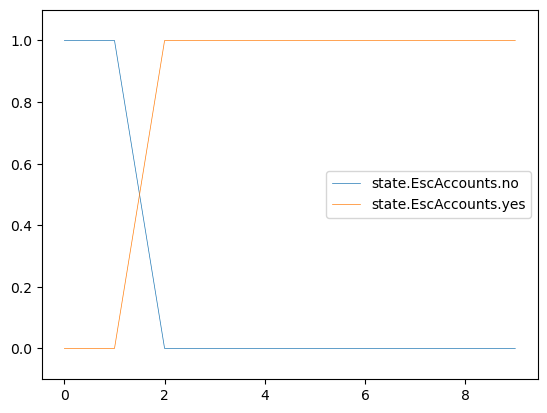

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.677333                 0.322667   EnumAccounts   
3                0.247398                 0.752602     PrivEscAcc   
4                0.000339                 0.999661      FileRecon   
5                0.000441                 0.999559      FileRecon   
6                0.000491                 0.999510           Exit   
7                0.000491                 0.999510            Nop   
8                0.000491                 0.999510            Nop   
9                0.000491                 0.999510            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

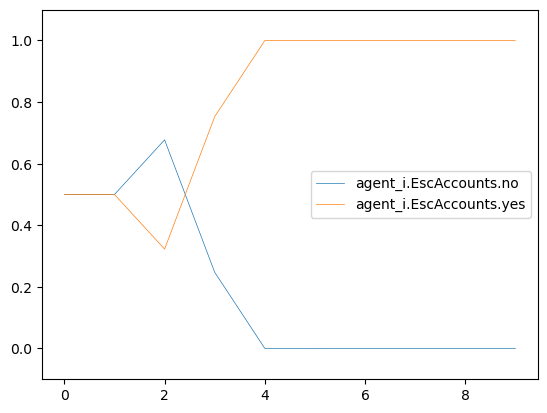

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

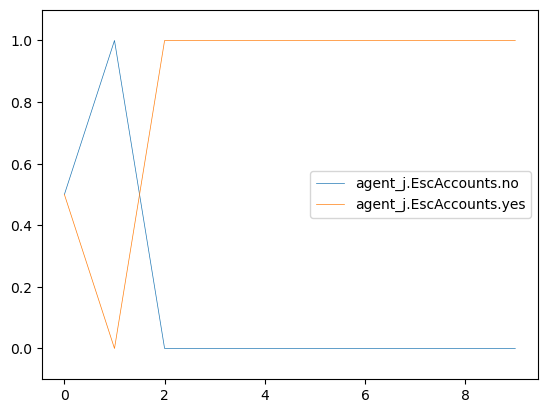

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0   EnumAccounts            Nop  
3                      1.0     PrivEscAcc            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0      FileRecon            Nop  
6                      1.0           Exit            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

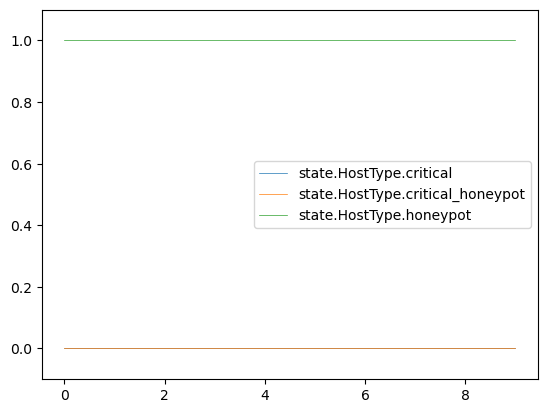

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0   EnumAccounts            Nop   
3                        0.0     PrivEscAcc            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0      FileRecon            Nop   
6                        0.0           Exit            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

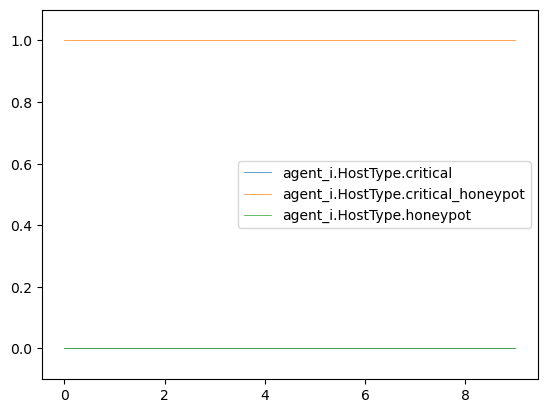

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop   EnumAccounts   
3                        1.0            Nop     PrivEscAcc   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop      FileRecon   
6                        1.0            Nop           Exit   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

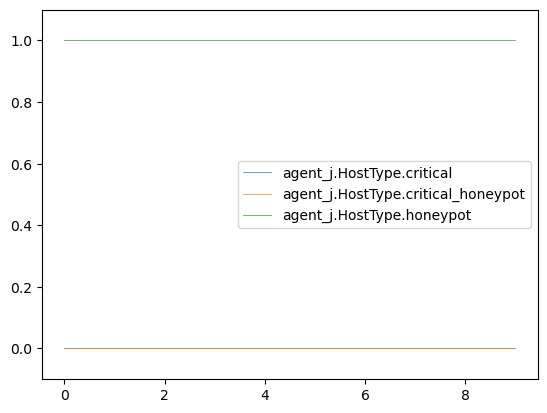

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0   EnumAccounts            Nop
3                 0.0                  1.0     PrivEscAcc            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0      FileRecon            Nop
6                 0.0                  1.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

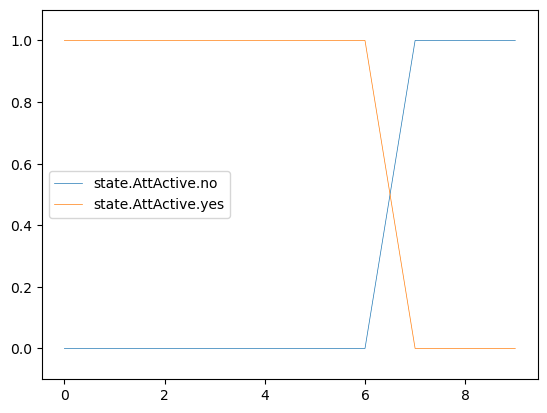

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0   EnumAccounts            Nop   
3                   0.0                    1.0     PrivEscAcc            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0      FileRecon            Nop   
6                   0.0                    1.0           Exit            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

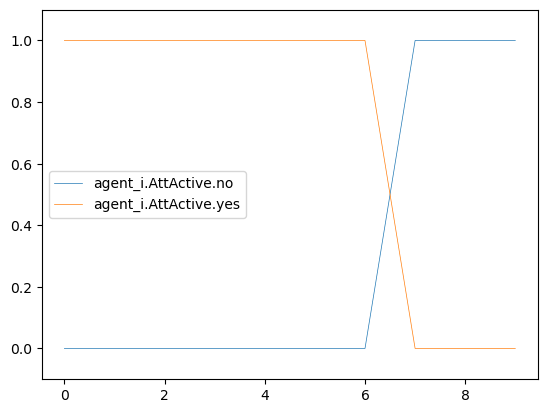

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop   EnumAccounts   
3              0.000005           9.999955e-01            Nop     PrivEscAcc   
4              0.668446           3.315542e-01            Nop      FileRecon   
5              0.030931           9.690692e-01            Nop      FileRecon   
6              0.002483           9.975172e-01            Nop           Exit   
7              0.959959           4.004066e-02            Nop            Nop   
8              1.000000           3.976003e-07            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

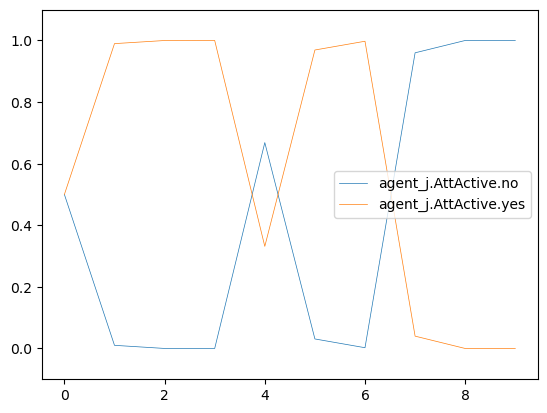

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0   EnumAccounts            Nop
3                    1.0                     0.0     PrivEscAcc            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0      FileRecon            Nop
6                    1.0                     0.0           Exit            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

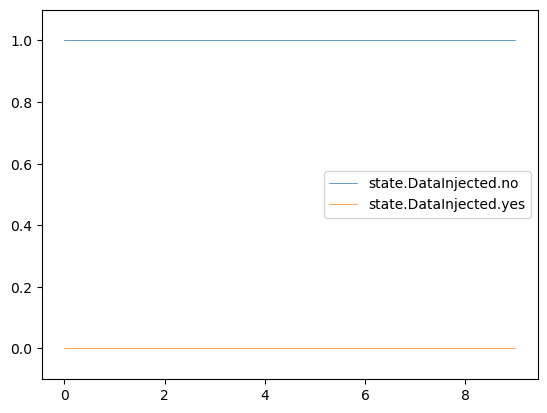

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0      FileRecon   
6                      1.0                       0.0           Exit   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

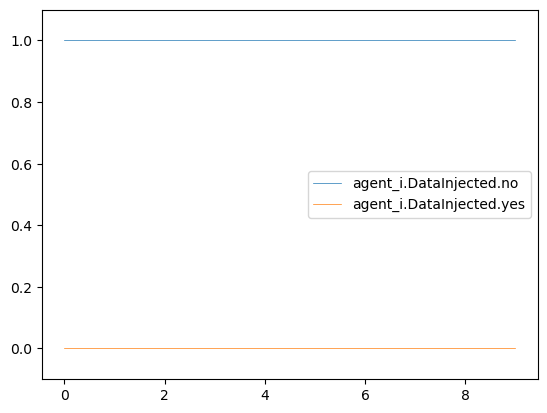

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.999365                  0.000635            Nop   
6                 0.971587                  0.028413            Nop   
7                 0.844811                  0.155189            Nop   
8                 0.844807                  0.155193            Nop   
9                 0.844807                  0.155193            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

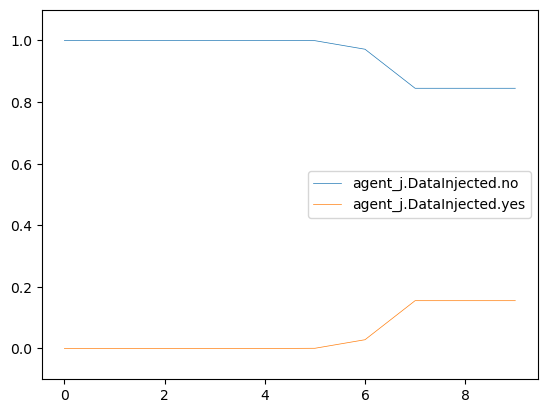

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0   EnumAccounts            Nop
3                   1.0                   0.0     PrivEscAcc            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0      FileRecon            Nop
6                   1.0                   0.0           Exit            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

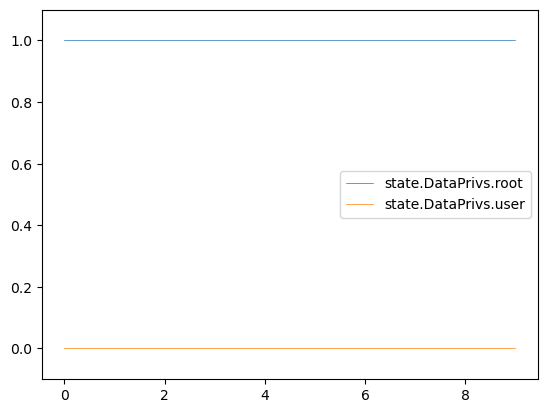

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892   EnumAccounts   
3                0.608108                0.391892     PrivEscAcc   
4                0.608108                0.391892      FileRecon   
5                0.546989                0.453011      FileRecon   
6                0.512811                0.487190           Exit   
7                0.512811                0.487190            Nop   
8                0.512811                0.487190            Nop   
9                0.512811                0.487190            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

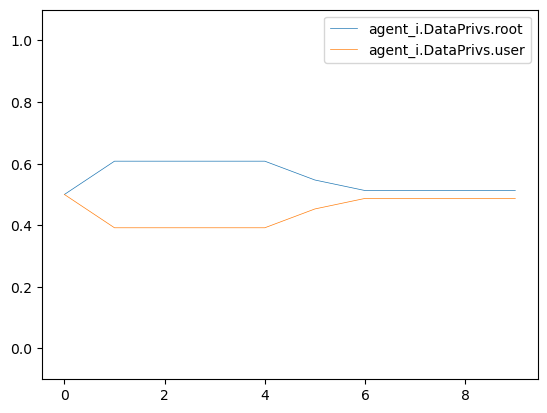

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

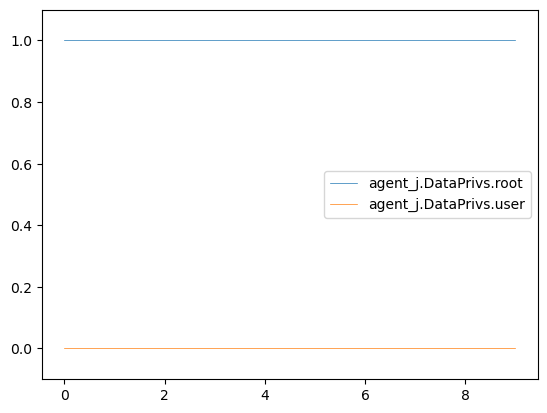

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0   EnumAccounts            Nop
3                   1.0                    0.0     PrivEscAcc            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0      FileRecon            Nop
6                   1.0                    0.0           Exit            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

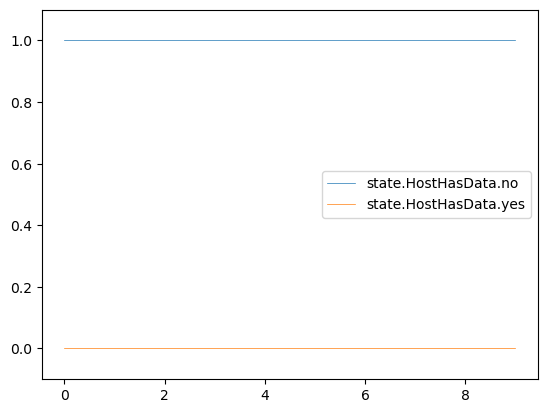

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892   EnumAccounts   
3                0.608108                 0.391892     PrivEscAcc   
4                0.608108                 0.391892      FileRecon   
5                0.848609                 0.151391      FileRecon   
6                0.960331                 0.039669           Exit   
7                0.960331                 0.039669            Nop   
8                0.960331                 0.039669            Nop   
9                0.960331                 0.039669            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

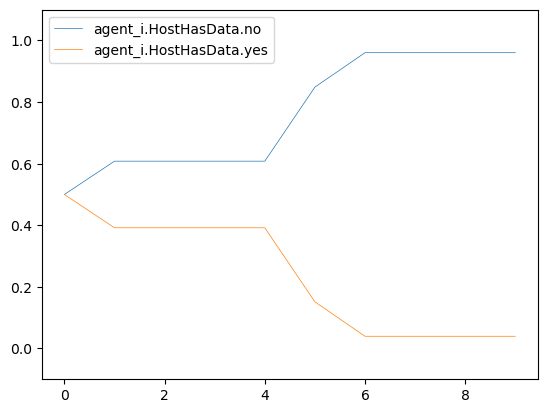

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

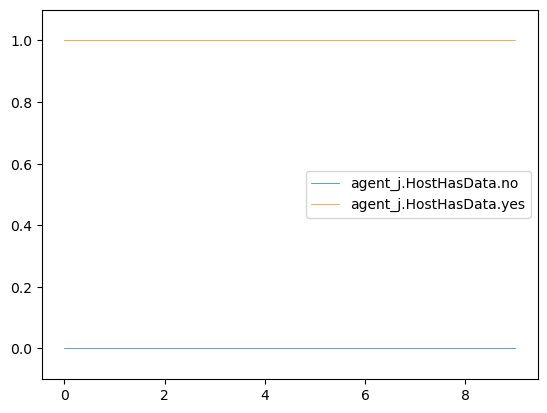

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0   EnumAccounts            Nop
3                 1.0                  0.0     PrivEscAcc            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0      FileRecon            Nop
6                 1.0                  0.0           Exit            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

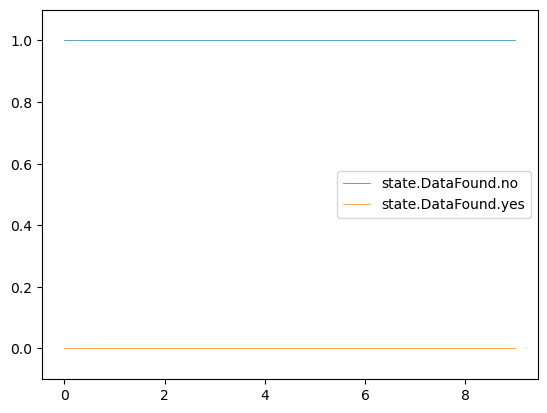

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027   EnumAccounts            Nop   
3              0.972973               0.027027     PrivEscAcc            Nop   
4              0.972973               0.027027      FileRecon            Nop   
5              0.950564               0.049436      FileRecon            Nop   
6              0.983544               0.016457           Exit            Nop   
7              0.983544               0.016457            Nop            Nop   
8              0.983544               0.016457            Nop            Nop   
9              0.983544               0.016457            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

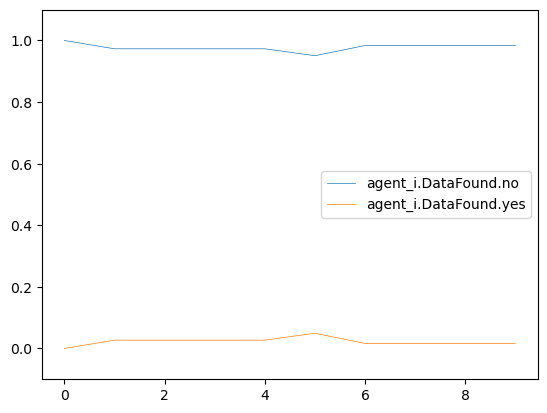

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop   EnumAccounts   
3              1.000000               0.000000            Nop     PrivEscAcc   
4              0.983037               0.016963            Nop      FileRecon   
5              0.243730               0.756270            Nop      FileRecon   
6              0.137410               0.862590            Nop           Exit   
7              0.503868               0.496132            Nop            Nop   
8              0.503883               0.496117            Nop            Nop   
9              0.503883               0.496117            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

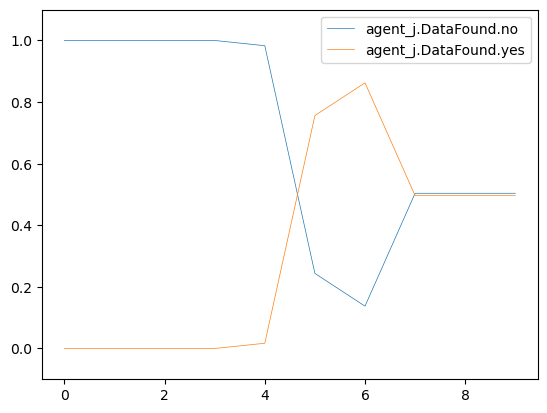

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                0.0                 1.0   EnumAccounts            Nop
3                0.0                 1.0     PrivEscAcc            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0      FileRecon            Nop
6                0.0                 1.0           Exit            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

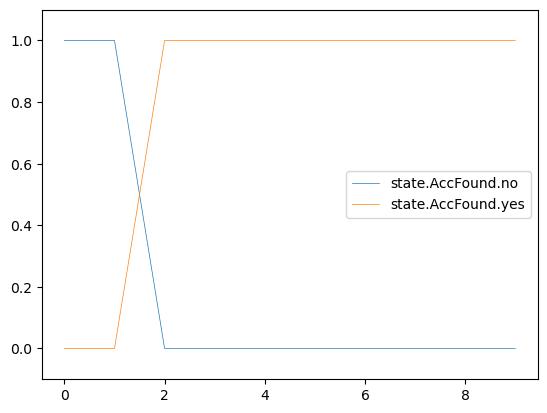

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.900718              0.099282   EnumAccounts            Nop   
3             0.260602              0.739398     PrivEscAcc            Nop   
4             0.000357              0.999643      FileRecon            Nop   
5             0.000464              0.999536      FileRecon            Nop   
6             0.000516              0.999484           Exit            Nop   
7             0.000516              0.999484            Nop            Nop   
8             0.000516              0.999484            Nop            Nop   
9             0.000516              0.999484            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           success   
3                   user_files                           success   
4                         none                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                   user_files                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

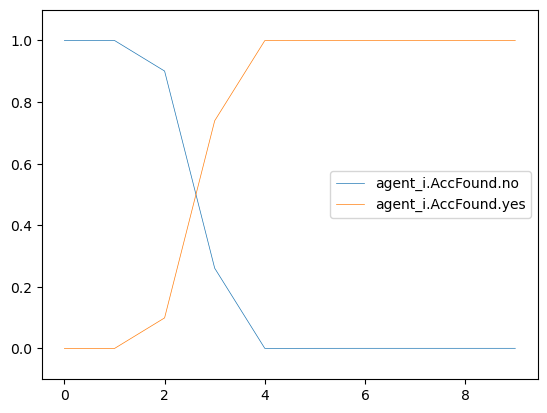

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop   EnumAccounts   
3             0.671330              0.328670            Nop     PrivEscAcc   
4             0.521709              0.478291            Nop      FileRecon   
5             0.047000              0.953000            Nop      FileRecon   
6             0.002054              0.997946            Nop           Exit   
7             0.008348              0.991652            Nop            Nop   
8             0.008348              0.991652            Nop            Nop   
9             0.008348              0.991652            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                        file_enum                         yes  
3                         su_login                         yes  
4                        file_enum                         yes  
5                        file_enum                         yes  
6                             none                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

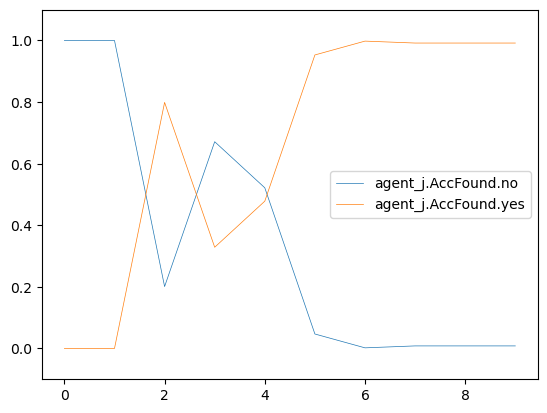

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0   EnumAccounts   
3                     0.0                     1.0     PrivEscAcc   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0      FileRecon   
6                     1.0                     0.0           Exit   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

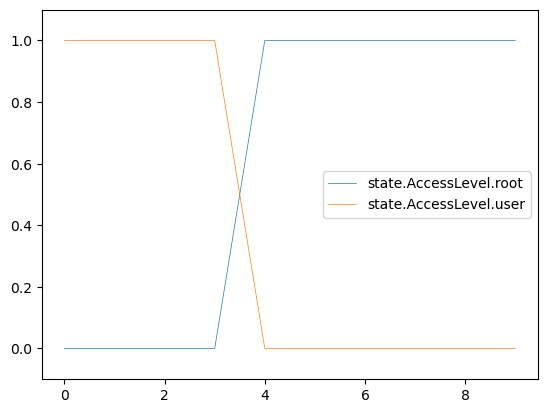

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000   EnumAccounts   
3                  0.000000                  1.000000     PrivEscAcc   
4                  0.999643                  0.000357      FileRecon   
5                  0.999536                  0.000464      FileRecon   
6                  0.999484                  0.000516           Exit   
7                  0.999484                  0.000516            Nop   
8                  0.999484                  0.000516            Nop   
9                  0.999484                  0.000516            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           failure                       active  
5                           failure                       active  
6                           success                     inactive  
7                           failure                     inactive  
8                           failure                     inactive  
9                           success                     inactive

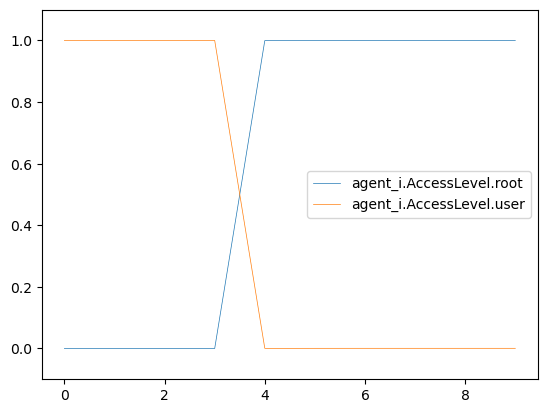

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.027617                  0.972383            Nop   
4                  0.249502                  0.750498            Nop   
5                  0.943488                  0.056512            Nop   
6                  0.997549                  0.002451            Nop   
7                  0.990031                  0.009969            Nop   
8                  0.990031                  0.009969            Nop   
9                  0.990031                  0.009969            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2   EnumAccounts                        file_enum                         yes  
3     PrivEscAcc                         su_login                         yes  
4      FileRecon                        file_enum                         yes  
5      FileRecon                        file_enum                         yes  
6           Exit                             none                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

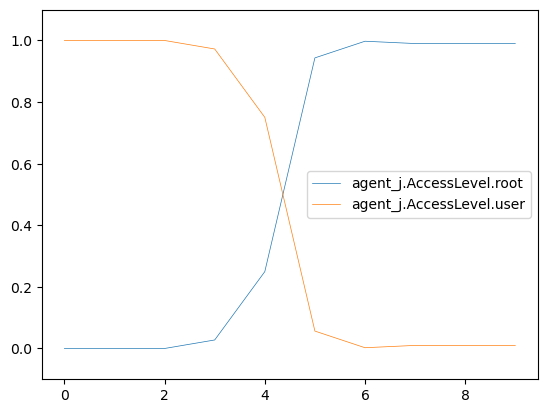

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.578652                        0.421348   
3                         0.500024                        0.499976   
4                         0.497628                        0.502372   
5                         0.497577                        0.502423   
6                         0.497577                        0.502423   
7                         0.497577                        0.502423   
8                         0.497577                        0.502423   
9                         0.497577                        0.502423   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

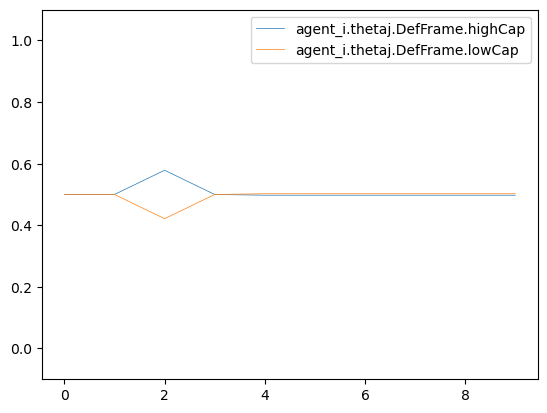

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                         su_login   
3                               1.0                        file_enum   
4                               1.0                        file_enum   
5                               1.0                             none   
6                               1.0                             none   
7                               1.0                             none   
8                               1.0                             none   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

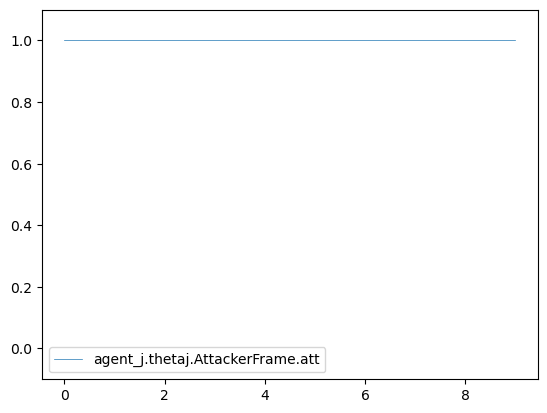

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0           Exit            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

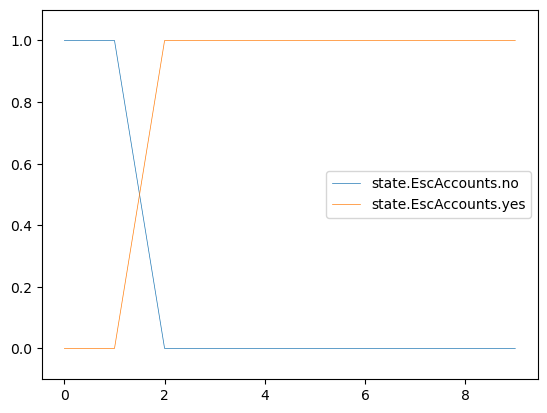

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.075742                 0.924258     PrivEscAcc   
3                0.000105                 0.999895      FileRecon   
4                0.000137                 0.999863      FileRecon   
5                0.000153                 0.999847           Exit   
6                0.000153                 0.999847            Nop   
7                0.000153                 0.999847            Nop   
8                0.000153                 0.999847            Nop   
9                0.000153                 0.999847            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

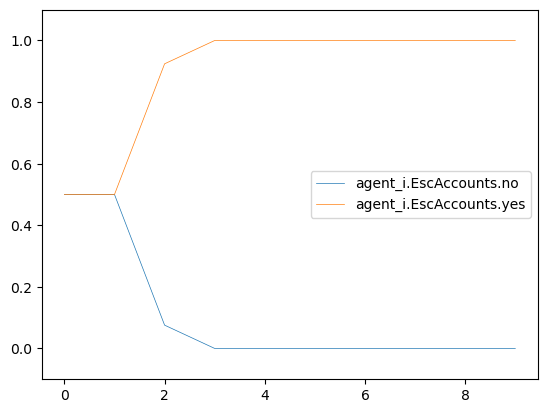

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

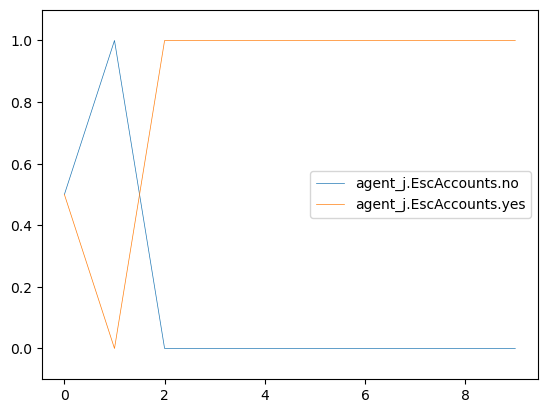

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0           Exit            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

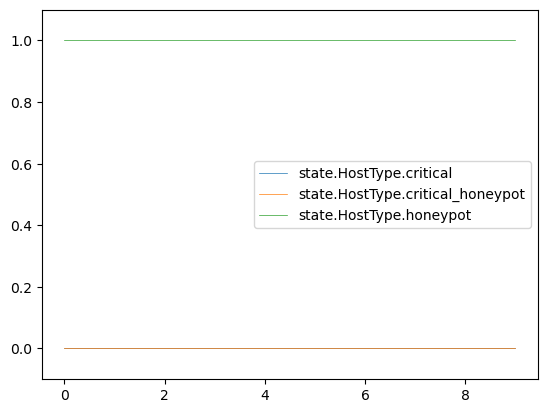

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0           Exit            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

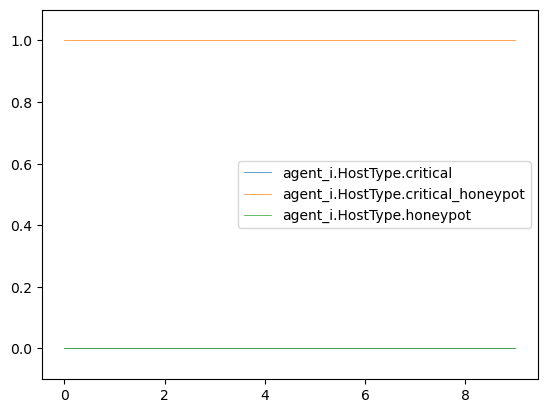

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop           Exit   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

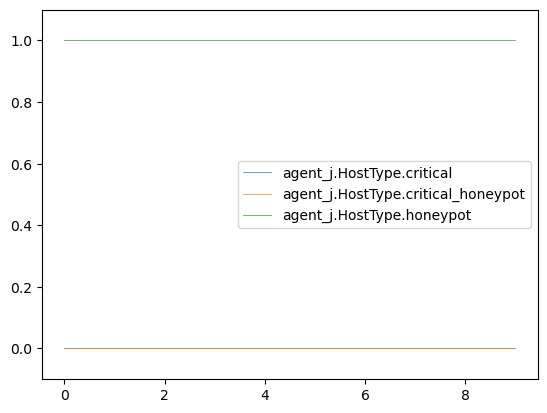

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

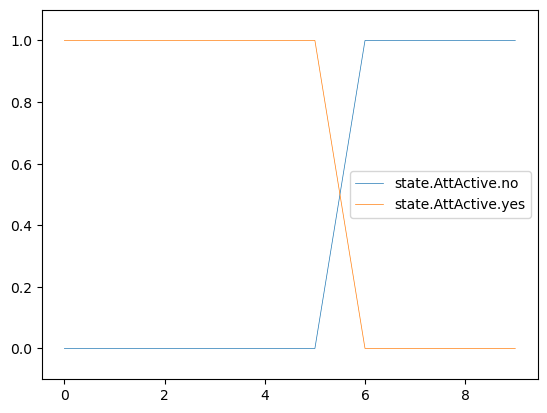

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0           Exit            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

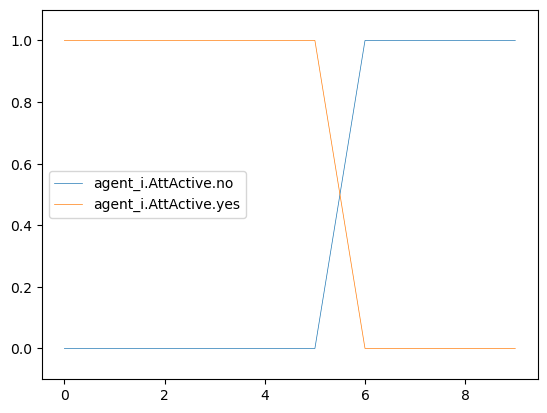

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop     PrivEscAcc   
3              0.000002           9.999984e-01            Nop      FileRecon   
4              0.000034           9.999664e-01            Nop      FileRecon   
5              0.000974           9.990267e-01            Nop           Exit   
6              0.959589           4.041113e-02            Nop            Nop   
7              1.000000           4.013770e-07            Nop            Nop   
8              1.000000           6.069631e-14            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

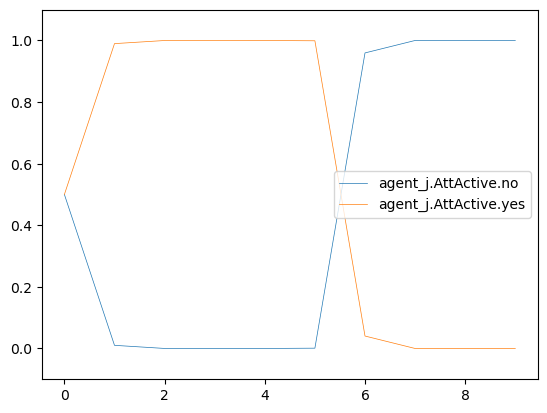

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0           Exit            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

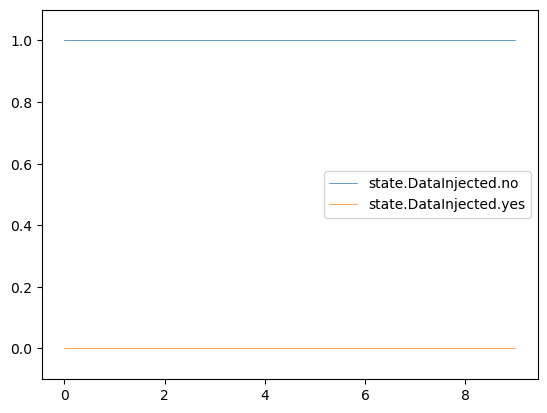

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0           Exit   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

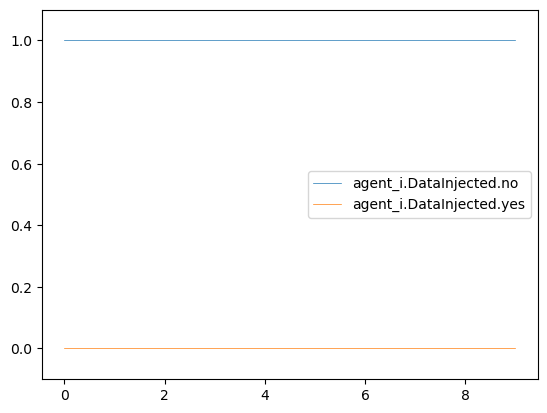

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.972271                  0.027729            Nop   
6                 0.846438                  0.153562            Nop   
7                 0.846435                  0.153565            Nop   
8                 0.846435                  0.153565            Nop   
9                 0.846435                  0.153565            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

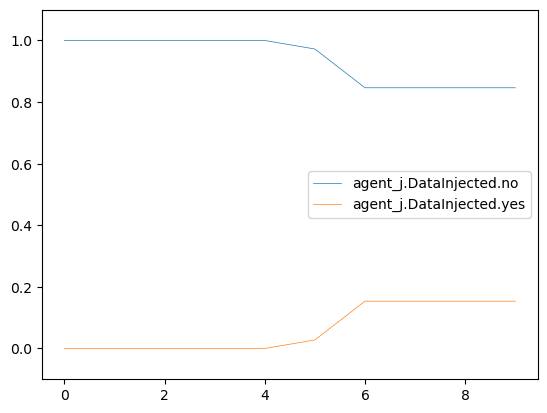

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0           Exit            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

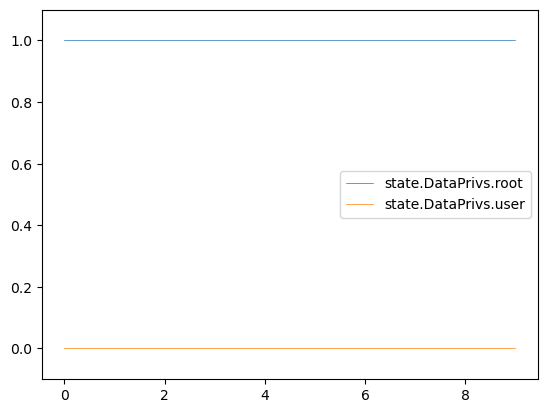

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892     PrivEscAcc   
3                0.608108                0.391892      FileRecon   
4                0.546959                0.453041      FileRecon   
5                0.512762                0.487238           Exit   
6                0.512762                0.487238            Nop   
7                0.512762                0.487238            Nop   
8                0.512762                0.487238            Nop   
9                0.512762                0.487238            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

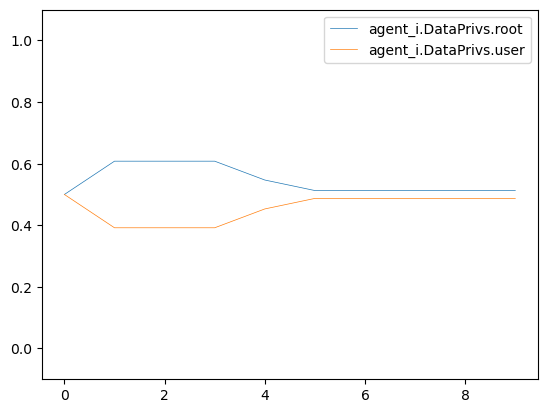

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

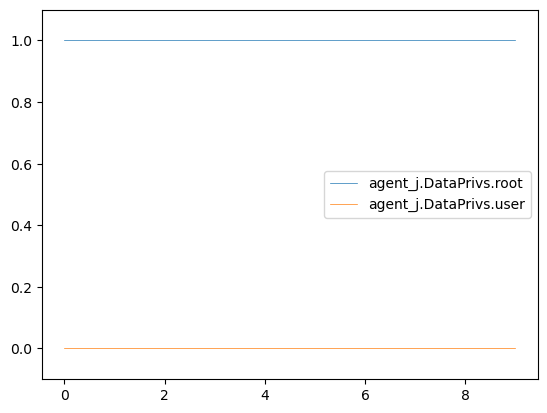

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0     PrivEscAcc            Nop
3                   1.0                    0.0      FileRecon            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0           Exit            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

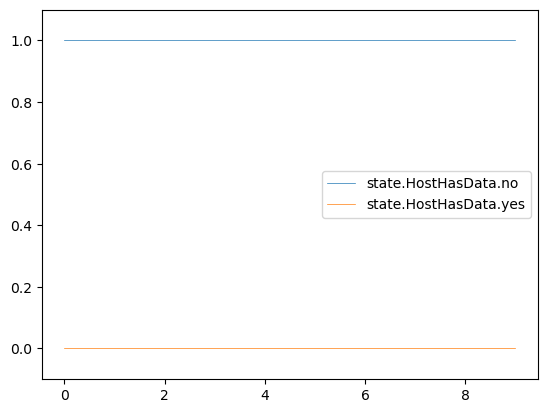

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892     PrivEscAcc   
3                0.608108                 0.391892      FileRecon   
4                0.848667                 0.151333      FileRecon   
5                0.960427                 0.039573           Exit   
6                0.960427                 0.039573            Nop   
7                0.960427                 0.039573            Nop   
8                0.960427                 0.039573            Nop   
9                0.960427                 0.039573            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

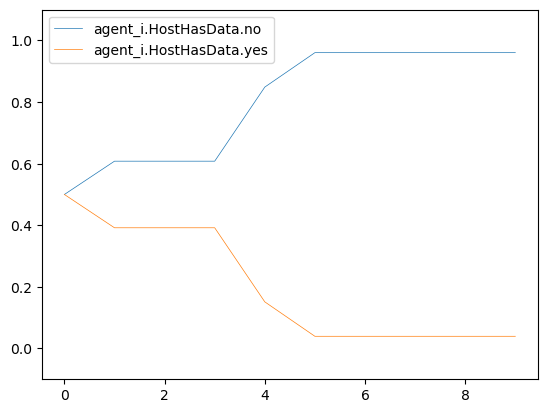

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

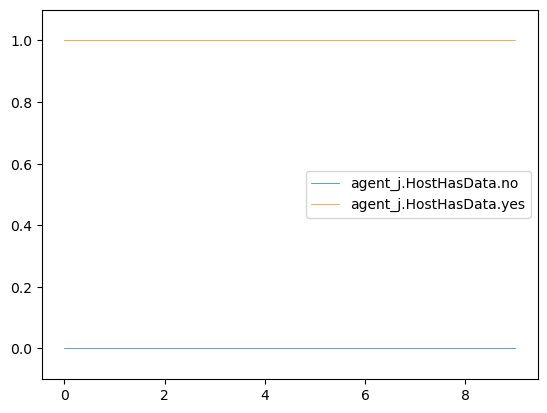

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

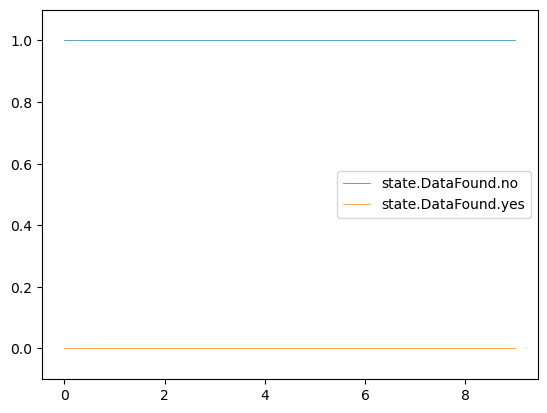

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027     PrivEscAcc            Nop   
3              0.972973               0.027027      FileRecon            Nop   
4              0.950552               0.049448      FileRecon            Nop   
5              0.983539               0.016461           Exit            Nop   
6              0.983539               0.016461            Nop            Nop   
7              0.983539               0.016461            Nop            Nop   
8              0.983539               0.016461            Nop            Nop   
9              0.983539               0.016461            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

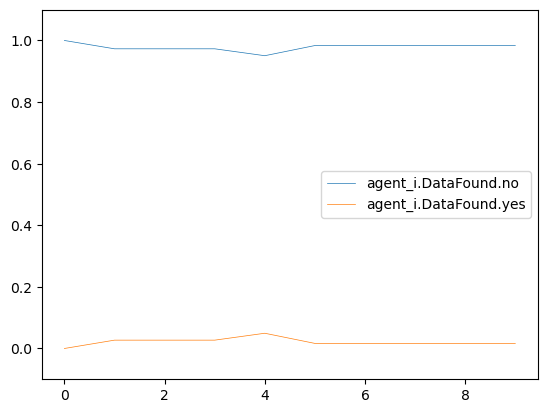

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop      FileRecon   
4              0.221654               0.778346            Nop      FileRecon   
5              0.136294               0.863706            Nop           Exit   
6              0.502670               0.497330            Nop            Nop   
7              0.502685               0.497315            Nop            Nop   
8              0.502685               0.497315            Nop            Nop   
9              0.502685               0.497315            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

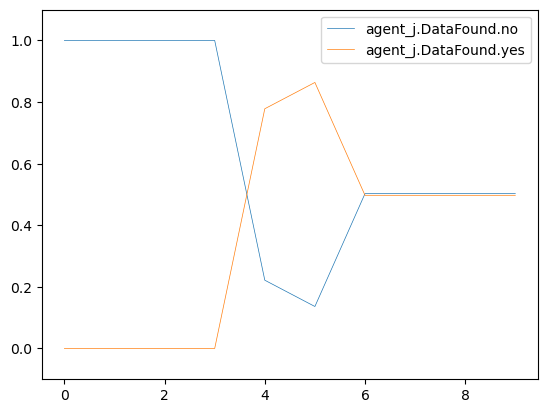

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                0.0                 1.0     PrivEscAcc            Nop
3                0.0                 1.0      FileRecon            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0           Exit            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

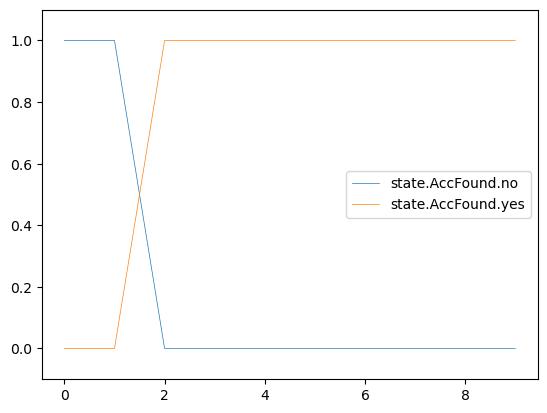

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.100722              0.899278     PrivEscAcc            Nop   
3             0.000133              0.999867      FileRecon            Nop   
4             0.000173              0.999826      FileRecon            Nop   
5             0.000193              0.999807           Exit            Nop   
6             0.000193              0.999807            Nop            Nop   
7             0.000193              0.999807            Nop            Nop   
8             0.000193              0.999807            Nop            Nop   
9             0.000193              0.999807            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           failure   
5                   user_files                           failure   
6                   user_files                           failure   
7                         none                           success   
8                   user_files                           success   
9                         none                           success   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

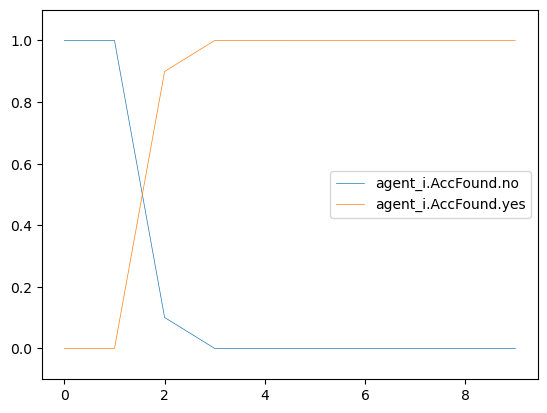

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop     PrivEscAcc   
3             0.029432              0.970568            Nop      FileRecon   
4             0.027055              0.972945            Nop      FileRecon   
5             0.001163              0.998837            Nop           Exit   
6             0.004745              0.995255            Nop            Nop   
7             0.004745              0.995255            Nop            Nop   
8             0.004745              0.995255            Nop            Nop   
9             0.004745              0.995255            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                             none                         yes  
7                             none                         yes  
8                             none                         yes  
9                             none                         yes

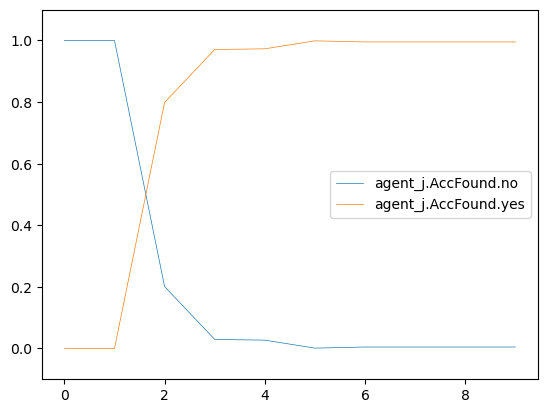

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     1.0                     0.0      FileRecon   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0           Exit   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

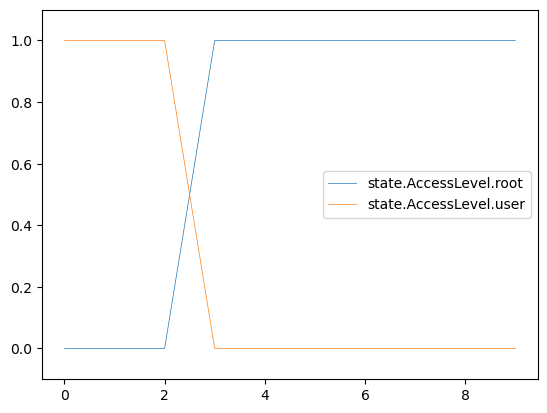

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.999860                  0.000140      FileRecon   
4                  0.999826                  0.000174      FileRecon   
5                  0.999807                  0.000193           Exit   
6                  0.999807                  0.000193            Nop   
7                  0.999807                  0.000193            Nop   
8                  0.999807                  0.000193            Nop   
9                  0.999807                  0.000193            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

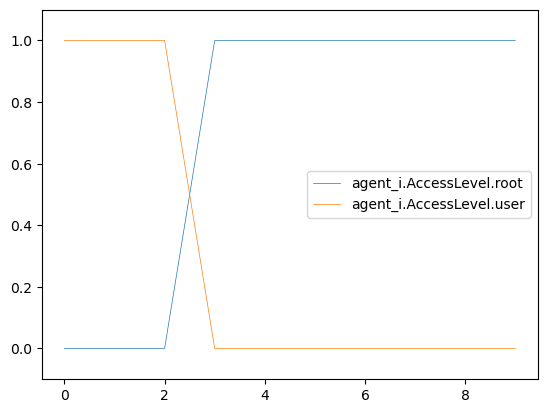

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.969444                  0.030556            Nop   
4                  0.972933                  0.027067            Nop   
5                  0.998836                  0.001164            Nop   
6                  0.995253                  0.004747            Nop   
7                  0.995253                  0.004747            Nop   
8                  0.995253                  0.004747            Nop   
9                  0.995253                  0.004747            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                             none                         yes  
7            Nop                             none                         yes  
8            Nop                             none                         yes  
9            Nop                             none                         yes

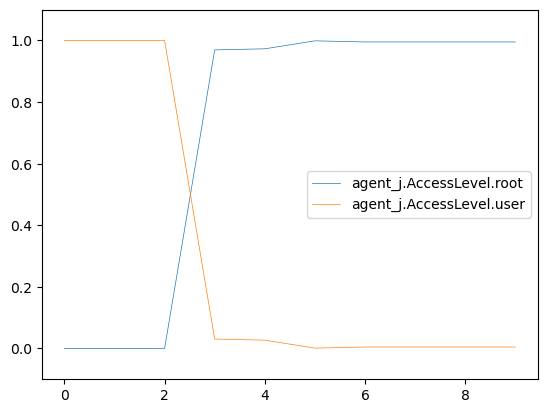

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.578652                        0.421348   
3                         0.500024                        0.499976   
4                         0.497628                        0.502372   
5                         0.497577                        0.502423   
6                         0.497577                        0.502423   
7                         0.497577                        0.502423   
8                         0.497577                        0.502423   
9                         0.497577                        0.502423   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

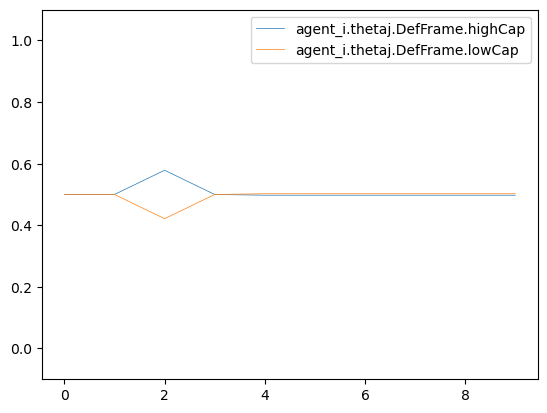

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'  \
0                               1.0                        file_enum   
1                               1.0                        file_enum   
2                               1.0                         su_login   
3                               1.0                        file_enum   
4                               1.0                        file_enum   
5                               1.0                             none   
6                               1.0                       file_write   
7                               1.0                             none   
8                               1.0                       file_write   
9                               1.0                             none   

  agent_j.observation.AccObs'  
0                          no  
1                         yes  
2                         yes  
3                         yes  
4                         yes  
5                         yes  
6                         yes  
7                         yes  
8                         yes  
9                         yes

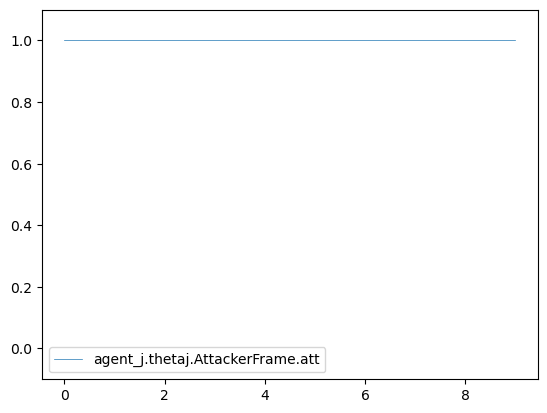

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   0.0                    1.0     PrivEscAcc            Nop
3                   0.0                    1.0      FileRecon            Nop
4                   0.0                    1.0      FileRecon            Nop
5                   0.0                    1.0           Exit            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

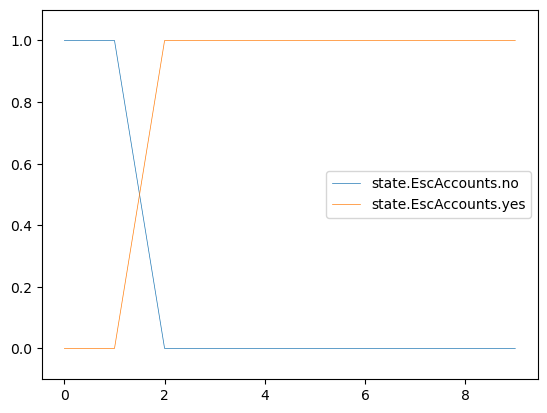

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.075742                 0.924258     PrivEscAcc   
3                0.000105                 0.999895      FileRecon   
4                0.000137                 0.999863      FileRecon   
5                0.000153                 0.999847           Exit   
6                0.000153                 0.999847            Nop   
7                0.000153                 0.999847            Nop   
8                0.000153                 0.999847            Nop   
9                0.000153                 0.999847            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

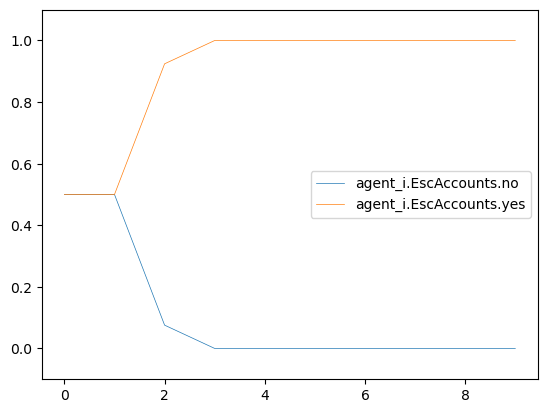

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                     0.5                      0.5            Nop   
1                     1.0                      0.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

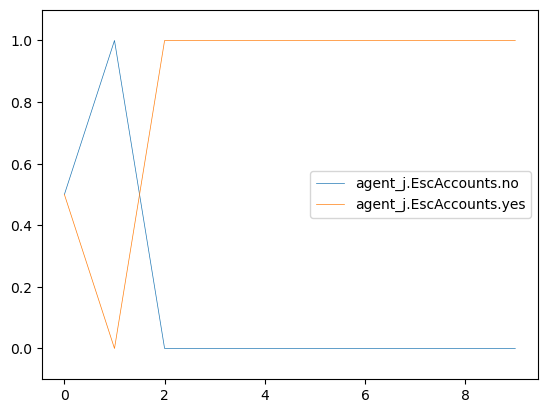

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0      FileRecon            Nop  
1                      1.0   EnumAccounts   DecoyAccount  
2                      1.0     PrivEscAcc            Nop  
3                      1.0      FileRecon            Nop  
4                      1.0      FileRecon            Nop  
5                      1.0           Exit            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

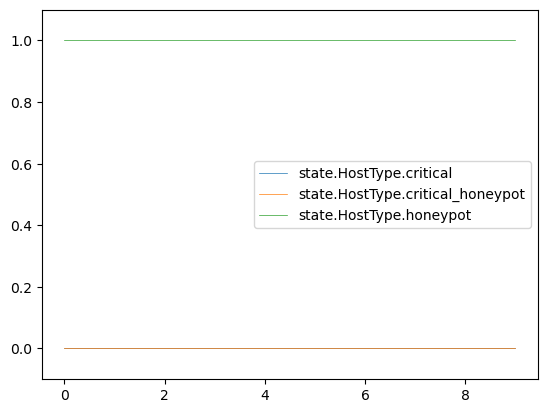

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        0.0      FileRecon            Nop   
1                        0.0   EnumAccounts   DecoyAccount   
2                        0.0     PrivEscAcc            Nop   
3                        0.0      FileRecon            Nop   
4                        0.0      FileRecon            Nop   
5                        0.0           Exit            Nop   
6                        0.0            Nop            Nop   
7                        0.0            Nop            Nop   
8                        0.0            Nop            Nop   
9                        0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

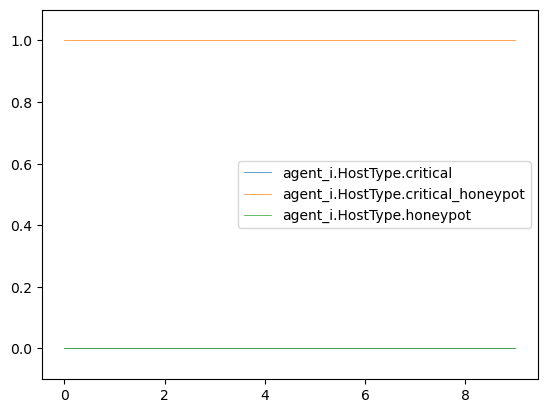

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                        1.0            Nop      FileRecon   
1                        1.0   DecoyAccount   EnumAccounts   
2                        1.0            Nop     PrivEscAcc   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop      FileRecon   
5                        1.0            Nop           Exit   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

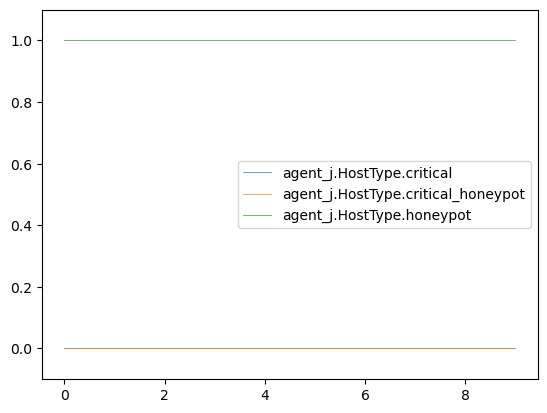

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0      FileRecon            Nop
1                 0.0                  1.0   EnumAccounts   DecoyAccount
2                 0.0                  1.0     PrivEscAcc            Nop
3                 0.0                  1.0      FileRecon            Nop
4                 0.0                  1.0      FileRecon            Nop
5                 0.0                  1.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

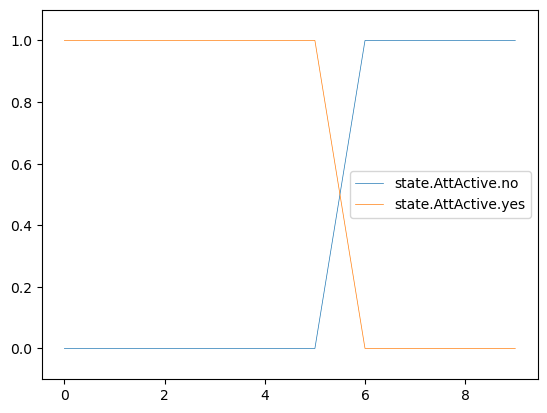

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts   DecoyAccount   
2                   0.0                    1.0     PrivEscAcc            Nop   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0      FileRecon            Nop   
5                   0.0                    1.0           Exit            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

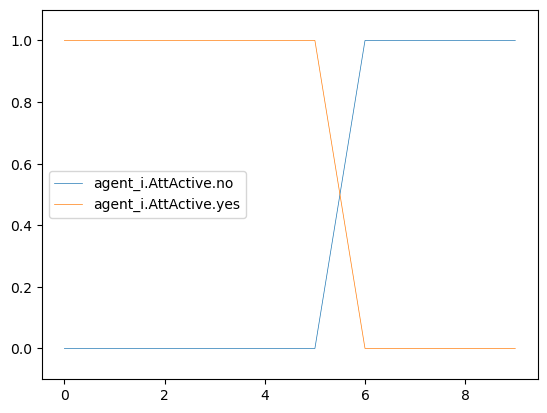

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0              0.500000           5.000000e-01            Nop      FileRecon   
1              0.010204           9.897959e-01   DecoyAccount   EnumAccounts   
2              0.000118           9.998821e-01            Nop     PrivEscAcc   
3              0.000002           9.999984e-01            Nop      FileRecon   
4              0.000034           9.999664e-01            Nop      FileRecon   
5              0.000974           9.990267e-01            Nop           Exit   
6              0.959589           4.041113e-02            Nop            Nop   
7              0.999848           1.518156e-04            Nop            Nop   
8              1.000000           2.366798e-13            Nop            Nop   
9              1.000000           0.000000e+00            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

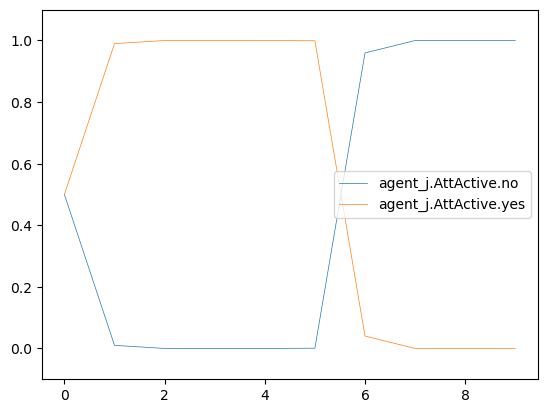

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0      FileRecon            Nop
1                    1.0                     0.0   EnumAccounts   DecoyAccount
2                    1.0                     0.0     PrivEscAcc            Nop
3                    1.0                     0.0      FileRecon            Nop
4                    1.0                     0.0      FileRecon            Nop
5                    1.0                     0.0           Exit            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

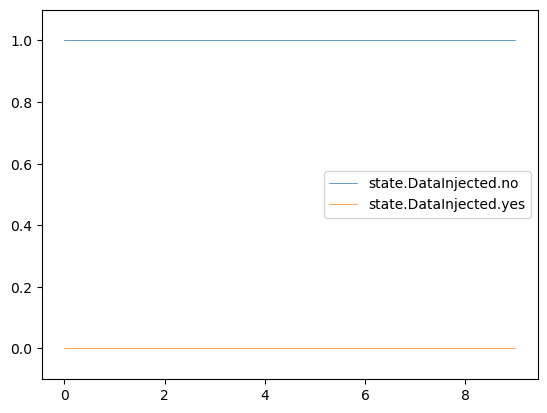

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0      FileRecon   
5                      1.0                       0.0           Exit   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

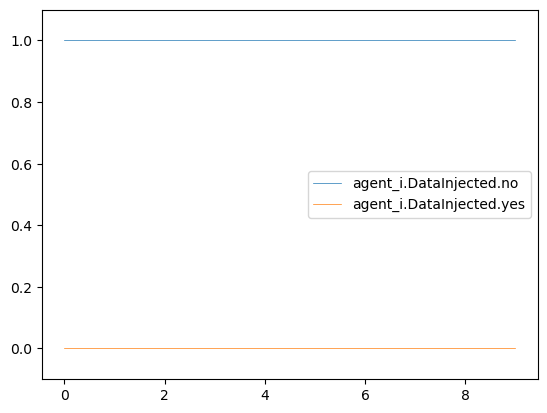

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000   DecoyAccount   
2                 1.000000                  0.000000            Nop   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 0.972271                  0.027729            Nop   
6                 0.846438                  0.153562            Nop   
7                 0.846310                  0.153690            Nop   
8                 0.846310                  0.153690            Nop   
9                 0.846310                  0.153690            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

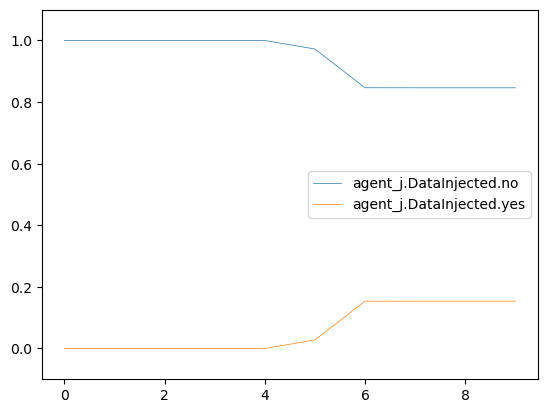

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0      FileRecon            Nop
1                   1.0                   0.0   EnumAccounts   DecoyAccount
2                   1.0                   0.0     PrivEscAcc            Nop
3                   1.0                   0.0      FileRecon            Nop
4                   1.0                   0.0      FileRecon            Nop
5                   1.0                   0.0           Exit            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

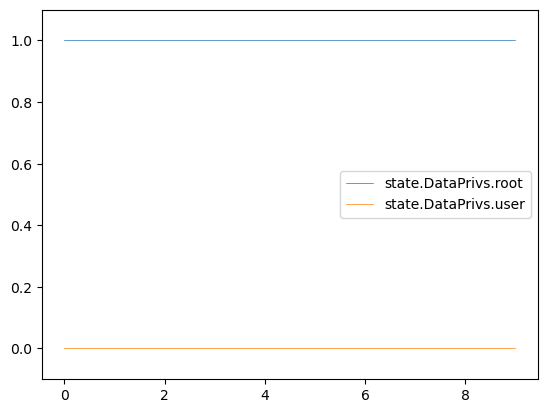

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000      FileRecon   
1                0.608108                0.391892   EnumAccounts   
2                0.608108                0.391892     PrivEscAcc   
3                0.608108                0.391892      FileRecon   
4                0.546959                0.453041      FileRecon   
5                0.512762                0.487238           Exit   
6                0.512762                0.487238            Nop   
7                0.512762                0.487238            Nop   
8                0.512762                0.487238            Nop   
9                0.512762                0.487238            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

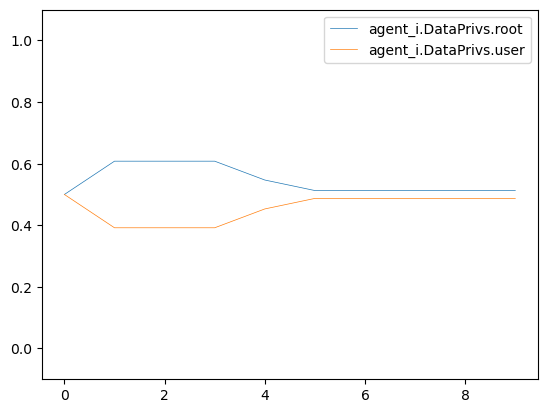

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0   DecoyAccount   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

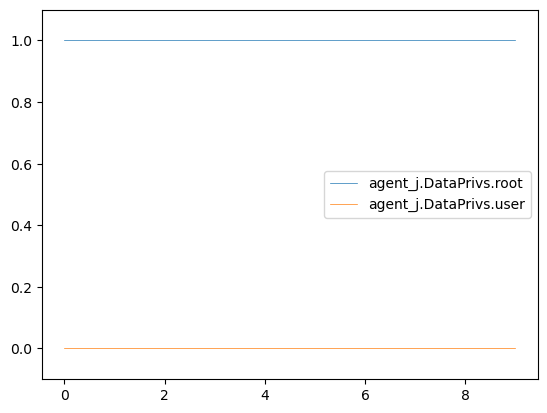

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   1.0                    0.0      FileRecon            Nop
1                   1.0                    0.0   EnumAccounts   DecoyAccount
2                   1.0                    0.0     PrivEscAcc            Nop
3                   1.0                    0.0      FileRecon            Nop
4                   1.0                    0.0      FileRecon            Nop
5                   1.0                    0.0           Exit            Nop
6                   1.0                    0.0            Nop            Nop
7                   1.0                    0.0            Nop            Nop
8                   1.0                    0.0            Nop            Nop
9                   1.0                    0.0            Nop            Nop

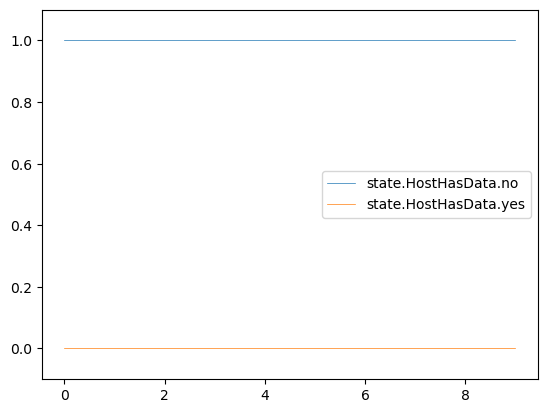

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                0.500000                 0.500000      FileRecon   
1                0.608108                 0.391892   EnumAccounts   
2                0.608108                 0.391892     PrivEscAcc   
3                0.608108                 0.391892      FileRecon   
4                0.848667                 0.151333      FileRecon   
5                0.960427                 0.039573           Exit   
6                0.960427                 0.039573            Nop   
7                0.960427                 0.039573            Nop   
8                0.960427                 0.039573            Nop   
9                0.960427                 0.039573            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

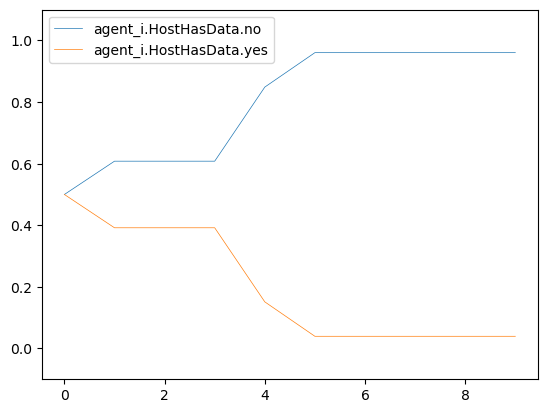

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0   DecoyAccount   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

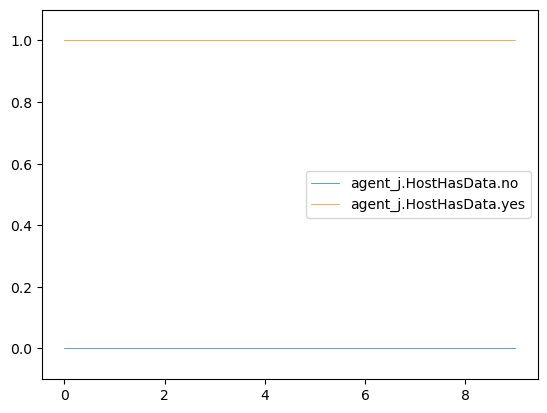

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0      FileRecon            Nop
1                 1.0                  0.0   EnumAccounts   DecoyAccount
2                 1.0                  0.0     PrivEscAcc            Nop
3                 1.0                  0.0      FileRecon            Nop
4                 1.0                  0.0      FileRecon            Nop
5                 1.0                  0.0           Exit            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

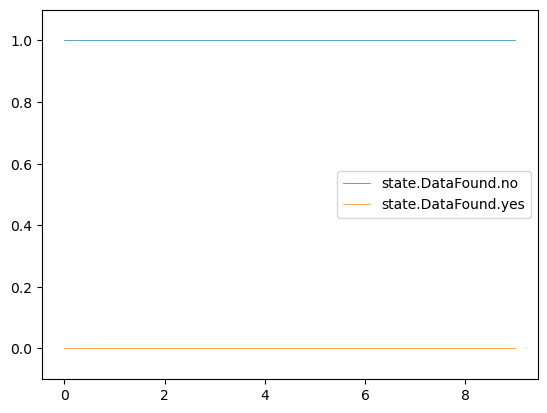

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.972973               0.027027   EnumAccounts   DecoyAccount   
2              0.972973               0.027027     PrivEscAcc            Nop   
3              0.972973               0.027027      FileRecon            Nop   
4              0.950552               0.049448      FileRecon            Nop   
5              0.983539               0.016461           Exit            Nop   
6              0.983539               0.016461            Nop            Nop   
7              0.983539               0.016461            Nop            Nop   
8              0.983539               0.016461            Nop            Nop   
9              0.983539               0.016461            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

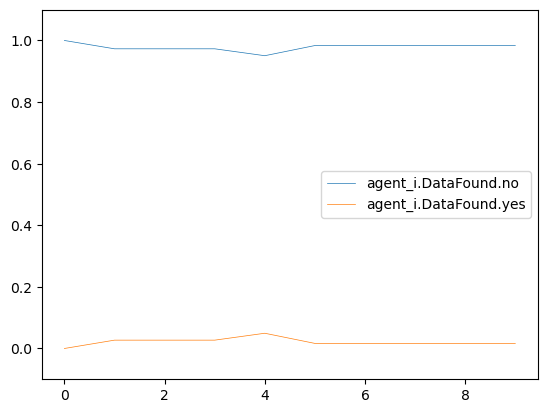

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000   DecoyAccount   EnumAccounts   
2              1.000000               0.000000            Nop     PrivEscAcc   
3              1.000000               0.000000            Nop      FileRecon   
4              0.221654               0.778346            Nop      FileRecon   
5              0.136294               0.863706            Nop           Exit   
6              0.502670               0.497330            Nop            Nop   
7              0.502612               0.497388            Nop            Nop   
8              0.502612               0.497388            Nop            Nop   
9              0.502612               0.497388            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

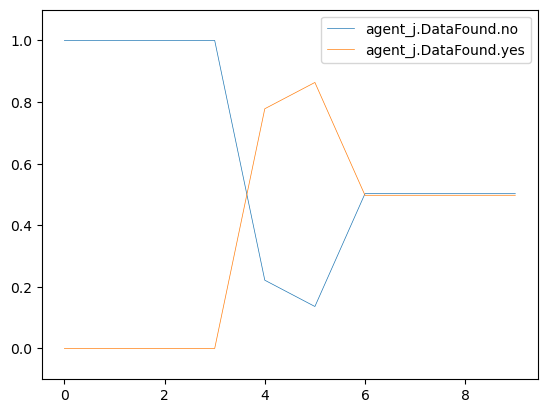

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0      FileRecon            Nop
1                1.0                 0.0   EnumAccounts   DecoyAccount
2                0.0                 1.0     PrivEscAcc            Nop
3                0.0                 1.0      FileRecon            Nop
4                0.0                 1.0      FileRecon            Nop
5                0.0                 1.0           Exit            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

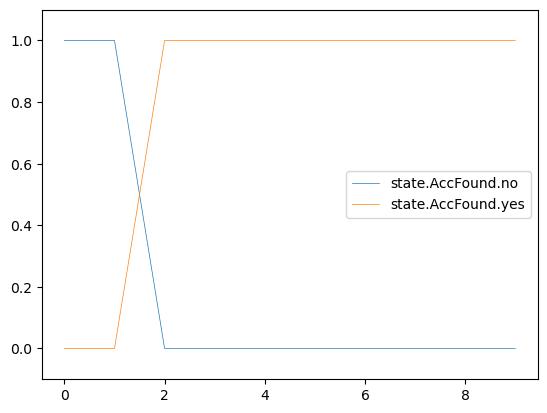

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts   DecoyAccount   
2             0.100722              0.899278     PrivEscAcc            Nop   
3             0.000133              0.999867      FileRecon            Nop   
4             0.000173              0.999826      FileRecon            Nop   
5             0.000193              0.999807           Exit            Nop   
6             0.000193              0.999807            Nop            Nop   
7             0.000193              0.999807            Nop            Nop   
8             0.000193              0.999807            Nop            Nop   
9             0.000193              0.999807            Nop            Nop   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           failure   

  agent_i.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

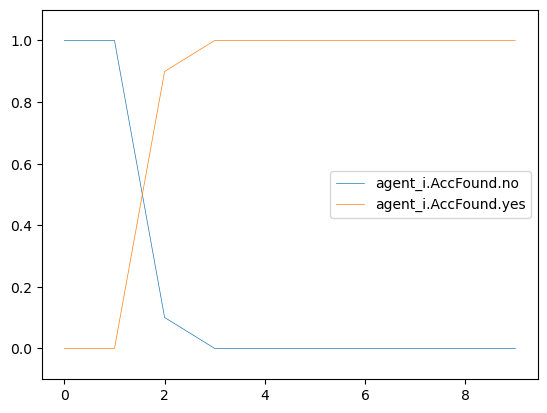

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000   DecoyAccount   EnumAccounts   
2             0.201010              0.798991            Nop     PrivEscAcc   
3             0.029432              0.970568            Nop      FileRecon   
4             0.027055              0.972945            Nop      FileRecon   
5             0.001163              0.998837            Nop           Exit   
6             0.004745              0.995255            Nop            Nop   
7             0.004745              0.995256            Nop            Nop   
8             0.004745              0.995256            Nop            Nop   
9             0.004745              0.995256            Nop            Nop   

  agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0                        file_enum                          no  
1                        file_enum                         yes  
2                         su_login                         yes  
3                        file_enum                         yes  
4                        file_enum                         yes  
5                             none                         yes  
6                       file_write                         yes  
7                             none                         yes  
8                       file_write                         yes  
9                             none                         yes

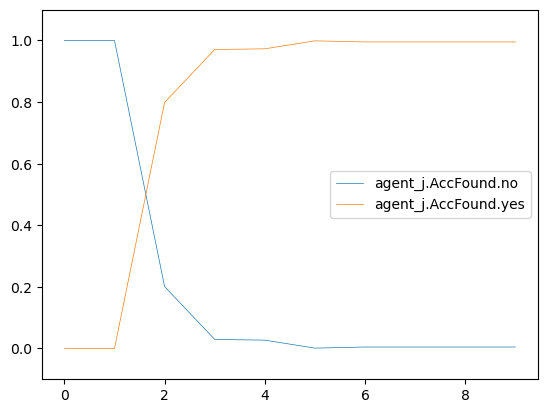

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0      FileRecon   
1                     0.0                     1.0   EnumAccounts   
2                     0.0                     1.0     PrivEscAcc   
3                     1.0                     0.0      FileRecon   
4                     1.0                     0.0      FileRecon   
5                     1.0                     0.0           Exit   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action  
0            Nop  
1   DecoyAccount  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

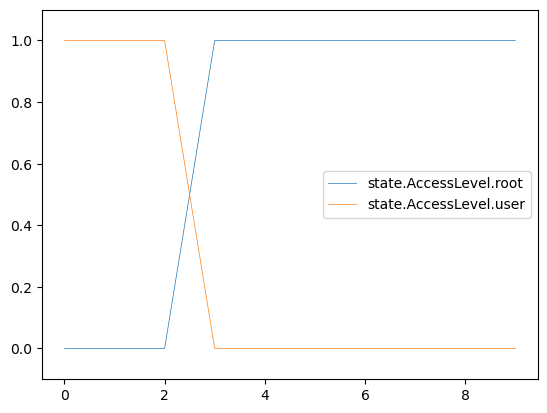

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000      FileRecon   
1                  0.000000                  1.000000   EnumAccounts   
2                  0.000000                  1.000000     PrivEscAcc   
3                  0.999860                  0.000140      FileRecon   
4                  0.999826                  0.000174      FileRecon   
5                  0.999807                  0.000193           Exit   
6                  0.999807                  0.000193            Nop   
7                  0.999807                  0.000193            Nop   
8                  0.999807                  0.000193            Nop   
9                  0.999807                  0.000193            Nop   

  agent_j.action agent_i.observation.HostObs'  \
0            Nop                         none   
1   DecoyAccount                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           failure                       active  
5                           success                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           failure                     inactive

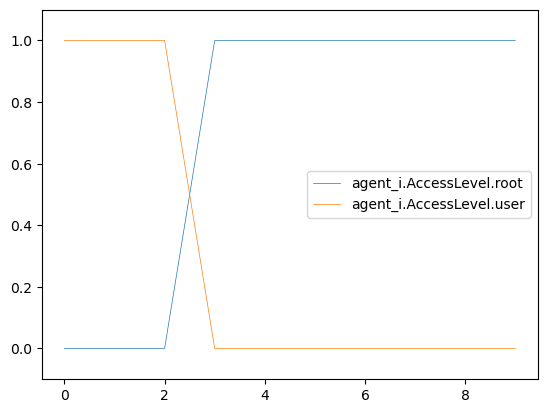

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000   DecoyAccount   
2                  0.000000                  1.000000            Nop   
3                  0.969444                  0.030556            Nop   
4                  0.972933                  0.027067            Nop   
5                  0.998836                  0.001164            Nop   
6                  0.995253                  0.004747            Nop   
7                  0.995253                  0.004747            Nop   
8                  0.995253                  0.004747            Nop   
9                  0.995253                  0.004747            Nop   

  agent_i.action agent_j.observation.EndPtAlerts' agent_j.observation.AccObs'  
0      FileRecon                        file_enum                          no  
1   EnumAccounts                        file_enum                         yes  
2     PrivEscAcc                         su_login                         yes  
3      FileRecon                        file_enum                         yes  
4      FileRecon                        file_enum                         yes  
5           Exit                             none                         yes  
6            Nop                       file_write                         yes  
7            Nop                             none                         yes  
8            Nop                       file_write                         yes  
9            Nop                             none                         yes

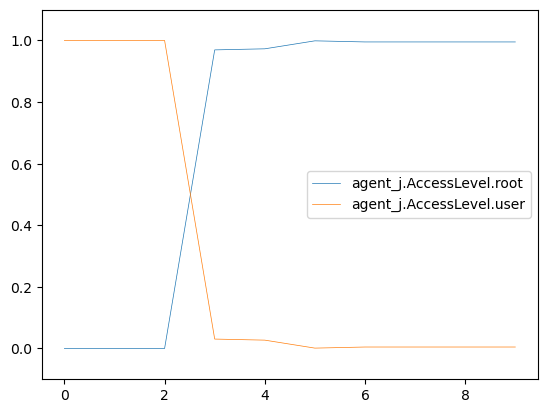

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    